In [4]:
import pandas as pd 
import numpy as np 

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import  textblob
import xgboost

from textblob import TextBlob
from nltk.stem import PorterStemmer

In [5]:
data = pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [6]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [7]:
# Checking for null values 

In [8]:
data.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [9]:
data[data["Review Text"].isna()]

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
92,861,General Petite,Tops,Knits,Gurgaon,Mobile,23,NaN,NaN,5,1
93,1081,General,Dresses,Dresses,Gurgaon,Mobile,31,NaN,NaN,5,1
98,1133,General,Jackets,Outerwear,Mumbai,Mobile,50,NaN,NaN,5,1
135,861,General Petite,Tops,Knits,Gurgaon,Web,35,NaN,NaN,4,1
142,1126,General,Jackets,Outerwear,Gurgaon,Web,35,NaN,NaN,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23258,862,General,Tops,Knits,Mumbai,Web,35,NaN,NaN,4,1
23301,862,General,Tops,Knits,Mumbai,Web,52,NaN,NaN,5,1
23303,823,General,Tops,Blouses,Mumbai,Mobile,46,NaN,NaN,5,1
23470,1104,General Petite,Dresses,Dresses,Gurgaon,Web,39,NaN,NaN,5,1


In [10]:
data.dropna(axis = 0, inplace = True )

In [11]:
data.drop(columns = "Product ID", axis = 1, inplace = True)

In [12]:
data.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [13]:
data.columns = data.columns.str.replace(' ','_')

In [14]:
data.columns # Final list of columns 

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

In [15]:
data

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
2,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
...,...,...,...,...,...,...,...,...,...,...
23481,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [18]:
df = data.drop('count_sent',axis = 1)

## Exploratory data analysis

In [19]:
import re

In [17]:
data['Review_Text'] = data['Review_Text'].astype(str)
data['count_sent']=data["Review_Text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [20]:
data.Rating.value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [22]:
df.Recommend_Flag.value_counts()

1    16087
0     3575
Name: Recommend_Flag, dtype: int64

# Text Preprocessing 

In [23]:
# Lower Character all the Texts
data['Review_Text'] = data['Review_Text'].str.lower()
data['Review_Text'].head()

2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
5    i love tracy reese dresses, but this one is no...
6    i aded this in my basket at hte last mintue to...
Name: Review_Text, dtype: object

In [24]:
# Removing Punctuations and Numbers from the Text
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


data['Review_Text'] = data['Review_Text'].apply(remove_punctuations_numbers)

In [25]:
#!pip install wordcloud

In [26]:
#!pip install textblob

#### Checking sentiment analysis/Polarity  on Review title column 

In [27]:
df['sentiment_title'] = df["Review_Title"].apply(lambda x: TextBlob(x).sentiment.polarity )

<AxesSubplot:ylabel='Frequency'>

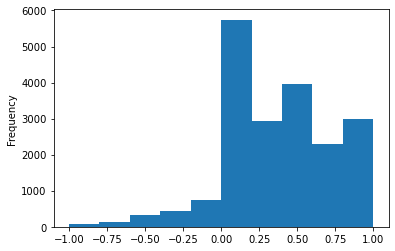

In [28]:
df.sentiment_title.plot.hist() # checking the hist plot for finding negative and positive values for cut off 

In [29]:
df['sentiment_title_cat'] = np.where(df.sentiment_title>0.1,'Positive', 'Negative')

<AxesSubplot:>

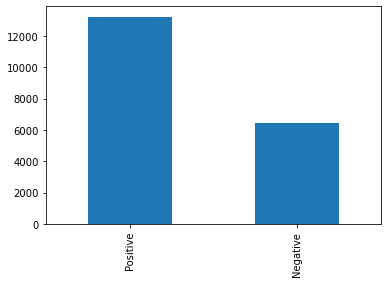

In [30]:
df.sentiment_title_cat.value_counts().plot.bar()

In [31]:
pd.crosstab(df.sentiment_title_cat, df.Rating)

Rating,1,2,3,4,5
sentiment_title_cat,,,,,
Negative,549,915,1327,1243,2410
Positive,142,445,1137,3046,8448


In [32]:
df_positive = df[(df.sentiment_title_cat=='Positive')]

In [33]:
df_positive.Review_Title

3                                         My favorite buy!
5                                  Not for the very petite
6                                     Cagrcoal shimmer fun
7                     Shimmer, surprisingly goes with lots
9                                        Such a fun dress!
                               ...                        
23479                                    What a fun piece!
23481                       Great dress for many occasions
23483                                Cute, but see through
23484    Very cute dress, perfect for summer parties an...
23485                      Please make more like this one!
Name: Review_Title, Length: 13218, dtype: object

In [38]:
Positive_review = df_positive.Review_Title.apply(lambda x: clean_text(x))
Positive_review = pre_process(Positive_review) # UDFS are declared after splitting data into train and test 

In [39]:
df_negative = df[(df.sentiment_title_cat=='Negative')]

In [40]:
Negative_review = df_negative.Review_Title.apply(lambda x: clean_text(x))
Negative_review = pre_process(Positive_review)

In [41]:
from wordcloud import WordCloud ,STOPWORDS

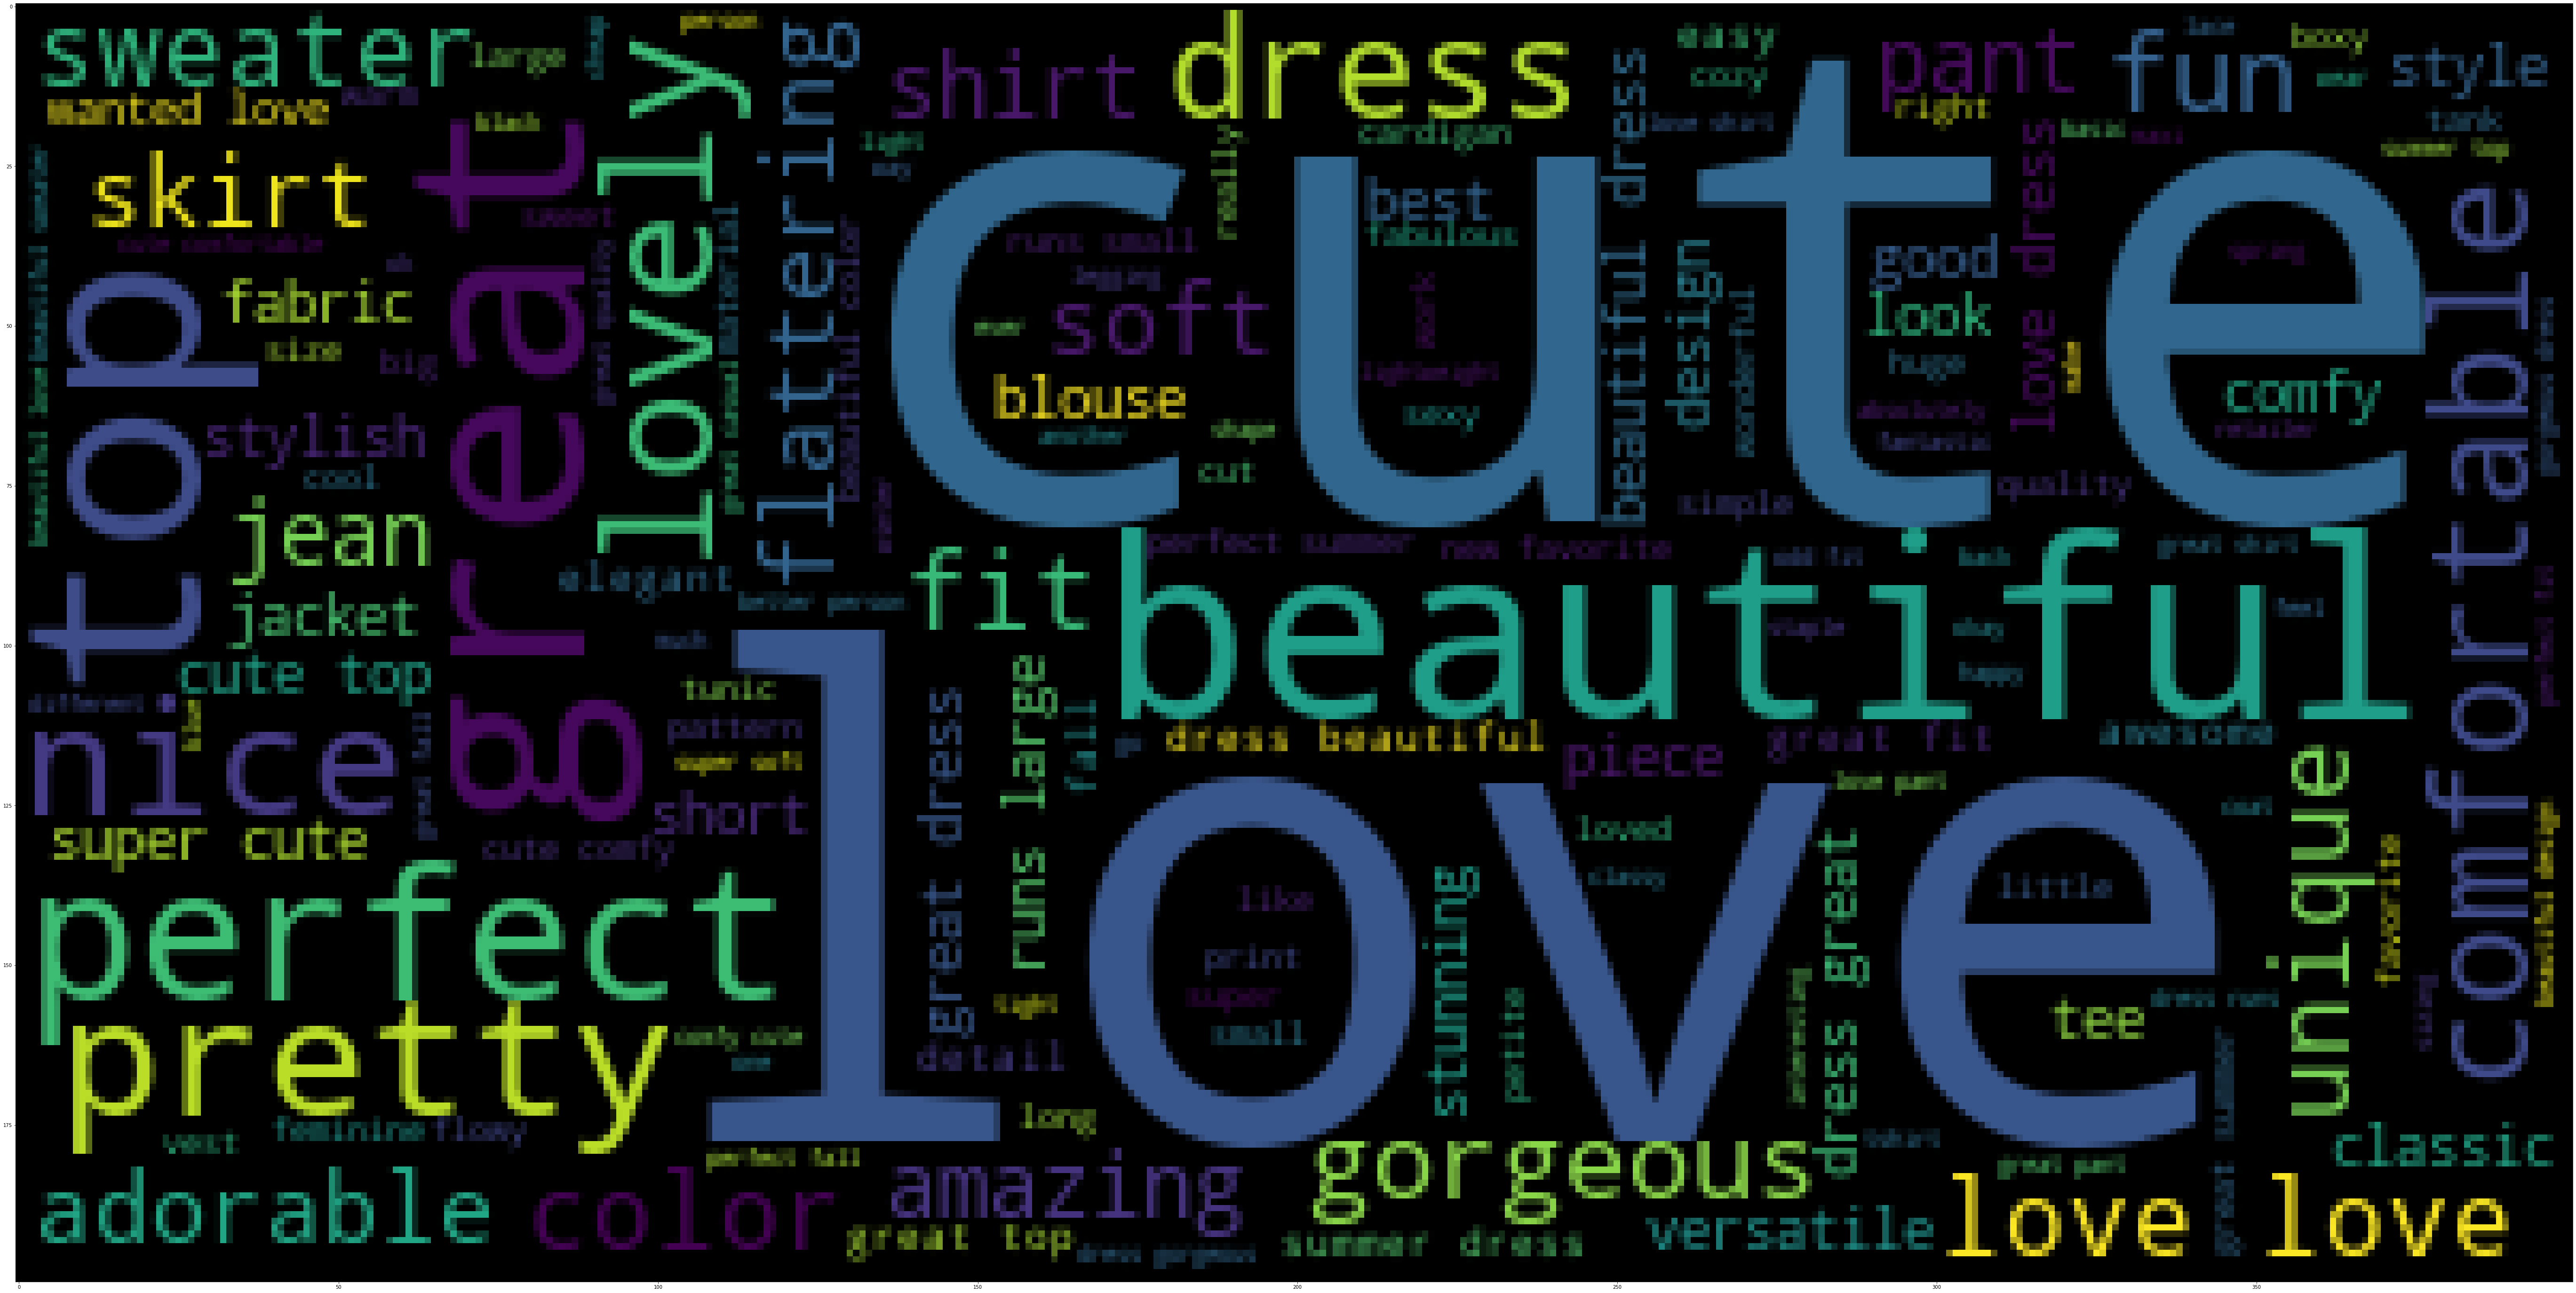

In [42]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

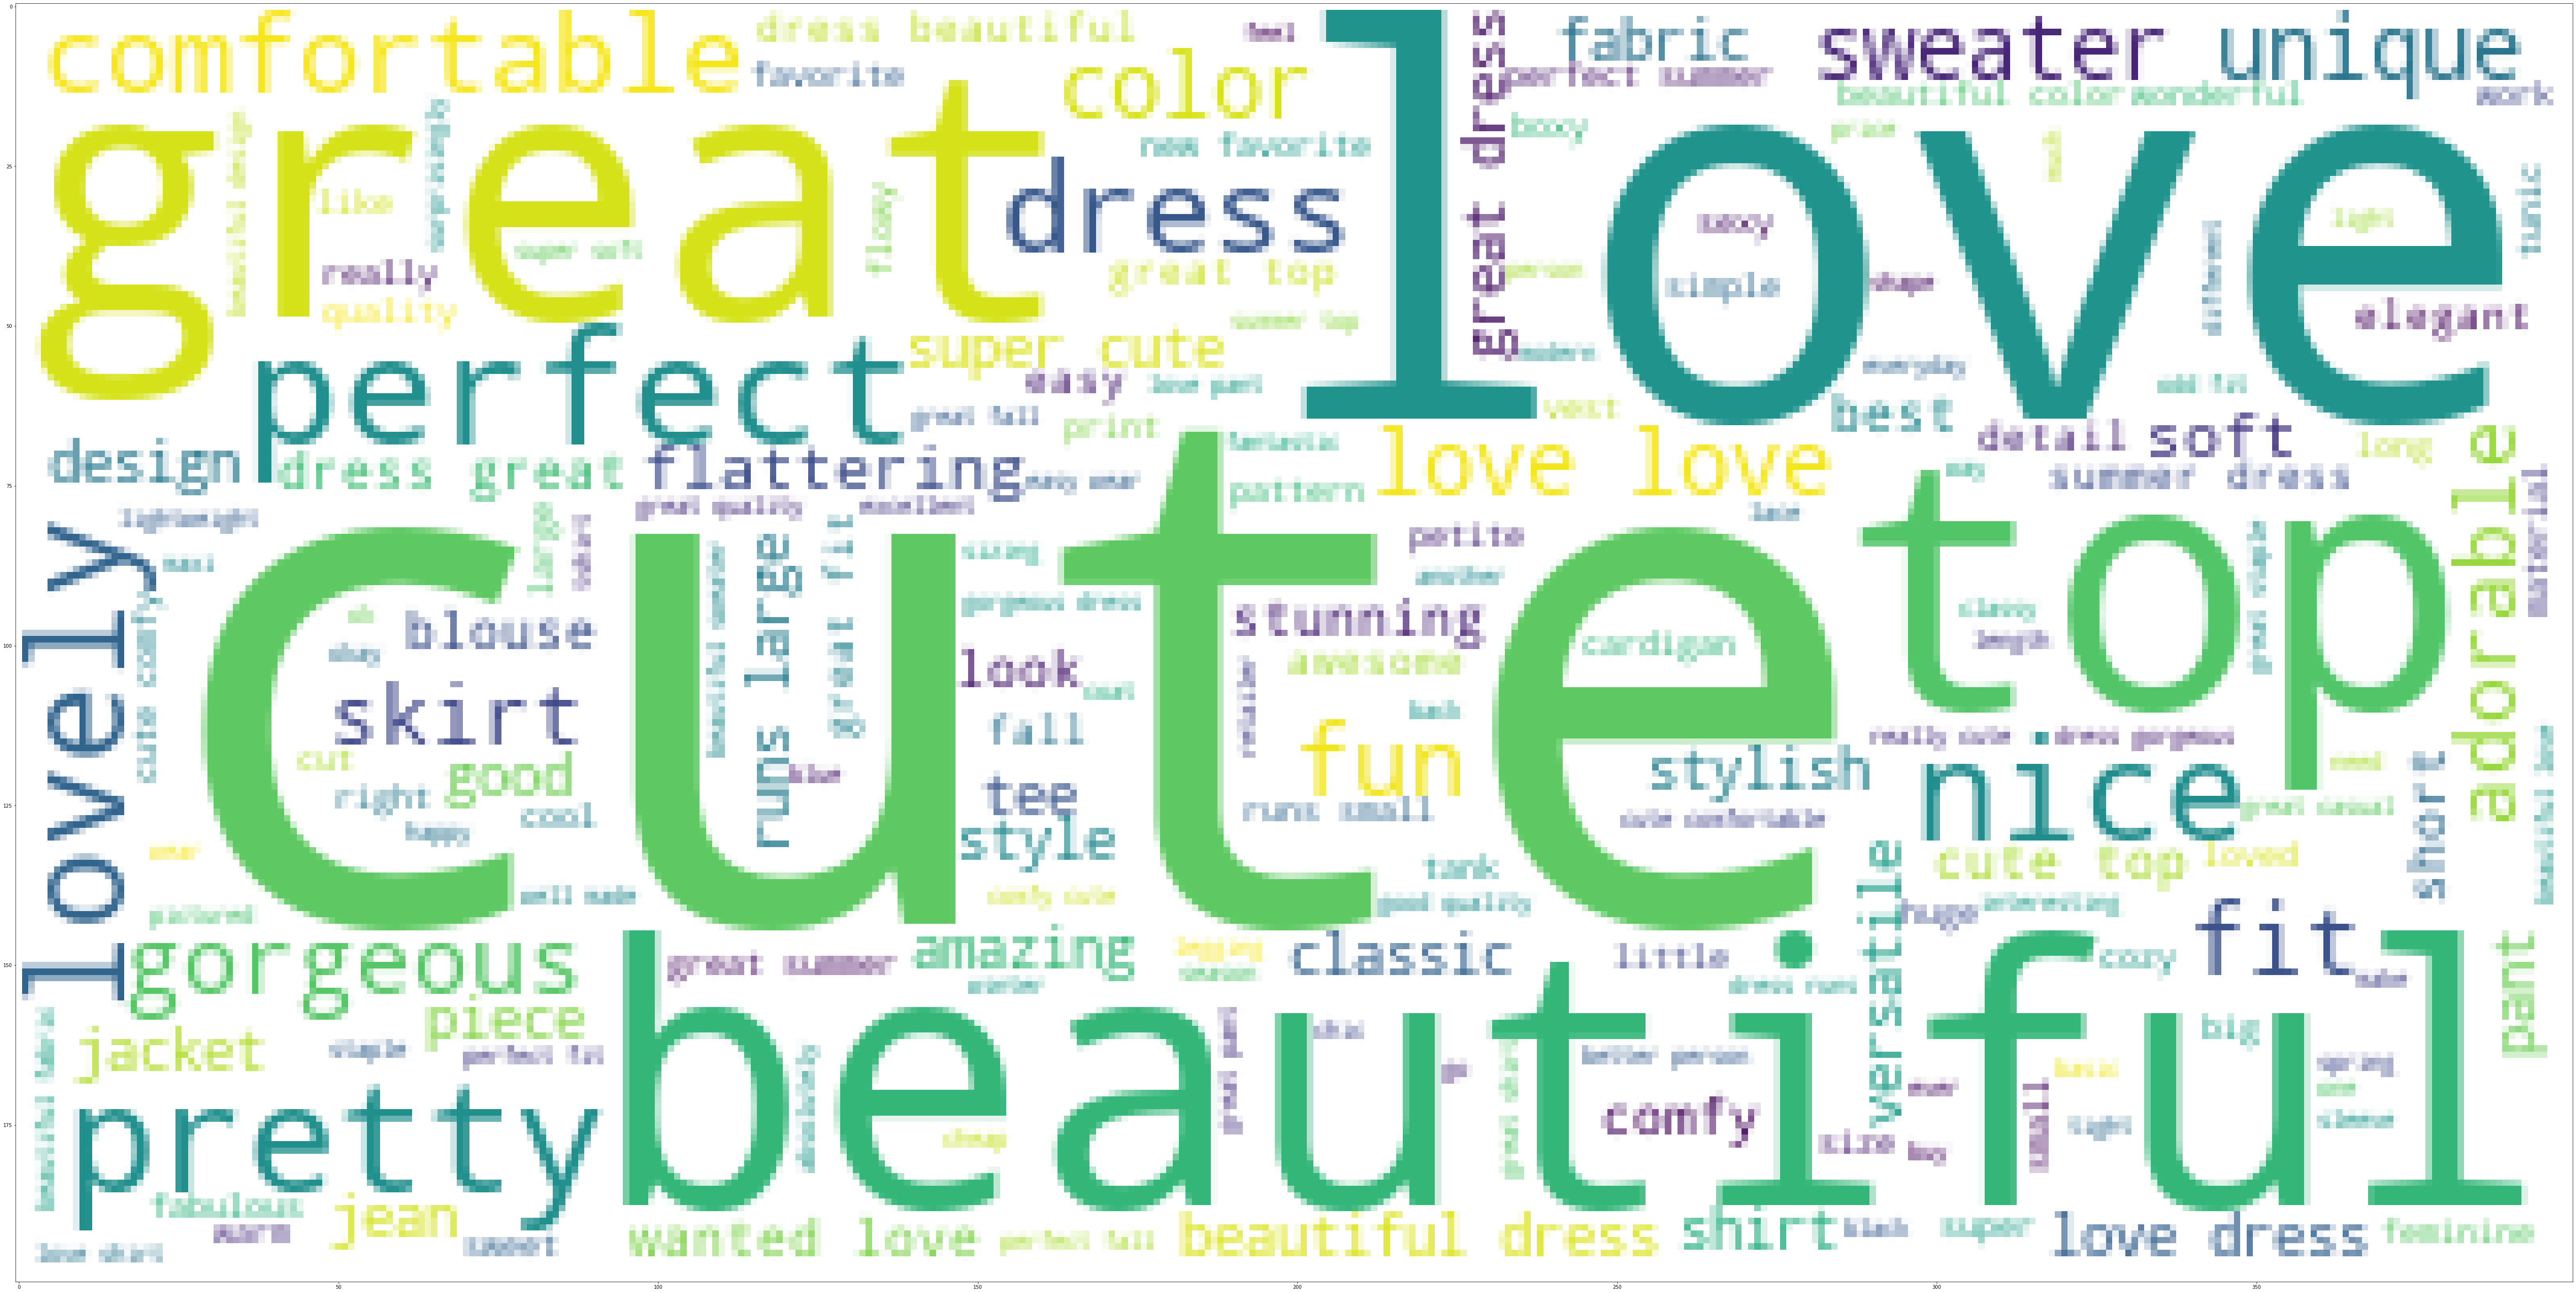

In [43]:
wordcloud = WordCloud(stopwords=stop, background_color='white').generate(' '.join(Negative_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

Vectorization of all the positvie words to understand their impact 

In [44]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm_df=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

In [49]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm_df=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

<AxesSubplot:>

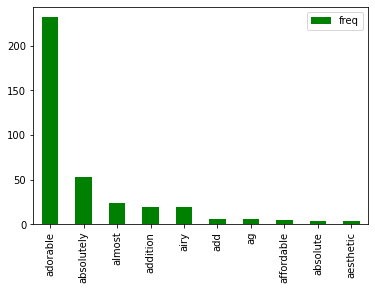

In [46]:
word_freq = pd.DataFrame(Positive_review_dtm_df.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green')

#fig = plt.figure(figsize=(200,50))

<AxesSubplot:>

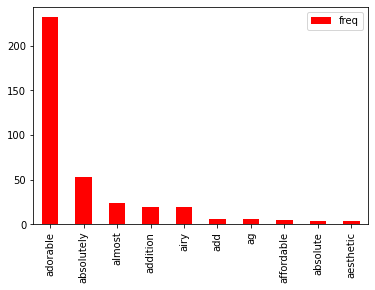

In [47]:
word_freq = pd.DataFrame(Negative_review_dtm_df.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red')

In [51]:
word_freq_dictionary = dict(Negative_review_dtm_df.apply(sum))

In [52]:
word_freq_dictionary

{'absolute': 4,
 'absolutely': 53,
 'add': 6,
 'addition': 19,
 'adorable': 232,
 'aesthetic': 3,
 'affordable': 5,
 'ag': 6,
 'airy': 19,
 'almost': 24,
 'alternative': 6,
 'always': 3,
 'amazing': 170,
 'amazingly': 5,
 'ankle': 4,
 'another': 32,
 'anyone': 3,
 'anywhere': 4,
 'apart': 4,
 'appropriate': 3,
 'arm': 5,
 'armholes': 8,
 'arms': 4,
 'around': 14,
 'art': 6,
 'attractive': 11,
 'autumn': 6,
 'average': 3,
 'away': 4,
 'awesome': 91,
 'awkward': 4,
 'back': 41,
 'bad': 3,
 'baggy': 11,
 'basic': 85,
 'bathing': 9,
 'beach': 13,
 'beading': 4,
 'beautiful': 1395,
 'beautifully': 27,
 'beauty': 8,
 'believe': 4,
 'belt': 7,
 'best': 131,
 'better': 126,
 'beware': 7,
 'beyond': 6,
 'big': 96,
 'bigger': 4,
 'bikini': 3,
 'billowy': 4,
 'bit': 39,
 'black': 33,
 'blazer': 15,
 'blouse': 152,
 'blousy': 6,
 'blue': 31,
 'bodies': 3,
 'body': 26,
 'bohemian': 5,
 'boho': 15,
 'bold': 5,
 'bomber': 6,
 'bottom': 15,
 'bottoms': 4,
 'bought': 16,
 'boxy': 51,
 'boyfriend': 4,
 

In [53]:
pd.crosstab(df.Recommend_Flag,df.sentiment_title_cat)

sentiment_title_cat,Negative,Positive
Recommend_Flag,,
0,2338,1237
1,4106,11981


#### Checking sentiment analysis/Polarity  on Review Text column 

In [54]:
data['sentiment'] = data["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

<AxesSubplot:ylabel='Frequency'>

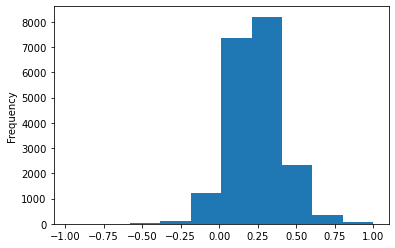

In [55]:
data.sentiment.plot.hist()

In [56]:
data['sentiment_cat'] = np.where(data.sentiment>0.1,'Positive', 'Negative')

<AxesSubplot:>

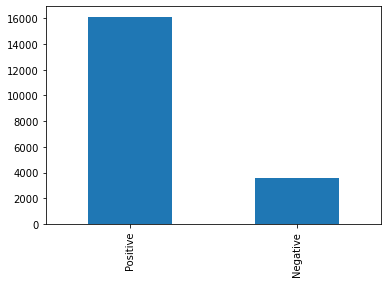

In [57]:
data.sentiment_cat.value_counts().plot.bar()

In [58]:
pd.crosstab(data.sentiment_cat, data.Rating)

Rating,1,2,3,4,5
sentiment_cat,,,,,
Negative,370,613,781,782,993
Positive,321,747,1683,3507,9865


In [59]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/abin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
stop = set(nltk.corpus.stopwords.words('english'))

In [61]:
data['Review_Text'] = data['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [62]:
data_positive = data[(data.sentiment_cat=='Positive')]

In [63]:
Positive_review_data = data_positive.Review_Title.apply(lambda x: clean_text(x))
Positive_review_data = pre_process(Positive_review_data)

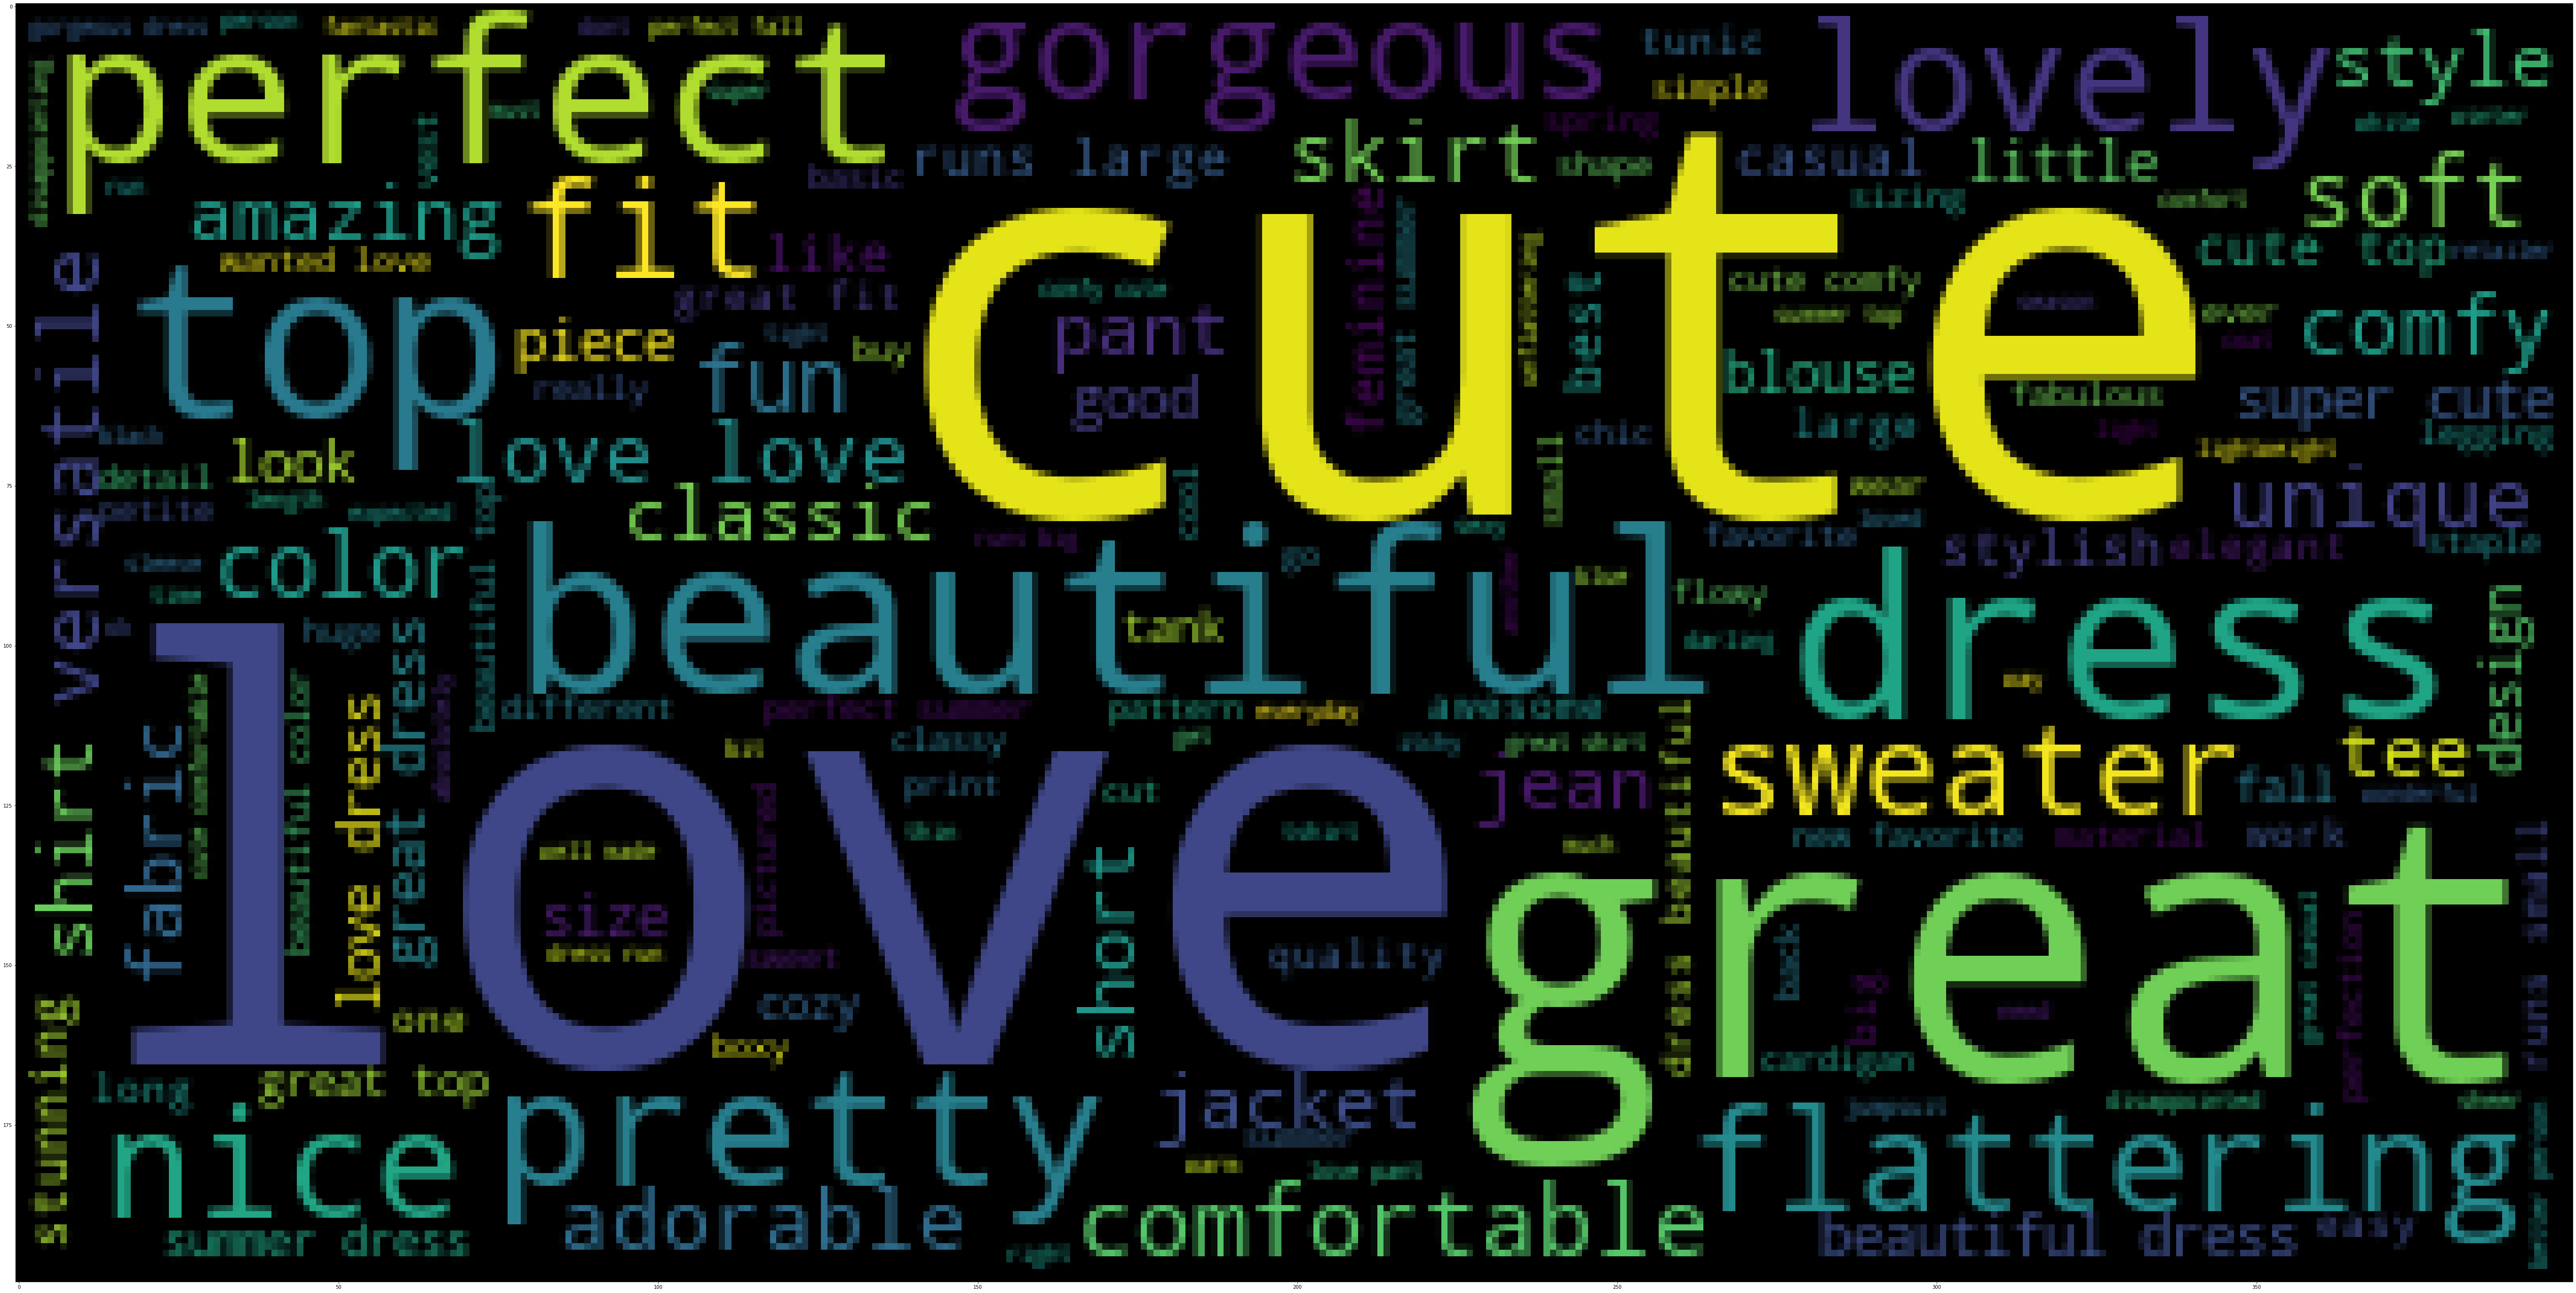

In [64]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review_data.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [65]:
data_negative = data[(data.sentiment_cat=='Negative')]

In [66]:
Negative_review_data = data_negative.Review_Title.apply(lambda x: clean_text(x))
Negative_review_data = pre_process(Negative_review_data)

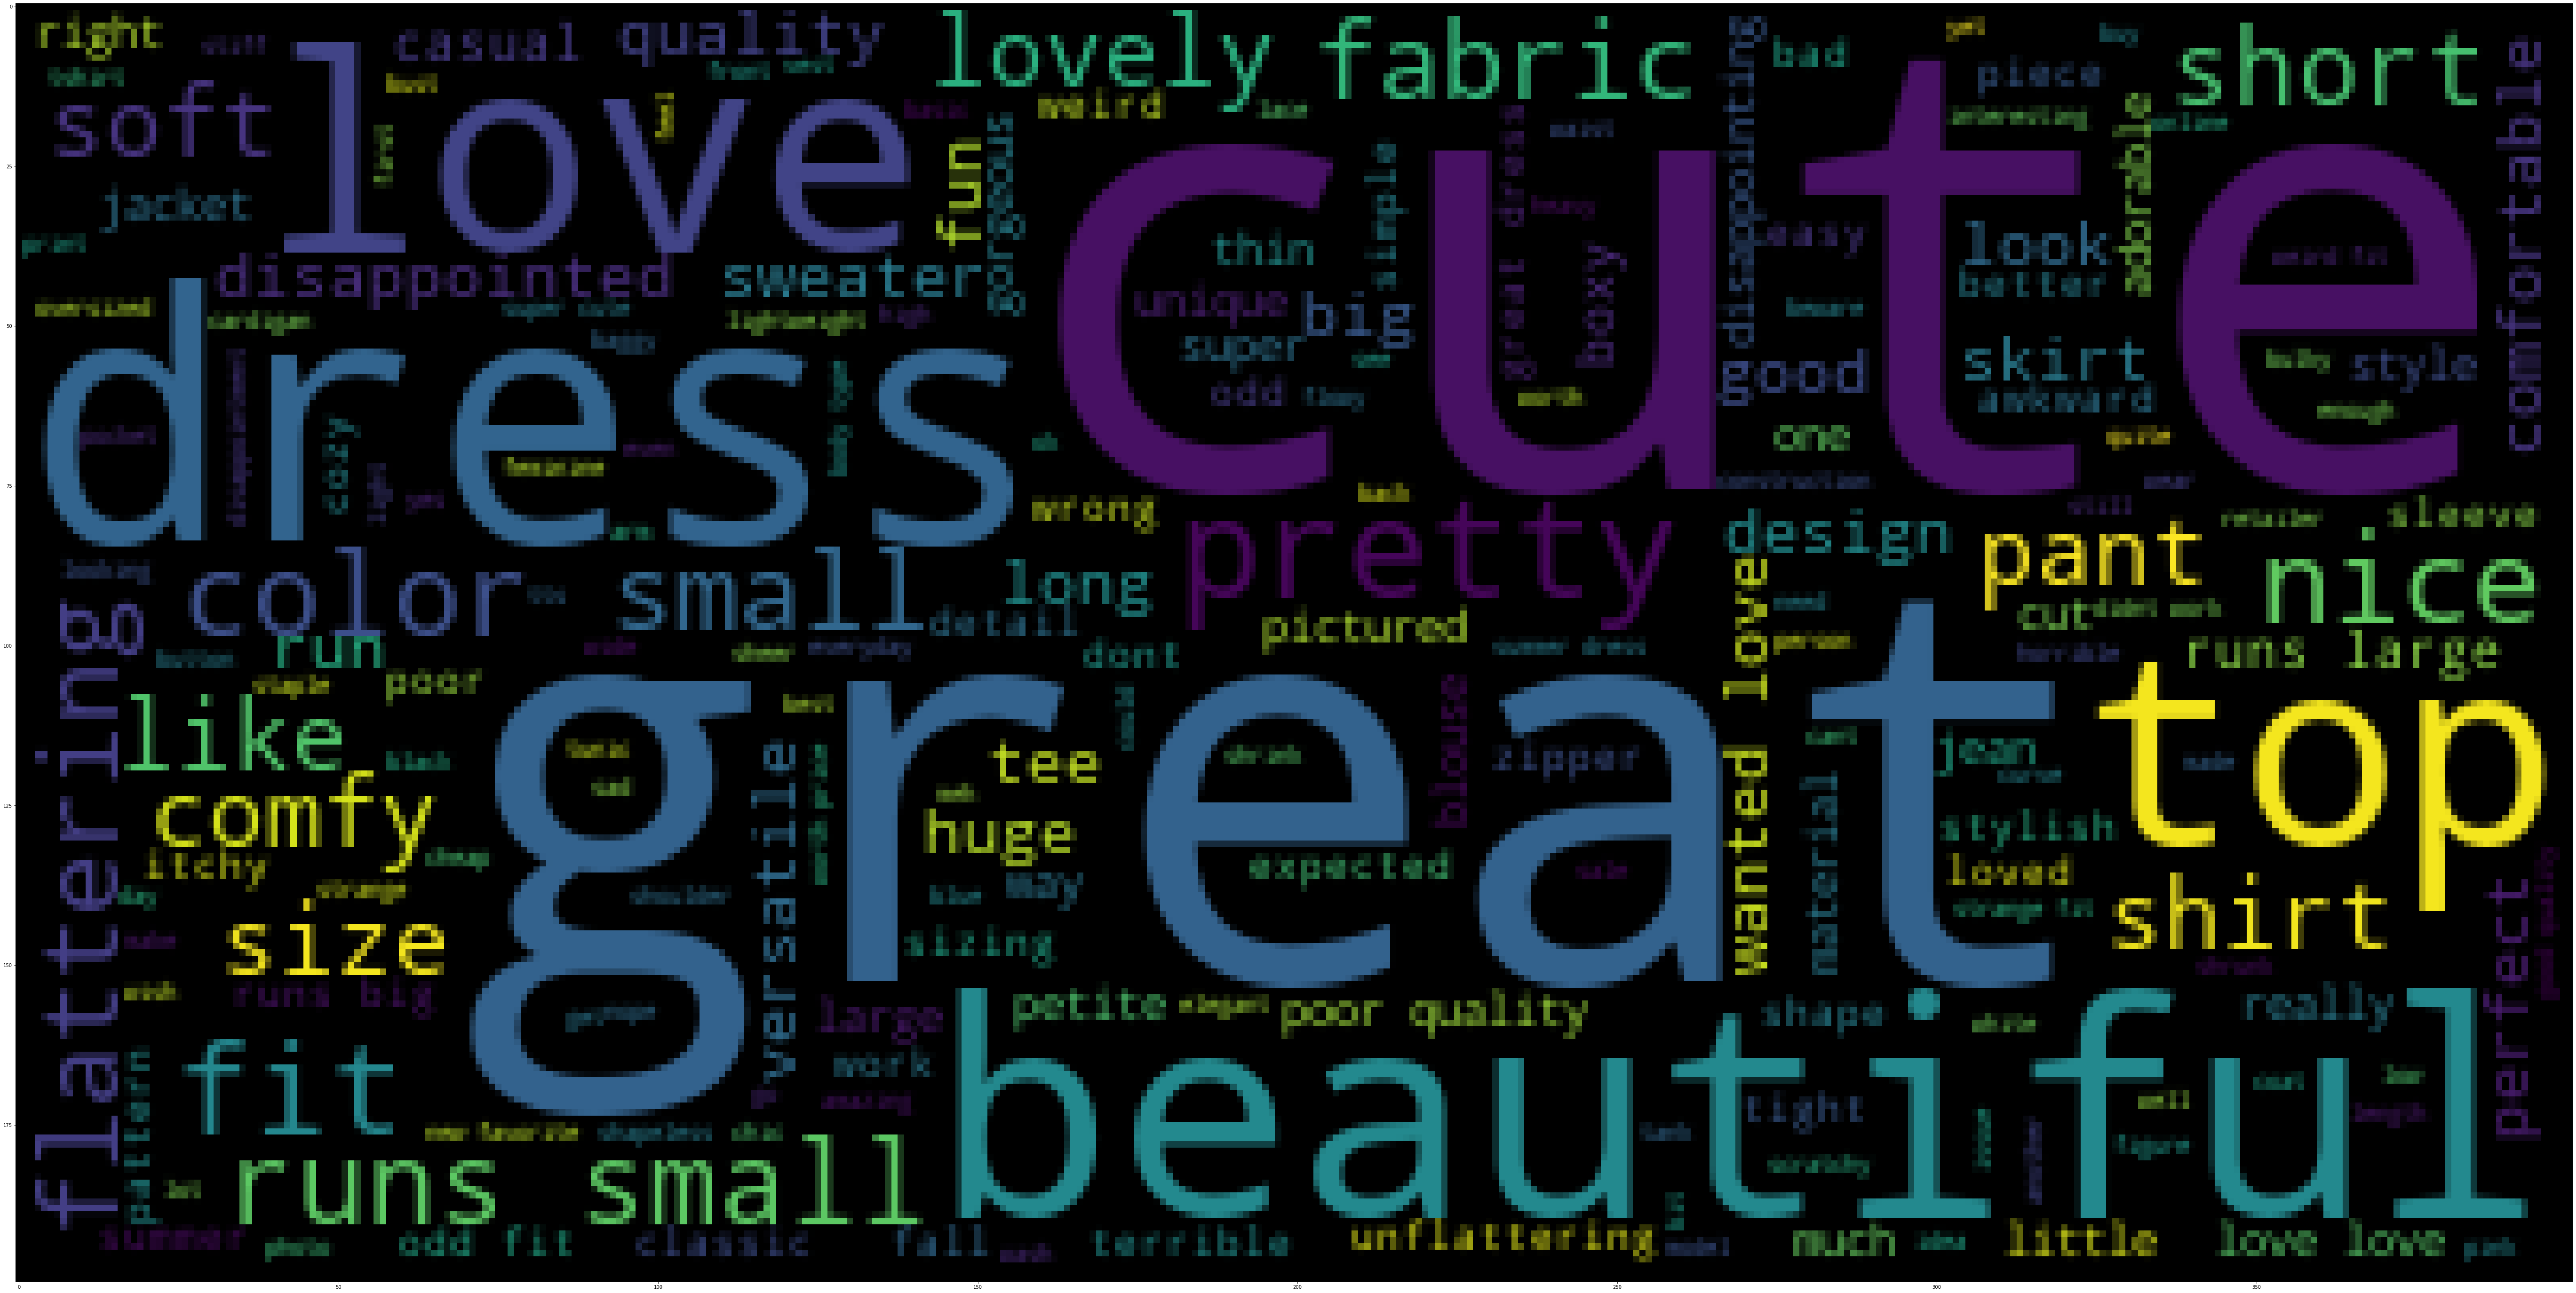

In [67]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Negative_review_data.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

Since we are finding almost similar words in the word cloud, we will do vectorization and try to analysize the words better 

In [68]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(Positive_review_data)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

In [69]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review_data)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

<AxesSubplot:>

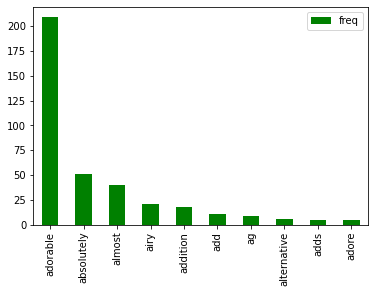

In [70]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green')

#fig = plt.figure(figsize=(200,50))

<AxesSubplot:>

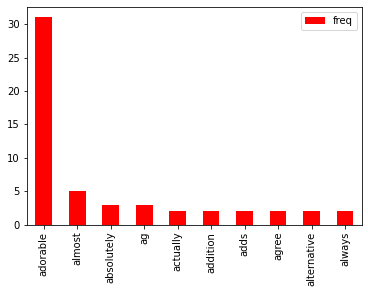

In [71]:
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red')

almost all the obeservations in Title and text have given almost similar response, this calls us for further analysis to understand observations that are more similar to each other, it is also noted that title and text does not seem to have much variation while changing the cut off from positive to negative. 

### Split the data into train & Test

In [72]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
#yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = data.Review_Text
y = data.Rating

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14746,)
(4916,)
(14746,)
(4916,)


In [73]:
stop = set(nltk.corpus.stopwords.words('english'))

In [74]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [75]:
import string
def pre_process(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    return text

In [76]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [77]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)
    

In [78]:
from sklearn.svm import LinearSVC


In [79]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [80]:
dtm_tfidf_train1=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test1=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [81]:
dtm_tfidf_train1

,able,absolutely,across,actually,add,added,addition,adds,adorable,adore,...,xsp,xxs,year,years,yellow,yes,yesterday,yet,zip,zipper
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.230454,0.184638,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,0.0,0.0,0.0,0.0,0.190926,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14742,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14743,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14744,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [82]:
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train1, y_train)

In [83]:
import sklearn
print(sklearn.metrics.classification_report(y_train, lsvc_model.predict(dtm_tfidf_train1)))

print(sklearn.metrics.classification_report(y_test, lsvc_model.predict(dtm_tfidf_test1)))

              precision    recall  f1-score   support

           1       0.74      0.50      0.60       539
           2       0.64      0.35      0.45       979
           3       0.58      0.51      0.54      1850
           4       0.58      0.40      0.47      3235
           5       0.77      0.94      0.84      8143

    accuracy                           0.71     14746
   macro avg       0.66      0.54      0.58     14746
weighted avg       0.69      0.71      0.69     14746

              precision    recall  f1-score   support

           1       0.29      0.19      0.23       152
           2       0.34      0.16      0.22       381
           3       0.36      0.33      0.34       614
           4       0.37      0.27      0.32      1054
           5       0.74      0.90      0.81      2715

    accuracy                           0.61      4916
   macro avg       0.42      0.37      0.38      4916
weighted avg       0.57      0.61      0.58      4916



Since the predicted score on train and test is little off, There can be an issue of overfitting in the model 

In [84]:
lsvc_model.predict(dtm_tfidf_test1)

array([5, 5, 3, ..., 5, 5, 5])

In [85]:
rev=data.Review_Text[3]

In [86]:
rev

'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments'

In [87]:
clean_rev = ' '.join([i for i in clean_text(rev).split() if i not in stop ])

In [88]:
lsvc_model.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0]

5

In [89]:
rev

'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments'

The model is able to predict correctly 

### Predicting with recommendation flag 

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:

# define X and y
X = data.Review_Text
y = data.Recommend_Flag

# split the new DataFrame into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14746,)
(4916,)
(14746,)
(4916,)


In [92]:
train_X = train_X.apply(lambda x: clean_text(x))
train_X = pre_process(train_X)

test_X = test_X.apply(lambda x: clean_text(x))
test_X=pre_process(test_X)

In [93]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [94]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [95]:
logit_model = LogisticRegression().fit(dtm_tfidf_train, train_y)

In [96]:
import sklearn

In [97]:
print(sklearn.metrics.classification_report(train_y, logit_model.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           0       0.83      0.58      0.68      2667
           1       0.91      0.97      0.94     12079

    accuracy                           0.90     14746
   macro avg       0.87      0.78      0.81     14746
weighted avg       0.90      0.90      0.90     14746



In [98]:
print(sklearn.metrics.classification_report(test_y, logit_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.76      0.52      0.62       908
           1       0.90      0.96      0.93      4008

    accuracy                           0.88      4916
   macro avg       0.83      0.74      0.78      4916
weighted avg       0.87      0.88      0.87      4916



# CLASS 18 on wards

In [99]:
X_train

20666    perhaps gotten used flowy shirts cut right fel...
20719    sized medium small glad top drapes nicely fabr...
11510    bought sweater green loved much ended ordering...
22208    notice reviews said think flattering makes wai...
12234    agree reviewers dress runs large tried xs loca...
                               ...                        
13097    dress intrigued bit online enough order try ev...
20651    work know fair complexion untanned legs dress ...
6203     looking great long loose versatile vest time p...
14529    bought denim ch rocket high rise crop last spr...
303      wore dress first time yesterday never received...
Name: Review_Text, Length: 14746, dtype: object

In [100]:
print(X_train.shape)
print(X_test.shape )
print(y_train.shape)
print(y_test.shape)

(14746,)
(4916,)
(14746,)
(4916,)


In [101]:
X_train.reset_index()

,index,Review_Text
0,20666,perhaps gotten used flowy shirts cut right fel...
1,20719,sized medium small glad top drapes nicely fabr...
2,11510,bought sweater green loved much ended ordering...
3,22208,notice reviews said think flattering makes wai...
4,12234,agree reviewers dress runs large tried xs loca...
...,...,...
14741,13097,dress intrigued bit online enough order try ev...
14742,20651,work know fair complexion untanned legs dress ...
14743,6203,looking great long loose versatile vest time p...
14744,14529,bought denim ch rocket high rise crop last spr...


In [102]:
pd.concat([X_train.reset_index(), dtm_tfidf_train1],axis=1)

,index,Review_Text,able,absolutely,across,actually,add,added,addition,adds,...,xsp,xxs,year,years,yellow,yes,yesterday,yet,zip,zipper
0,20666,perhaps gotten used flowy shirts cut right fel...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,20719,sized medium small glad top drapes nicely fabr...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,11510,bought sweater green loved much ended ordering...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,22208,notice reviews said think flattering makes wai...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,12234,agree reviewers dress runs large tried xs loca...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.230454,0.184638,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,13097,dress intrigued bit online enough order try ev...,0.0,0.0,0.0,0.0,0.190926,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14742,20651,work know fair complexion untanned legs dress ...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14743,6203,looking great long loose versatile vest time p...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14744,14529,bought denim ch rocket high rise crop last spr...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [103]:
from sklearn.metrics.pairwise import cosine_similarity
dist = cosine_similarity(dtm_tfidf_train1)

In [104]:
len(['d_'+str(i) for i in train_X.index])

14746

In [105]:
dist = pd.DataFrame(dist, index =  train_X.index, columns = ['d_'+str(i) for i in train_X.index])

In [106]:
dist

,d_20666,d_20719,d_11510,d_22208,d_12234,d_4476,d_12506,d_1048,d_15854,d_989,...,d_9266,d_19507,d_184,d_23036,d_9352,d_13097,d_20651,d_6203,d_14529,d_303
20666,1.000000,0.040309,0.017078,0.037435,0.139508,0.000000,0.000000,0.000000,0.000000,0.010268,...,0.000000,0.029122,0.012992,0.094956,0.026749,0.031601,0.063280,0.014304,0.020112,0.000000
20719,0.040309,1.000000,0.000000,0.065091,0.000000,0.027000,0.034477,0.077118,0.066800,0.000000,...,0.000000,0.000000,0.000000,0.031906,0.000000,0.016830,0.048301,0.000000,0.039852,0.000000
11510,0.017078,0.000000,1.000000,0.037249,0.063320,0.000000,0.072496,0.054574,0.009602,0.096192,...,0.148292,0.133367,0.092353,0.027179,0.066935,0.089627,0.031264,0.085628,0.059863,0.055548
22208,0.037435,0.065091,0.037249,1.000000,0.127484,0.054715,0.028744,0.052471,0.009226,0.038029,...,0.046078,0.055318,0.044391,0.082471,0.035268,0.090601,0.095017,0.000000,0.110065,0.000000
12234,0.139508,0.000000,0.063320,0.127484,1.000000,0.025863,0.091748,0.052741,0.050152,0.047809,...,0.072841,0.054331,0.028441,0.097141,0.075136,0.026498,0.043918,0.051492,0.070029,0.030259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13097,0.031601,0.016830,0.089627,0.090601,0.026498,0.128128,0.099888,0.135779,0.010719,0.081856,...,0.045842,0.028974,0.103675,0.070724,0.044050,1.000000,0.126669,0.012043,0.050196,0.095601
20651,0.063280,0.048301,0.031264,0.095017,0.043918,0.052134,0.033660,0.033951,0.047646,0.000000,...,0.078337,0.116955,0.100485,0.112006,0.016290,0.126669,1.000000,0.014124,0.000000,0.074578
6203,0.014304,0.000000,0.085628,0.000000,0.051492,0.078595,0.157408,0.042228,0.072118,0.042788,...,0.000000,0.023669,0.125611,0.000000,0.143423,0.012043,0.014124,1.000000,0.064571,0.045633
14529,0.020112,0.039852,0.059863,0.110065,0.070029,0.051724,0.014865,0.045863,0.183478,0.081644,...,0.043801,0.091420,0.030531,0.104817,0.101972,0.050196,0.000000,0.064571,1.000000,0.000000


In [107]:
train_X[20666]

'perhaps gotten used flowy shirts cut right felt fitted around rear end shoulders lay right sizing would made big shoulders returned lbs c curvy muscular frame ordered size small'

In [108]:
top_recs = dist.sort_values(by='d_20666', ascending=False)['d_20666'][1:6] 

In [109]:
top_recs #Top 5 documents for given document-20666

11087    0.308650
10605    0.291240
11577    0.290840
18875    0.281829
1666     0.267186
Name: d_20666, dtype: float64

In [110]:
train_X[top_recs.index]

11087    love shape top bought white friend bought neut...
10605    reference athletic muscular body type broad sh...
11577    cute quirky feminine top ruffle detailing polk...
18875    love luxury feel soft perfect day fit right lo...
1666     tried lovely high waste wide leg black flowy p...
Name: Review_Text, dtype: object

### Segmentation 

In [111]:

dtm_tfidf_train1

,able,absolutely,across,actually,add,added,addition,adds,adorable,adore,...,xsp,xxs,year,years,yellow,yes,yesterday,yet,zip,zipper
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.230454,0.184638,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,0.0,0.0,0.0,0.0,0.190926,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14742,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14743,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14744,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [112]:
from sklearn.cluster import KMeans

In [113]:
model_k = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1,random_state=5)
res = model_k.fit(dtm_tfidf_train1)

In [114]:
res.inertia_

13550.816883491943

In [115]:
error = []

for i in range(3,20):
    model_k = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1,random_state=5)
    res = model_k.fit(dtm_tfidf_train1)
    error.append(res.inertia_)

In [116]:
error # altho complete stagnation is not acheived we can find a dip in error, from the 10th cluster on wards 

[13871.98166649726,
 13818.256525484301,
 13771.71157034787,
 13724.223627375142,
 13692.39604116421,
 13632.940646710374,
 13596.282039908523,
 13550.816883491943,
 13522.277547211956,
 13502.554152314664,
 13474.884368080475,
 13459.847013535174,
 13424.93425736906,
 13410.020989629087,
 13391.64050368578,
 13377.384754354352,
 13360.33976766886]

In [117]:
# using 10th cluster from above 
model_k = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1,random_state=5)
res = model_k.fit(dtm_tfidf_train1)

In [118]:
sse_err = []
cluster_centers = np.array(res.cluster_centers_)

In [119]:
sse_err = []
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
vocab = np.array(tfidf_vect.get_feature_names())

In [120]:
# 20 words that explain segment 1, 2, upto 10 segments 
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-20:]]))
    print('Impo Words related seg:', i)
    print(vocab[sorted_vals[i][-20:]])
words=list(words)
words

Impo Words related seg: 0
['long' 'stretch' 'well' 'cute' 'soft' 'top' 'like' 'looks' 'comfortable'
 'look' 'size' 'leggings' 'perfect' 'wear' 'pair' 'fit' 'love' 'great'
 'skinny' 'jeans']
Impo Words related seg: 1
['well' 'material' 'nice' 'colors' 'flattering' 'color' 'fit' 'looks'
 'look' 'size' 'back' 'really' 'would' 'fabric' 'cute' 'wear' 'great'
 'like' 'love' 'top']
Impo Words related seg: 2
['fabric' 'runs' 'top' 'color' 'perfect' 'petite' 'well' 'large' 'like'
 'would' 'one' 'great' 'wear' 'love' 'fits' 'dress' 'ordered' 'fit' 'true'
 'size']
Impo Words related seg: 3
['looks' 'really' 'would' 'top' 'bought' 'flattering' 'size' 'color'
 'back' 'fit' 'material' 'nice' 'little' 'soft' 'wear' 'like' 'cute'
 'great' 'love' 'shirt']
Impo Words related seg: 4
['comfortable' 'dress' 'flattering' 'little' 'nice' 'perfect' 'colors'
 'length' 'well' 'really' 'beautiful' 'like' 'fit' 'wear' 'fabric' 'size'
 'great' 'waist' 'love' 'skirt']
Impo Words related seg: 5
['look' 'perfect' 'ba

['like',
 'xs',
 'stretch',
 'runs',
 'love',
 'big',
 'skirt',
 'wear',
 'super',
 'color',
 'bought',
 'really',
 'one',
 'size',
 'top',
 'shirt',
 'flattering',
 'fit',
 'large',
 'warm',
 'lbs',
 'made',
 'true',
 'fabric',
 'petite',
 'ordered',
 'jeans',
 'usually',
 'long',
 'well',
 'would',
 'got',
 'looks',
 'fits',
 'leggings',
 'beautiful',
 'material',
 'sleeves',
 'sweater',
 'dress',
 'small',
 'look',
 'skinny',
 'back',
 'cute',
 'waist',
 'normally',
 'pair',
 'soft',
 'colors',
 'nice',
 'medium',
 'comfortable',
 'perfect',
 'pants',
 'little',
 'length',
 'pilcro',
 'great']

In [121]:
res.labels_

array([7, 7, 5, ..., 6, 6, 9], dtype=int32)

In [122]:
pd.Series(res.labels_, index=X_train.index)

20666    7
20719    7
11510    5
22208    6
12234    2
        ..
13097    6
20651    6
6203     6
14529    6
303      9
Length: 14746, dtype: int32

In [123]:
train_new = pd.concat([X_train, pd.Series(res.labels_, index=X_train.index)],axis=1) # with segmentation

In [124]:
train_new.columns = ['review', 'segment']

In [125]:
train_new.head()

,review,segment
20666,perhaps gotten used flowy shirts cut right fel...,7
20719,sized medium small glad top drapes nicely fabr...,7
11510,bought sweater green loved much ended ordering...,5
22208,notice reviews said think flattering makes wai...,6
12234,agree reviewers dress runs large tried xs loca...,2


### Topic mining

In [126]:
#!pip install gensim

In [127]:

#!pip uninstall gensim 


Found existing installation: gensim 4.1.0
Uninstalling gensim-4.1.0:
  Would remove:
    /Users/abin/opt/anaconda3/lib/python3.8/site-packages/gensim-4.1.0.dist-info/*
    /Users/abin/opt/anaconda3/lib/python3.8/site-packages/gensim/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [128]:
#pip uninstall -y numpy 

Found existing installation: numpy 1.21.2
Uninstalling numpy-1.21.2:
  Successfully uninstalled numpy-1.21.2
Note: you may need to restart the kernel to use updated packages.


In [129]:
#pip install numpy

  Using cached numpy-1.21.2-cp38-cp38-macosx_10_9_x86_64.whl (16.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [130]:
import numpy as np

In [131]:
import gensim
from gensim import corpora

In [134]:
train_X

20666    perhaps gotten used flowy shirts cut right fel...
20719    sized medium small glad top drapes nicely fabr...
11510    bought sweater green loved much ended ordering...
22208    notice reviews said think flattering makes wai...
12234    agree reviewers dress runs large tried xs loca...
                               ...                        
13097    dress intrigued bit online enough order try ev...
20651    work know fair complexion untanned legs dress ...
6203     looking great long loose versatile vest time p...
14529    bought denim ch rocket high rise crop last spr...
303      wore dress first time yesterday never received...
Name: Review_Text, Length: 14746, dtype: object

In [135]:
X_train_tokens = [doc.split() for doc in train_X]  # creating Tokens once we create the token we can create dict

In [136]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)



Dictionary(11454 unique tokens: ['around', 'big', 'c', 'curvy', 'cut']...)


In [137]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [138]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [139]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary)

In [140]:
print(ldamodel.print_topics(num_topics=10, num_words=20)) #top 20 words in each topic 

[(0, '0.024*"fit" + 0.023*"size" + 0.020*"love" + 0.019*"skirt" + 0.013*"great" + 0.013*"well" + 0.013*"waist" + 0.013*"perfect" + 0.012*"fits" + 0.011*"flattering" + 0.010*"dress" + 0.009*"soft" + 0.009*"like" + 0.008*"fabric" + 0.008*"jeans" + 0.008*"look" + 0.008*"comfortable" + 0.007*"petite" + 0.007*"length" + 0.007*"quality"'), (1, '0.036*"dress" + 0.031*"size" + 0.012*"fit" + 0.011*"would" + 0.010*"petite" + 0.010*"store" + 0.009*"small" + 0.009*"love" + 0.009*"tried" + 0.009*"ordered" + 0.009*"xs" + 0.008*"wear" + 0.008*"fabric" + 0.008*"usually" + 0.007*"top" + 0.007*"like" + 0.007*"little" + 0.007*"back" + 0.006*"large" + 0.006*"waist"'), (2, '0.038*"dress" + 0.019*"much" + 0.018*"top" + 0.016*"like" + 0.016*"look" + 0.014*"would" + 0.013*"person" + 0.012*"looked" + 0.011*"fabric" + 0.010*"better" + 0.010*"back" + 0.010*"looks" + 0.009*"material" + 0.008*"loved" + 0.008*"thin" + 0.007*"beautiful" + 0.007*"one" + 0.007*"made" + 0.006*"online" + 0.006*"could"'), (3, '0.025*"dre

In [141]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
fit size love skirt great well waist perfect fits flattering dress soft like fabric jeans look comfortable petite length quality

Topic 2, top 20 words:
dress size fit would petite store small love tried ordered xs wear fabric usually top like little back large waist

Topic 3, top 20 words:
dress much top like look would person looked fabric better back looks material loved thin beautiful one made online could

Topic 4, top 20 words:
dress love beautiful great blouse top wear fabric design compliments quality sweater worth wore flattering fits perfect got easily price

Topic 5, top 20 words:
wear great love dress soft jeans top perfect like comfortable looks little really fit size fabric sweater fall material color

Topic 6, top 20 words:
fit like length color dress wear would love pants one bit great fabric petite think ordered get soft short got

Topic 7, top 20 words:
small size like top fit medium ordered would large shirt wear big cute xs little arms lbs lo

In [143]:
ldamodel.print_topics(num_topics=10, num_words=20) ## To understand dominating words in topics and to give importance

[(0,
  '0.024*"fit" + 0.023*"size" + 0.020*"love" + 0.019*"skirt" + 0.013*"great" + 0.013*"well" + 0.013*"waist" + 0.013*"perfect" + 0.012*"fits" + 0.011*"flattering" + 0.010*"dress" + 0.009*"soft" + 0.009*"like" + 0.008*"fabric" + 0.008*"jeans" + 0.008*"look" + 0.008*"comfortable" + 0.007*"petite" + 0.007*"length" + 0.007*"quality"'),
 (1,
  '0.036*"dress" + 0.031*"size" + 0.012*"fit" + 0.011*"would" + 0.010*"petite" + 0.010*"store" + 0.009*"small" + 0.009*"love" + 0.009*"tried" + 0.009*"ordered" + 0.009*"xs" + 0.008*"wear" + 0.008*"fabric" + 0.008*"usually" + 0.007*"top" + 0.007*"like" + 0.007*"little" + 0.007*"back" + 0.006*"large" + 0.006*"waist"'),
 (2,
  '0.038*"dress" + 0.019*"much" + 0.018*"top" + 0.016*"like" + 0.016*"look" + 0.014*"would" + 0.013*"person" + 0.012*"looked" + 0.011*"fabric" + 0.010*"better" + 0.010*"back" + 0.010*"looks" + 0.009*"material" + 0.008*"loved" + 0.008*"thin" + 0.007*"beautiful" + 0.007*"one" + 0.007*"made" + 0.006*"online" + 0.006*"could"'),
 (3,
  

In [144]:
# printing the topic associaltions with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(1, 0.28743663), (5, 0.12815562), (6, 0.56106496)]
doc :  1 [(3, 0.30827478), (6, 0.6383726)]
doc :  2 [(0, 0.17705837), (2, 0.040293634), (3, 0.11352924), (8, 0.6560674)]
doc :  3 [(0, 0.04389241), (2, 0.13712992), (4, 0.17724808), (6, 0.4295881), (9, 0.20102118)]
doc :  4 [(1, 0.7686411), (6, 0.21280468)]
doc :  5 [(0, 0.081329726), (3, 0.10969228), (8, 0.77974653)]
doc :  6 [(4, 0.9699876)]
doc :  7 [(0, 0.59633493), (4, 0.13096872), (8, 0.24675861)]
doc :  8 [(0, 0.100779735), (5, 0.8718173)]
doc :  9 [(3, 0.77156657), (7, 0.12004906), (8, 0.092719875)]
doc :  10 [(1, 0.2581431), (3, 0.17063385), (7, 0.12411666), (8, 0.09837735), (9, 0.33356217)]
doc :  11 [(2, 0.1487465), (4, 0.23598051), (7, 0.27093768), (8, 0.32855162)]
doc :  12 [(0, 0.32222146), (1, 0.25899297), (7, 0.24187893), (8, 0.15546697)]
doc :  13 [(0, 0.0111142825), (1, 0.011113698), (2, 0.011114096), (3, 0.011116289), (4, 0.8999687), (5, 0.011114403), (6, 0.011114021), (7, 0.011113639), (8, 0.011114156), (9

doc :  233 [(0, 0.012491919), (1, 0.012491535), (2, 0.012490363), (3, 0.012493689), (4, 0.28907213), (5, 0.012492559), (6, 0.012492868), (7, 0.012493907), (8, 0.012492657), (9, 0.6109884)]
doc :  234 [(0, 0.3695743), (1, 0.30815402), (3, 0.3016732)]
doc :  235 [(0, 0.093631394), (4, 0.07576189), (5, 0.81641966)]
doc :  236 [(1, 0.15695713), (5, 0.24510944), (6, 0.47993794), (9, 0.10216767)]
doc :  237 [(4, 0.46367654), (6, 0.48940298)]
doc :  238 [(0, 0.6927623), (4, 0.26720735)]
doc :  239 [(0, 0.6735267), (2, 0.25367975)]
doc :  240 [(1, 0.9795372)]
doc :  241 [(1, 0.44506297), (4, 0.25961465), (8, 0.25649515)]
doc :  242 [(0, 0.18712336), (2, 0.07875347), (4, 0.3212645), (8, 0.39409465)]
doc :  243 [(0, 0.3484816), (1, 0.4603923), (8, 0.16611673)]
doc :  244 [(1, 0.16174494), (2, 0.18709359), (6, 0.26714686), (8, 0.3692023)]
doc :  245 [(3, 0.051094905), (6, 0.7551823), (9, 0.17531455)]
doc :  246 [(1, 0.49124593), (2, 0.45873606)]
doc :  247 [(0, 0.12555921), (5, 0.8468458)]
doc : 

doc :  396 [(1, 0.35506225), (2, 0.39830533), (8, 0.23058999)]
doc :  397 [(0, 0.014288892), (1, 0.8713939), (2, 0.014291101), (3, 0.014289332), (4, 0.014288688), (5, 0.014290607), (6, 0.014290481), (7, 0.014288597), (8, 0.014289407), (9, 0.014289007)]
doc :  398 [(0, 0.26253447), (4, 0.10242518), (6, 0.096288055), (7, 0.23254618), (8, 0.1347065), (9, 0.16004393)]
doc :  399 [(0, 0.01667461), (1, 0.47222176), (2, 0.016672531), (3, 0.01666935), (4, 0.0166714), (5, 0.016671734), (6, 0.016671946), (7, 0.016674217), (8, 0.39439905), (9, 0.016673379)]
doc :  400 [(4, 0.41531774), (6, 0.52583027), (9, 0.04044572)]
doc :  401 [(0, 0.9805929)]
doc :  402 [(0, 0.099071644), (6, 0.3073213), (7, 0.56866294)]
doc :  403 [(0, 0.4742923), (1, 0.010005134), (2, 0.010005895), (3, 0.0100074755), (4, 0.010004626), (5, 0.010005727), (6, 0.010003704), (7, 0.010005), (8, 0.010004591), (9, 0.44566548)]
doc :  404 [(1, 0.17987275), (2, 0.104896605), (3, 0.10339852), (6, 0.5598395), (9, 0.039481826)]
doc :  4

doc :  544 [(2, 0.19421476), (3, 0.043279257), (7, 0.30985758), (8, 0.43841833)]
doc :  545 [(3, 0.34556693), (7, 0.6143609)]
doc :  546 [(3, 0.43515143), (6, 0.32321167), (7, 0.18774243)]
doc :  547 [(1, 0.28961787), (4, 0.34043595), (6, 0.11810342), (8, 0.23121494)]
doc :  548 [(0, 0.011112902), (1, 0.011112671), (2, 0.011113038), (3, 0.011114222), (4, 0.89997894), (5, 0.011113045), (6, 0.011113737), (7, 0.0111145545), (8, 0.011113842), (9, 0.011113051)]
doc :  549 [(6, 0.27347377), (7, 0.70754707)]
doc :  550 [(2, 0.052867763), (6, 0.642383), (9, 0.28882617)]
doc :  551 [(7, 0.08328415), (8, 0.90102416)]
doc :  552 [(1, 0.70156044), (4, 0.27579072)]
doc :  553 [(4, 0.96391976)]
doc :  554 [(0, 0.14650214), (1, 0.30443558), (4, 0.47602943), (6, 0.059059788)]
doc :  555 [(3, 0.100247), (7, 0.17942598), (8, 0.6943947)]
doc :  556 [(0, 0.07820866), (1, 0.5156451), (9, 0.39001024)]
doc :  557 [(0, 0.12017528), (3, 0.8182533)]
doc :  558 [(2, 0.7446683), (6, 0.20531671)]
doc :  559 [(2, 0

doc :  711 [(1, 0.05547942), (2, 0.35561347), (6, 0.56997913)]
doc :  712 [(4, 0.52684313), (5, 0.40677297)]
doc :  713 [(2, 0.5597724), (6, 0.3902297)]
doc :  714 [(0, 0.5681055), (5, 0.066393696), (9, 0.34993273)]
doc :  715 [(5, 0.3841817), (6, 0.59088814)]
doc :  716 [(5, 0.4421256), (6, 0.53119093)]
doc :  717 [(4, 0.80679685), (6, 0.17541131)]
doc :  718 [(0, 0.27446118), (1, 0.5485768), (4, 0.08083464), (7, 0.08277387)]
doc :  719 [(4, 0.13125733), (6, 0.8216569)]
doc :  720 [(1, 0.5197098), (4, 0.41667208)]
doc :  721 [(1, 0.04402686), (2, 0.30144927), (5, 0.29493338), (6, 0.33349377)]
doc :  722 [(1, 0.22869799), (3, 0.08052197), (4, 0.112354815), (5, 0.37744704), (8, 0.035197847), (9, 0.15707761)]
doc :  723 [(7, 0.30370826), (8, 0.66294247)]
doc :  724 [(4, 0.7027591), (6, 0.1397786), (9, 0.11926747)]
doc :  725 [(0, 0.18412162), (1, 0.09516371), (4, 0.6858013)]
doc :  726 [(3, 0.30257434), (6, 0.16248469), (7, 0.41627938), (8, 0.10642601)]
doc :  727 [(1, 0.53955925), (2, 0

doc :  892 [(0, 0.7425535), (6, 0.23839223)]
doc :  893 [(1, 0.7395371), (4, 0.22044693)]
doc :  894 [(3, 0.60760325), (6, 0.3453217)]
doc :  895 [(1, 0.10476595), (2, 0.14516383), (3, 0.07108703), (4, 0.20835033), (5, 0.4096752), (9, 0.048446886)]
doc :  896 [(1, 0.7147206), (5, 0.2585994)]
doc :  897 [(1, 0.1387016), (4, 0.8449224)]
doc :  898 [(2, 0.13294381), (6, 0.83052576)]
doc :  899 [(4, 0.16090485), (9, 0.8186992)]
doc :  900 [(2, 0.05739704), (3, 0.3080911), (6, 0.61787355)]
doc :  901 [(0, 0.28102404), (4, 0.40273774), (5, 0.11657772), (8, 0.1871726)]
doc :  902 [(0, 0.17168887), (2, 0.13872127), (3, 0.3461389), (5, 0.18337987), (6, 0.11408235)]
doc :  903 [(3, 0.25871974), (4, 0.7162637)]
doc :  904 [(7, 0.94373244)]
doc :  905 [(1, 0.109800324), (4, 0.24923837), (8, 0.6059362)]
doc :  906 [(0, 0.7406406), (2, 0.0762309), (4, 0.15287094)]
doc :  907 [(1, 0.017083831), (6, 0.51895577), (7, 0.44728535)]
doc :  908 [(4, 0.9437144)]
doc :  909 [(2, 0.6996083), (7, 0.27538154)]


doc :  1082 [(6, 0.44976366), (8, 0.5138464)]
doc :  1083 [(4, 0.43032563), (6, 0.27438125), (7, 0.280692)]
doc :  1084 [(1, 0.39945623), (4, 0.5641642)]
doc :  1085 [(3, 0.13128561), (4, 0.5046954), (7, 0.32024544)]
doc :  1086 [(1, 0.6000613), (4, 0.35780895)]
doc :  1087 [(5, 0.44106662), (7, 0.30284995), (8, 0.2123203)]
doc :  1088 [(2, 0.3856165), (4, 0.4012665), (9, 0.16309875)]
doc :  1089 [(5, 0.111507095), (7, 0.38795373), (8, 0.47997296)]
doc :  1090 [(1, 0.9499791)]
doc :  1091 [(0, 0.17341878), (4, 0.4906359), (7, 0.113138996), (8, 0.20130627)]
doc :  1092 [(4, 0.30066228), (6, 0.3046495), (8, 0.36134374)]
doc :  1093 [(4, 0.011361832), (8, 0.93147594)]
doc :  1094 [(6, 0.5085379), (7, 0.44470158)]
doc :  1095 [(0, 0.29899177), (1, 0.5710243), (2, 0.06371193), (5, 0.051404417)]
doc :  1096 [(0, 0.06780449), (2, 0.17376308), (5, 0.73275715)]
doc :  1097 [(3, 0.26239577), (4, 0.41111478), (6, 0.29146996)]
doc :  1098 [(1, 0.6398082), (2, 0.30684397)]
doc :  1099 [(0, 0.949983

doc :  1300 [(1, 0.7325565), (3, 0.23780127)]
doc :  1301 [(2, 0.10075877), (4, 0.5765202), (8, 0.2985965)]
doc :  1302 [(1, 0.13608602), (3, 0.05702489), (4, 0.7298308), (5, 0.06286278)]
doc :  1303 [(1, 0.48868343), (2, 0.47651348)]
doc :  1304 [(6, 0.77228874), (8, 0.19420877)]
doc :  1305 [(2, 0.1866183), (3, 0.09551637), (4, 0.17276084), (5, 0.11044302), (8, 0.23594104), (9, 0.19116865)]
doc :  1306 [(4, 0.8828613), (8, 0.08378656)]
doc :  1307 [(6, 0.41719407), (8, 0.5629779)]
doc :  1308 [(1, 0.2673713), (4, 0.69261795)]
doc :  1309 [(4, 0.30311394), (5, 0.67524874)]
doc :  1310 [(0, 0.3530128), (2, 0.21407181), (7, 0.3917162)]
doc :  1311 [(2, 0.19077751), (4, 0.74765915)]
doc :  1312 [(5, 0.057176735), (6, 0.81752616), (8, 0.11185533)]
doc :  1313 [(2, 0.13815992), (5, 0.1688367), (6, 0.6770675)]
doc :  1314 [(1, 0.018102743), (4, 0.50114495), (5, 0.01101997), (6, 0.4554414)]
doc :  1315 [(2, 0.26655352), (6, 0.7123841)]
doc :  1316 [(0, 0.07341942), (1, 0.32080126), (4, 0.160

doc :  1502 [(0, 0.020009687), (1, 0.020008229), (2, 0.02000497), (3, 0.020004652), (4, 0.020005308), (5, 0.02000717), (6, 0.02000902), (7, 0.8199373), (8, 0.020005448), (9, 0.02000816)]
doc :  1503 [(3, 0.15733024), (4, 0.4194991), (5, 0.3898227)]
doc :  1504 [(4, 0.20685676), (6, 0.7430679)]
doc :  1505 [(1, 0.95906377)]
doc :  1506 [(1, 0.623598), (7, 0.0942782), (8, 0.26550162)]
doc :  1507 [(1, 0.12016124), (2, 0.10483326), (4, 0.27161264), (7, 0.123852484), (8, 0.14862536), (9, 0.22064911)]
doc :  1508 [(2, 0.55465686), (4, 0.2719072), (8, 0.14932172)]
doc :  1509 [(2, 0.7031395), (4, 0.22410882)]
doc :  1510 [(0, 0.1021538), (1, 0.74385214), (3, 0.06856514), (9, 0.06477302)]
doc :  1511 [(0, 0.96783733)]
doc :  1512 [(0, 0.2163189), (6, 0.7436062)]
doc :  1513 [(0, 0.07837511), (1, 0.420071), (4, 0.072160356), (8, 0.41060892)]
doc :  1514 [(6, 0.9249773)]
doc :  1515 [(0, 0.011115344), (1, 0.011115439), (2, 0.011116989), (3, 0.011115865), (4, 0.3813427), (5, 0.011116015), (6, 0.

doc :  1657 [(0, 0.13603738), (1, 0.4456461), (7, 0.33697626), (8, 0.06855824)]
doc :  1658 [(2, 0.14534621), (7, 0.756134), (8, 0.066810064)]
doc :  1659 [(0, 0.16522355), (5, 0.3043473), (8, 0.5087915)]
doc :  1660 [(0, 0.6058872), (1, 0.32379797), (6, 0.053706545)]
doc :  1661 [(1, 0.76024324), (3, 0.20495795)]
doc :  1662 [(0, 0.37621683), (1, 0.25559387), (2, 0.2147673), (3, 0.03859), (6, 0.100935966)]
doc :  1663 [(4, 0.21775576), (5, 0.5516013), (7, 0.21354745)]
doc :  1664 [(4, 0.3287084), (5, 0.6518394)]
doc :  1665 [(6, 0.21091501), (7, 0.2602768), (8, 0.5062214)]
doc :  1666 [(3, 0.76291525), (4, 0.21929649)]
doc :  1667 [(0, 0.011114164), (1, 0.011113832), (2, 0.011116558), (3, 0.0111144455), (4, 0.011114705), (5, 0.011114549), (6, 0.011113572), (7, 0.011114745), (8, 0.8999701), (9, 0.011113329)]
doc :  1668 [(2, 0.14956807), (6, 0.32820854), (7, 0.08236955), (8, 0.25024357), (9, 0.16875947)]
doc :  1669 [(0, 0.47535747), (1, 0.23306498), (2, 0.10001876), (4, 0.17854176)]
d

doc :  1821 [(3, 0.27161208), (5, 0.24806672), (6, 0.4651027)]
doc :  1822 [(0, 0.23241918), (5, 0.7410738), (7, 0.010217561)]
doc :  1823 [(0, 0.01250223), (1, 0.012503858), (2, 0.8874722), (3, 0.012502022), (4, 0.012502542), (5, 0.012502365), (6, 0.012504426), (7, 0.012502636), (8, 0.012502106), (9, 0.012505569)]
doc :  1824 [(4, 0.037544526), (5, 0.6128125), (9, 0.30586493)]
doc :  1825 [(2, 0.61421674), (3, 0.32861668)]
doc :  1826 [(0, 0.53482705), (1, 0.18409592), (4, 0.19605552), (6, 0.07347316)]
doc :  1827 [(1, 0.23115052), (2, 0.27613965), (5, 0.31472108), (6, 0.15922882)]
doc :  1828 [(0, 0.50872475), (4, 0.4467059)]
doc :  1829 [(0, 0.044849433), (2, 0.15719396), (9, 0.7757574)]
doc :  1830 [(3, 0.77989846), (8, 0.19250384)]
doc :  1831 [(0, 0.07198451), (2, 0.33002663), (6, 0.18234569), (9, 0.3999047)]
doc :  1832 [(3, 0.93075204)]
doc :  1833 [(1, 0.27885434), (5, 0.6996352)]
doc :  1834 [(0, 0.21700677), (1, 0.2937467), (5, 0.46230546)]
doc :  1835 [(6, 0.9639014)]
doc :

doc :  2024 [(4, 0.7163692), (5, 0.2569541)]
doc :  2025 [(4, 0.49016482), (7, 0.48382288)]
doc :  2026 [(4, 0.843227), (7, 0.10917079)]
doc :  2027 [(3, 0.24321666), (7, 0.72197986)]
doc :  2028 [(1, 0.66550565), (3, 0.3059268)]
doc :  2029 [(2, 0.13128957), (4, 0.37442738), (5, 0.13850361), (6, 0.29068807), (8, 0.05396315)]
doc :  2030 [(2, 0.31782928), (6, 0.36704642), (8, 0.23592901), (9, 0.06668484)]
doc :  2031 [(6, 0.58526003), (9, 0.35317987)]
doc :  2032 [(1, 0.49097738), (4, 0.49084386)]
doc :  2033 [(0, 0.3542531), (2, 0.3259926), (5, 0.05450142), (7, 0.25062162)]
doc :  2034 [(0, 0.09418951), (1, 0.24549863), (2, 0.17647287), (5, 0.121851414), (8, 0.34991235)]
doc :  2035 [(3, 0.69094557), (5, 0.27944815)]
doc :  2036 [(4, 0.9307639)]
doc :  2037 [(2, 0.13357906), (3, 0.37495026), (4, 0.28288716), (8, 0.17523654)]
doc :  2038 [(4, 0.8027572), (9, 0.1400625)]
doc :  2039 [(0, 0.053961158), (3, 0.38246214), (5, 0.2866982), (7, 0.15413894), (9, 0.11162767)]
doc :  2040 [(0, 0.

doc :  2185 [(4, 0.45427352), (6, 0.51237714)]
doc :  2186 [(0, 0.68079126), (8, 0.26916125)]
doc :  2187 [(0, 0.01667474), (1, 0.01666928), (2, 0.016668044), (3, 0.016672084), (4, 0.8499624), (5, 0.016670775), (6, 0.016669855), (7, 0.016669901), (8, 0.016673617), (9, 0.016669322)]
doc :  2188 [(6, 0.7279774), (9, 0.22755742)]
doc :  2189 [(0, 0.016670605), (1, 0.016670348), (2, 0.016669212), (3, 0.849966), (4, 0.016670085), (5, 0.016669292), (6, 0.016677983), (7, 0.016668709), (8, 0.016668988), (9, 0.016668797)]
doc :  2190 [(0, 0.010004216), (1, 0.01000524), (2, 0.010005761), (3, 0.5346107), (4, 0.18817174), (5, 0.010004482), (6, 0.010004203), (7, 0.20718391), (8, 0.010005018), (9, 0.010004761)]
doc :  2191 [(0, 0.49949902), (4, 0.24318172), (7, 0.23610207)]
doc :  2192 [(1, 0.58551705), (6, 0.37810072)]
doc :  2193 [(2, 0.2897815), (6, 0.14880158), (8, 0.33005613), (9, 0.20143911)]
doc :  2194 [(4, 0.94703996)]
doc :  2195 [(1, 0.3322925), (4, 0.62558615)]
doc :  2196 [(1, 0.2302881

doc :  2343 [(1, 0.2286452), (6, 0.28989142), (8, 0.20379017), (9, 0.2640328)]
doc :  2344 [(1, 0.28837883), (4, 0.3322174), (6, 0.36097717)]
doc :  2345 [(0, 0.37640214), (1, 0.36869368), (4, 0.23934145)]
doc :  2346 [(1, 0.3680138), (3, 0.116648816), (4, 0.18315816), (5, 0.31940544)]
doc :  2347 [(4, 0.46111068), (5, 0.5007803)]
doc :  2348 [(1, 0.3820151), (4, 0.2046035), (6, 0.39879256)]
doc :  2349 [(1, 0.26562902), (3, 0.06833117), (4, 0.057633054), (6, 0.53018284), (7, 0.060969505)]
doc :  2350 [(2, 0.08095392), (3, 0.2999849), (7, 0.4188689), (8, 0.024357814), (9, 0.16021873)]
doc :  2351 [(0, 0.79800236), (3, 0.17244178)]
doc :  2352 [(3, 0.6626743), (6, 0.09125529), (8, 0.20229745)]
doc :  2353 [(0, 0.22985876), (1, 0.46446717), (7, 0.2797379)]
doc :  2354 [(0, 0.9470418)]
doc :  2355 [(2, 0.07752316), (6, 0.3295373), (8, 0.574965)]
doc :  2356 [(1, 0.53206015), (5, 0.44889468)]
doc :  2357 [(1, 0.2184242), (2, 0.16678958), (4, 0.52041495), (7, 0.07897591)]
doc :  2358 [(1, 0

doc :  2470 [(1, 0.50199205), (7, 0.29744685), (8, 0.18056804)]
doc :  2471 [(6, 0.60621154), (7, 0.3771186)]
doc :  2472 [(8, 0.8080802), (9, 0.15554355)]
doc :  2473 [(2, 0.11543271), (6, 0.06876812), (7, 0.7978519)]
doc :  2474 [(5, 0.25633836), (6, 0.44476083), (8, 0.28368637)]
doc :  2475 [(1, 0.23737739), (3, 0.21948835), (5, 0.45344082), (9, 0.077187784)]
doc :  2476 [(0, 0.1823919), (1, 0.1223287), (3, 0.22837223), (7, 0.3232095), (9, 0.1325809)]
doc :  2477 [(2, 0.41774312), (4, 0.31616426), (5, 0.08761429), (7, 0.15847255)]
doc :  2478 [(6, 0.93570226)]
doc :  2479 [(0, 0.09968701), (1, 0.14046061), (3, 0.3397835), (4, 0.40577555)]
doc :  2480 [(4, 0.2564191), (5, 0.48209926), (6, 0.24718843)]
doc :  2481 [(0, 0.27260825), (3, 0.13828623), (6, 0.55224955)]
doc :  2482 [(1, 0.43603763), (4, 0.4767675), (6, 0.06877643)]
doc :  2483 [(0, 0.46367183), (2, 0.08053247), (5, 0.33623698), (9, 0.09955085)]
doc :  2484 [(3, 0.32261735), (8, 0.637386)]
doc :  2485 [(4, 0.57096136), (5, 

doc :  2681 [(0, 0.23741661), (1, 0.4528209), (4, 0.11196501), (9, 0.18405287)]
doc :  2682 [(0, 0.02500373), (1, 0.025004415), (2, 0.025006676), (3, 0.025005763), (4, 0.025009193), (5, 0.025005542), (6, 0.02501211), (7, 0.77493757), (8, 0.02500796), (9, 0.025007058)]
doc :  2683 [(4, 0.6826505), (7, 0.27289316)]
doc :  2684 [(4, 0.9624985)]
doc :  2685 [(0, 0.024898583), (1, 0.024901925), (2, 0.23335932), (3, 0.024900116), (4, 0.024898997), (5, 0.024897793), (6, 0.024903052), (7, 0.56744117), (8, 0.024899574), (9, 0.024899429)]
doc :  2686 [(2, 0.4772963), (4, 0.14670962), (7, 0.34798414)]
doc :  2687 [(0, 0.07422815), (6, 0.59786916), (8, 0.30290648)]
doc :  2688 [(0, 0.010003386), (1, 0.10591552), (2, 0.0100030955), (3, 0.010005374), (4, 0.010004098), (5, 0.010003221), (6, 0.0100024445), (7, 0.01000422), (8, 0.81405574), (9, 0.010002914)]
doc :  2689 [(0, 0.016670484), (1, 0.016668096), (2, 0.016668582), (3, 0.849972), (4, 0.016671441), (5, 0.01666958), (6, 0.016668813), (7, 0.01666

doc :  2884 [(0, 0.15718241), (1, 0.51360977), (3, 0.05933826), (4, 0.12468718), (7, 0.13406505)]
doc :  2885 [(0, 0.82027745), (1, 0.019968057), (2, 0.019973984), (3, 0.0199697), (4, 0.019967722), (5, 0.01996919), (6, 0.019968187), (7, 0.019969404), (8, 0.01996865), (9, 0.019967634)]
doc :  2886 [(1, 0.6740534), (3, 0.27886096)]
doc :  2887 [(0, 0.111971855), (1, 0.12013816), (2, 0.61965555), (4, 0.050375283), (7, 0.08503159)]
doc :  2888 [(6, 0.19894178), (7, 0.78400636)]
doc :  2889 [(0, 0.1335225), (1, 0.4729944), (2, 0.03696664), (6, 0.34150732)]
doc :  2890 [(1, 0.39448485), (3, 0.20254599), (7, 0.3319852), (8, 0.016474348), (9, 0.043863848)]
doc :  2891 [(0, 0.014291668), (1, 0.014291246), (2, 0.014292253), (3, 0.01429198), (4, 0.87136865), (5, 0.014290915), (6, 0.014294315), (7, 0.014291436), (8, 0.014291422), (9, 0.014296093)]
doc :  2892 [(0, 0.09492548), (4, 0.2982886), (5, 0.18609844), (6, 0.20654847), (7, 0.2029615)]
doc :  2893 [(6, 0.6964589), (8, 0.14475214), (9, 0.1361

doc :  3083 [(0, 0.020005511), (1, 0.020007234), (2, 0.020006213), (3, 0.020005465), (4, 0.38664508), (5, 0.020005712), (6, 0.020004017), (7, 0.020006003), (8, 0.020007031), (9, 0.4533077)]
doc :  3084 [(0, 0.44904786), (4, 0.32130986), (5, 0.20372573)]
doc :  3085 [(4, 0.19802655), (5, 0.36203772), (8, 0.39616996)]
doc :  3086 [(1, 0.0397186), (4, 0.50897485), (5, 0.08711873), (7, 0.34697676)]
doc :  3087 [(3, 0.29490864), (4, 0.3742909), (8, 0.2732472), (9, 0.042917494)]
doc :  3088 [(1, 0.44690004), (5, 0.321236), (9, 0.21391897)]
doc :  3089 [(0, 0.7881826), (1, 0.17980455)]
doc :  3090 [(0, 0.01249437), (1, 0.012492045), (2, 0.012493745), (3, 0.5081069), (4, 0.012492287), (5, 0.0124918725), (6, 0.012491591), (7, 0.0124930935), (8, 0.39194864), (9, 0.012495521)]
doc :  3091 [(2, 0.3674921), (3, 0.18023555), (7, 0.3110544), (8, 0.12956324)]
doc :  3092 [(3, 0.38307905), (5, 0.20747916), (8, 0.34578532)]
doc :  3093 [(0, 0.4481162), (2, 0.3045581), (5, 0.22398235)]
doc :  3094 [(0, 0

doc :  3196 [(2, 0.10125508), (3, 0.11910484), (6, 0.29769188), (7, 0.24553159), (9, 0.22552562)]
doc :  3197 [(1, 0.26215422), (6, 0.67564636), (8, 0.045913678)]
doc :  3198 [(0, 0.01667054), (1, 0.016671363), (2, 0.016670149), (3, 0.016670784), (4, 0.8499619), (5, 0.016672527), (6, 0.016669728), (7, 0.016670417), (8, 0.016671691), (9, 0.016670946)]
doc :  3199 [(0, 0.18883696), (2, 0.062646076), (4, 0.51466584), (7, 0.12866667), (8, 0.09418324)]
doc :  3200 [(1, 0.73246753), (2, 0.16172266), (5, 0.08952518)]
doc :  3201 [(0, 0.116352014), (4, 0.23078349), (7, 0.12921263), (8, 0.5090077)]
doc :  3202 [(1, 0.19875357), (4, 0.4572092), (7, 0.30902377)]
doc :  3203 [(1, 0.14871794), (3, 0.21960735), (8, 0.46521792), (9, 0.14034855)]
doc :  3204 [(5, 0.44126493), (6, 0.53519857)]
doc :  3205 [(0, 0.60189795), (3, 0.36332875)]
doc :  3206 [(0, 0.30817872), (4, 0.6695888)]
doc :  3207 [(1, 0.14387488), (2, 0.18813291), (3, 0.34722185), (4, 0.026864238), (8, 0.15614368), (9, 0.12865224)]
doc

doc :  3312 [(0, 0.042769246), (1, 0.33471596), (4, 0.19319065), (6, 0.38908985), (7, 0.030971441)]
doc :  3313 [(0, 0.8999747), (1, 0.011114401), (2, 0.011113943), (3, 0.011114065), (4, 0.011113989), (5, 0.011113264), (6, 0.0111126285), (7, 0.011112979), (8, 0.011115581), (9, 0.011114453)]
doc :  3314 [(6, 0.9357024)]
doc :  3315 [(1, 0.17808649), (4, 0.11236375), (5, 0.40054074), (8, 0.2829142)]
doc :  3316 [(0, 0.14426064), (5, 0.22518781), (6, 0.31890208), (7, 0.11911233), (8, 0.1746747)]
doc :  3317 [(1, 0.7351119), (5, 0.2471024)]
doc :  3318 [(0, 0.1310567), (3, 0.13931914), (6, 0.393839), (8, 0.30244458)]
doc :  3319 [(4, 0.26474974), (7, 0.15609017), (8, 0.529139)]
doc :  3320 [(4, 0.7931776), (5, 0.17922202)]
doc :  3321 [(1, 0.60307723), (6, 0.3718728)]
doc :  3322 [(0, 0.2586661), (6, 0.6841523)]
doc :  3323 [(0, 0.010003123), (1, 0.010003309), (2, 0.010003247), (3, 0.010003924), (4, 0.90997195), (5, 0.0100046), (6, 0.01000197), (7, 0.010002907), (8, 0.010002296), (9, 0.010

doc :  3474 [(3, 0.27578357), (5, 0.29139236), (6, 0.3102475), (7, 0.10543657)]
doc :  3475 [(1, 0.77609414), (2, 0.090923026), (7, 0.11669484)]
doc :  3476 [(3, 0.59769934), (8, 0.36419314)]
doc :  3477 [(0, 0.4404717), (1, 0.11021145), (2, 0.075370856), (7, 0.34535998)]
doc :  3478 [(1, 0.23388778), (6, 0.15231697), (8, 0.5904525)]
doc :  3479 [(0, 0.1749585), (1, 0.78502864)]
doc :  3480 [(2, 0.07410037), (4, 0.5727951), (6, 0.33602595)]
doc :  3481 [(1, 0.9666562)]
doc :  3482 [(0, 0.4647319), (1, 0.054131515), (5, 0.34294933), (6, 0.123175256)]
doc :  3483 [(1, 0.26719555), (6, 0.3694752), (9, 0.3283098)]
doc :  3484 [(8, 0.95712703)]
doc :  3485 [(0, 0.36387596), (7, 0.5051898), (8, 0.11343063)]
doc :  3486 [(0, 0.31682304), (6, 0.51610595), (8, 0.14584969)]
doc :  3487 [(1, 0.36446595), (7, 0.6058889)]
doc :  3488 [(3, 0.36802062), (4, 0.6077265)]
doc :  3489 [(0, 0.11864617), (3, 0.31911394), (4, 0.54474175)]
doc :  3490 [(4, 0.2612293), (5, 0.7054245)]
doc :  3491 [(1, 0.13155

doc :  3618 [(1, 0.8385156), (6, 0.1348115)]
doc :  3619 [(1, 0.16978937), (3, 0.4854037), (4, 0.2792159), (5, 0.050610244)]
doc :  3620 [(0, 0.28142896), (1, 0.34932613), (4, 0.2624478), (9, 0.090704106)]
doc :  3621 [(1, 0.25750777), (5, 0.15322211), (6, 0.06381904), (7, 0.23554808), (8, 0.27849445)]
doc :  3622 [(1, 0.96398103)]
doc :  3623 [(2, 0.09613219), (6, 0.68657136), (7, 0.19609542)]
doc :  3624 [(1, 0.19122003), (3, 0.12956326), (4, 0.5194222), (8, 0.0333518), (9, 0.1148125)]
doc :  3625 [(1, 0.38158673), (6, 0.52735865), (8, 0.07615011)]
doc :  3626 [(1, 0.16814336), (2, 0.49412346), (5, 0.095545575), (8, 0.13987674), (9, 0.09143231)]
doc :  3627 [(0, 0.1592758), (3, 0.11195091), (4, 0.09283076), (7, 0.33088863), (9, 0.2928494)]
doc :  3628 [(0, 0.040008128), (1, 0.084881335), (4, 0.4682811), (6, 0.20441553), (7, 0.065078884), (8, 0.12932424)]
doc :  3629 [(1, 0.30950326), (4, 0.17388389), (8, 0.3947361), (9, 0.1064764)]
doc :  3630 [(1, 0.117030054), (4, 0.6412554), (7, 0

doc :  3743 [(0, 0.26494086), (2, 0.16057344), (3, 0.26126304), (8, 0.28820738)]
doc :  3744 [(0, 0.20350468), (1, 0.12462112), (5, 0.35156992), (6, 0.3072494)]
doc :  3745 [(3, 0.32613927), (6, 0.240466), (8, 0.4154299)]
doc :  3746 [(2, 0.22453919), (4, 0.06300821), (6, 0.18146142), (7, 0.51735026)]
doc :  3747 [(7, 0.5875163), (9, 0.34588104)]
doc :  3748 [(0, 0.14494549), (4, 0.8186754)]
doc :  3749 [(0, 0.8499643), (1, 0.016669465), (2, 0.016668638), (3, 0.016671812), (4, 0.016671997), (5, 0.016669838), (6, 0.01666906), (7, 0.016671637), (8, 0.016671633), (9, 0.016671555)]
doc :  3750 [(1, 0.35425946), (6, 0.48781946), (7, 0.13816898)]
doc :  3751 [(4, 0.52044946), (6, 0.20696965), (8, 0.18395449), (9, 0.06718905)]
doc :  3752 [(0, 0.010006875), (1, 0.01000716), (2, 0.5601979), (3, 0.010007787), (4, 0.17797507), (5, 0.010007808), (6, 0.010006074), (7, 0.010005546), (8, 0.19177914), (9, 0.010006648)]
doc :  3753 [(2, 0.21421967), (3, 0.05889234), (6, 0.7098117)]
doc :  3754 [(4, 0.

doc :  3922 [(1, 0.52546), (4, 0.4404629)]
doc :  3923 [(0, 0.25129005), (3, 0.09326253), (4, 0.31103453), (9, 0.33075994)]
doc :  3924 [(1, 0.18866126), (3, 0.27591255), (6, 0.3908052), (8, 0.1231753)]
doc :  3925 [(0, 0.75561255), (1, 0.011117754), (2, 0.0111143105), (3, 0.011113651), (4, 0.01111626), (5, 0.011114754), (6, 0.011116076), (7, 0.01111665), (8, 0.011115828), (9, 0.15546216)]
doc :  3926 [(4, 0.14749557), (6, 0.70539325), (7, 0.12709822)]
doc :  3927 [(1, 0.6365398), (4, 0.23322403), (5, 0.10429608)]
doc :  3928 [(0, 0.93569)]
doc :  3929 [(0, 0.1928891), (3, 0.29119503), (4, 0.27527088), (5, 0.15967773), (9, 0.062373847)]
doc :  3930 [(0, 0.4939175), (1, 0.27242377), (6, 0.18988192)]
doc :  3931 [(1, 0.50632), (5, 0.42092368)]
doc :  3932 [(3, 0.17341867), (4, 0.7093973), (7, 0.06803551)]
doc :  3933 [(0, 0.08871452), (4, 0.45332468), (6, 0.19993779), (8, 0.18643366), (9, 0.048858617)]
doc :  3934 [(1, 0.1383936), (2, 0.51138973), (7, 0.20194979), (8, 0.12601832)]
doc : 

doc :  4087 [(2, 0.4114358), (3, 0.24552463), (7, 0.14689073), (8, 0.17991999)]
doc :  4088 [(1, 0.6810689), (4, 0.28255475)]
doc :  4089 [(0, 0.2235966), (1, 0.5263364), (3, 0.15545145), (9, 0.07923398)]
doc :  4090 [(0, 0.4733745), (1, 0.19652164), (6, 0.31065553)]
doc :  4091 [(0, 0.42852667), (3, 0.18595171), (8, 0.3521711)]
doc :  4092 [(0, 0.26826984), (1, 0.44752005), (9, 0.2682928)]
doc :  4093 [(6, 0.38868472), (7, 0.13012198), (8, 0.42987335), (9, 0.03551972)]
doc :  4094 [(2, 0.19988596), (4, 0.48735458), (7, 0.29817045)]
doc :  4095 [(0, 0.09105156), (4, 0.8846958)]
doc :  4096 [(4, 0.8852309), (8, 0.07661074)]
doc :  4097 [(4, 0.15013495), (7, 0.30169278), (8, 0.5287264)]
doc :  4098 [(0, 0.010002003), (1, 0.01000154), (2, 0.010002608), (3, 0.010002152), (4, 0.9099744), (5, 0.010002888), (6, 0.010004472), (7, 0.010004176), (8, 0.010002722), (9, 0.010003032)]
doc :  4099 [(2, 0.0459374), (5, 0.33789968), (7, 0.070220634), (8, 0.53289247)]
doc :  4100 [(1, 0.43695182), (8, 0

doc :  4255 [(0, 0.035229452), (5, 0.5470389), (6, 0.16084224), (7, 0.24293461)]
doc :  4256 [(1, 0.6537749), (4, 0.16907361), (6, 0.16192572)]
doc :  4257 [(7, 0.9470741)]
doc :  4258 [(0, 0.033212084), (2, 0.041525844), (4, 0.2680577), (7, 0.4631504), (9, 0.1836316)]
doc :  4259 [(1, 0.5408393), (5, 0.1110654), (6, 0.23068719), (7, 0.10407309)]
doc :  4260 [(0, 0.4336099), (2, 0.504806)]
doc :  4261 [(7, 0.9571572)]
doc :  4262 [(5, 0.57696456), (6, 0.39444953)]
doc :  4263 [(1, 0.43666393), (4, 0.44431952), (8, 0.09486675)]
doc :  4264 [(2, 0.25937417), (6, 0.71637726)]
doc :  4265 [(0, 0.52465904), (6, 0.23259786), (8, 0.22086546)]
doc :  4266 [(1, 0.34310773), (2, 0.050288677), (3, 0.091320366), (6, 0.5022301)]
doc :  4267 [(1, 0.22087726), (4, 0.42543054), (7, 0.14151838), (8, 0.19873373)]
doc :  4268 [(1, 0.4248003), (4, 0.18865347), (6, 0.37333307)]
doc :  4269 [(6, 0.93571764)]
doc :  4270 [(0, 0.014299386), (1, 0.014294404), (2, 0.014298695), (3, 0.014296282), (4, 0.014299275

doc :  4432 [(0, 0.0703921), (1, 0.4051023), (4, 0.14679132), (6, 0.3637435)]
doc :  4433 [(1, 0.3212858), (2, 0.061216187), (6, 0.6022735)]
doc :  4434 [(9, 0.91816074)]
doc :  4435 [(2, 0.12002471), (6, 0.45663753), (7, 0.3424337), (8, 0.06510014)]
doc :  4436 [(1, 0.06290986), (3, 0.22273088), (4, 0.4274003), (6, 0.058343623), (8, 0.1602159), (9, 0.059302755)]
doc :  4437 [(4, 0.41259104), (7, 0.4263572), (8, 0.14353962)]
doc :  4438 [(1, 0.44092956), (4, 0.2038661), (6, 0.32185796)]
doc :  4439 [(1, 0.22459224), (5, 0.06033016), (6, 0.10670911), (7, 0.124209374), (8, 0.47248828)]
doc :  4440 [(0, 0.51687115), (4, 0.42596322)]
doc :  4441 [(0, 0.42466375), (3, 0.5308638)]
doc :  4442 [(1, 0.5471024), (2, 0.12847553), (5, 0.13709605), (9, 0.17507283)]
doc :  4443 [(4, 0.13383915), (5, 0.4876068), (8, 0.35261497)]
doc :  4444 [(0, 0.2084187), (3, 0.13041821), (5, 0.10072199), (6, 0.32201838), (9, 0.22117643)]
doc :  4445 [(0, 0.6209911), (1, 0.010003367), (2, 0.010004148), (3, 0.01000

doc :  4655 [(2, 0.12711045), (4, 0.71553123), (9, 0.1340219)]
doc :  4656 [(5, 0.4046783), (7, 0.52863437)]
doc :  4657 [(0, 0.6040597), (4, 0.32925192)]
doc :  4658 [(4, 0.66002446), (8, 0.28662091)]
doc :  4659 [(3, 0.18561085), (4, 0.49768683), (5, 0.16835052), (6, 0.12433721)]
doc :  4660 [(1, 0.42780897), (2, 0.30944204), (7, 0.24383277)]
doc :  4661 [(2, 0.06840129), (4, 0.25553617), (6, 0.55524766), (8, 0.10651633)]
doc :  4662 [(0, 0.23208402), (4, 0.7063793)]
doc :  4663 [(1, 0.5517344), (2, 0.1355144), (7, 0.16346882), (8, 0.1274087)]
doc :  4664 [(0, 0.5237277), (1, 0.35493463), (5, 0.09215505)]
doc :  4665 [(2, 0.2839859), (4, 0.20599708), (7, 0.121248126), (8, 0.13763075), (9, 0.23863612)]
doc :  4666 [(0, 0.5161634), (1, 0.44573545)]
doc :  4667 [(2, 0.12561633), (6, 0.7403619), (9, 0.11279576)]
doc :  4668 [(2, 0.15649918), (4, 0.22816168), (5, 0.5861671)]
doc :  4669 [(2, 0.121740825), (4, 0.27127907), (6, 0.5569596)]
doc :  4670 [(3, 0.07838934), (4, 0.45903274), (9, 

doc :  4793 [(1, 0.4143135), (3, 0.24320605), (6, 0.29258493)]
doc :  4794 [(1, 0.2816652), (5, 0.6925332)]
doc :  4795 [(1, 0.25583526), (4, 0.640054), (6, 0.079102516)]
doc :  4796 [(3, 0.08944064), (6, 0.44963616), (9, 0.44199356)]
doc :  4797 [(2, 0.54196703), (4, 0.39134413)]
doc :  4798 [(3, 0.23655406), (4, 0.48203364), (9, 0.24252829)]
doc :  4799 [(1, 0.28167453), (2, 0.052955355), (4, 0.46145904), (9, 0.18455683)]
doc :  4800 [(1, 0.36698014), (2, 0.08205642), (5, 0.0673253), (6, 0.36030632), (7, 0.11196118)]
doc :  4801 [(4, 0.7934702), (5, 0.17008774)]
doc :  4802 [(2, 0.06777787), (4, 0.23939984), (5, 0.27155626), (7, 0.4090144)]
doc :  4803 [(1, 0.2074227), (4, 0.77151483)]
doc :  4804 [(1, 0.37828973), (4, 0.23767877), (6, 0.27079305), (7, 0.10046547)]
doc :  4805 [(6, 0.3497904), (7, 0.16513458), (9, 0.4517152)]
doc :  4806 [(0, 0.36580405), (5, 0.57256794)]
doc :  4807 [(0, 0.31619918), (4, 0.29237804), (5, 0.37198624)]
doc :  4808 [(1, 0.61972296), (5, 0.0734058), (6,

doc :  4915 [(5, 0.14066425), (8, 0.817213)]
doc :  4916 [(3, 0.0848927), (4, 0.87701905)]
doc :  4917 [(1, 0.54438144), (4, 0.15124284), (7, 0.17157911), (9, 0.119162284)]
doc :  4918 [(0, 0.38170037), (3, 0.33292282), (9, 0.24852173)]
doc :  4919 [(0, 0.06626835), (2, 0.23112696), (4, 0.29131293), (5, 0.25797054), (7, 0.14266054)]
doc :  4920 [(1, 0.36491725), (3, 0.58173156)]
doc :  4921 [(0, 0.07653171), (4, 0.419277), (5, 0.31427512), (7, 0.09928287), (9, 0.07591955)]
doc :  4922 [(1, 0.4721882), (6, 0.3375792), (9, 0.16425155)]
doc :  4923 [(1, 0.9624878)]
doc :  4924 [(1, 0.37033784), (4, 0.39809358), (5, 0.09198397), (9, 0.12378661)]
doc :  4925 [(6, 0.36043483), (8, 0.57287717)]
doc :  4926 [(1, 0.6117294), (9, 0.37120226)]
doc :  4927 [(1, 0.3241491), (2, 0.14987233), (3, 0.39398465), (7, 0.052464627), (8, 0.067296326)]
doc :  4928 [(0, 0.20606878), (1, 0.17342858), (3, 0.22632965), (5, 0.12727503), (9, 0.24064507)]
doc :  4929 [(0, 0.05095008), (2, 0.07140927), (4, 0.5981825

doc :  5100 [(1, 0.6129181), (5, 0.043690618), (6, 0.15851276), (8, 0.17058644)]
doc :  5101 [(0, 0.6099022), (1, 0.24024215), (2, 0.04323177), (6, 0.025019597), (8, 0.07048785)]
doc :  5102 [(1, 0.9249763)]
doc :  5103 [(0, 0.35608354), (3, 0.1514171), (5, 0.25129703), (8, 0.2277656)]
doc :  5104 [(0, 0.020003289), (1, 0.020004155), (2, 0.020005088), (3, 0.020005072), (4, 0.81995595), (5, 0.020003133), (6, 0.020004833), (7, 0.020008547), (8, 0.020004839), (9, 0.020005114)]
doc :  5105 [(0, 0.20208351), (1, 0.4351655), (2, 0.21265809), (9, 0.1343067)]
doc :  5106 [(4, 0.13829651), (6, 0.82168794)]
doc :  5107 [(5, 0.9526129)]
doc :  5108 [(1, 0.48242506), (4, 0.20654927), (7, 0.29612848)]
doc :  5109 [(4, 0.35184464), (6, 0.5394845), (7, 0.08865985)]
doc :  5110 [(0, 0.26323992), (1, 0.010004149), (2, 0.010002332), (3, 0.010002953), (4, 0.65673345), (5, 0.010003211), (6, 0.010004984), (7, 0.010003433), (8, 0.010003217), (9, 0.010002372)]
doc :  5111 [(6, 0.91818416)]
doc :  5112 [(5, 0

doc :  5237 [(4, 0.9181467)]
doc :  5238 [(4, 0.20708679), (6, 0.30042803), (7, 0.09955316), (8, 0.3792849)]
doc :  5239 [(0, 0.078857854), (2, 0.14158925), (4, 0.28918287), (6, 0.27608103), (9, 0.19428283)]
doc :  5240 [(1, 0.3508322), (3, 0.20764226), (4, 0.4165146)]
doc :  5241 [(1, 0.32863048), (4, 0.2460211), (5, 0.13051452), (7, 0.2708253)]
doc :  5242 [(4, 0.9678405)]
doc :  5243 [(0, 0.38015702), (1, 0.46328384), (2, 0.12963527)]
doc :  5244 [(1, 0.1819508), (4, 0.5625611), (9, 0.24025089)]
doc :  5245 [(0, 0.22636302), (1, 0.16178095), (4, 0.16399957), (8, 0.20020334), (9, 0.23293589)]
doc :  5246 [(4, 0.93568915)]
doc :  5247 [(1, 0.680115), (4, 0.09774494), (5, 0.20547278)]
doc :  5248 [(4, 0.30766234), (8, 0.6256727)]
doc :  5249 [(5, 0.9572991)]
doc :  5250 [(1, 0.0967208), (2, 0.46984118), (5, 0.20305385), (6, 0.10425338), (8, 0.11477168)]
doc :  5251 [(0, 0.23633437), (1, 0.34620884), (2, 0.14896443), (8, 0.19972695), (9, 0.056226835)]
doc :  5252 [(4, 0.38763523), (6, 0

doc :  5434 [(0, 0.4727165), (1, 0.054639548), (5, 0.29658678), (6, 0.052474067), (7, 0.11194317)]
doc :  5435 [(1, 0.27501824), (6, 0.58573437), (9, 0.113309614)]
doc :  5436 [(1, 0.054397393), (2, 0.13024622), (3, 0.10634141), (4, 0.3601871), (6, 0.17384158), (7, 0.16117752)]
doc :  5437 [(8, 0.9526175)]
doc :  5438 [(4, 0.24371138), (6, 0.7320355)]
doc :  5439 [(6, 0.73351514), (8, 0.23447946)]
doc :  5440 [(2, 0.5757426), (4, 0.2716086), (9, 0.11148041)]
doc :  5441 [(0, 0.59293616), (1, 0.38317618)]
doc :  5442 [(0, 0.36060238), (4, 0.31787205), (5, 0.14655681), (6, 0.050441723), (9, 0.11431747)]
doc :  5443 [(1, 0.62561494), (6, 0.14287011), (9, 0.21598642)]
doc :  5444 [(0, 0.32124045), (6, 0.4400098), (7, 0.18488885)]
doc :  5445 [(1, 0.2804992), (6, 0.40874717), (8, 0.2827416)]
doc :  5446 [(0, 0.37669927), (2, 0.1730462), (6, 0.42108047)]
doc :  5447 [(1, 0.72546446), (2, 0.24951829)]
doc :  5448 [(0, 0.07734471), (1, 0.30867502), (2, 0.23310287), (3, 0.034995895), (4, 0.1277

doc :  5550 [(1, 0.8057046), (7, 0.15622276)]
doc :  5551 [(0, 0.53196084), (3, 0.43168014)]
doc :  5552 [(0, 0.011124284), (1, 0.011125492), (2, 0.24497858), (3, 0.011128305), (4, 0.011123841), (5, 0.011122765), (6, 0.011126226), (7, 0.6660248), (8, 0.011123088), (9, 0.011122643)]
doc :  5553 [(1, 0.091087356), (5, 0.34990498), (7, 0.09909054), (9, 0.44788322)]
doc :  5554 [(4, 0.2454694), (7, 0.5812185), (8, 0.14286701)]
doc :  5555 [(1, 0.47101966), (2, 0.042604685), (3, 0.19754411), (4, 0.27007198)]
doc :  5556 [(0, 0.1660861), (1, 0.1840841), (2, 0.065835565), (4, 0.32624218), (8, 0.24344485)]
doc :  5557 [(0, 0.011114828), (1, 0.0111139305), (2, 0.011113917), (3, 0.011114665), (4, 0.011116517), (5, 0.011114534), (6, 0.8999706), (7, 0.011114235), (8, 0.011113871), (9, 0.011112929)]
doc :  5558 [(3, 0.32330465), (4, 0.64813244)]
doc :  5559 [(3, 0.15187813), (5, 0.20505776), (6, 0.48089784), (8, 0.14937995)]
doc :  5560 [(5, 0.34153453), (6, 0.075953715), (7, 0.47350147), (9, 0.094

doc :  5671 [(6, 0.38589773), (7, 0.5525356)]
doc :  5672 [(0, 0.264282), (1, 0.31765622), (4, 0.2358672), (5, 0.100286886), (6, 0.069995835)]
doc :  5673 [(3, 0.3911443), (4, 0.35919803), (8, 0.22843829)]
doc :  5674 [(0, 0.7235903), (4, 0.16213591), (9, 0.091679685)]
doc :  5675 [(0, 0.3161658), (3, 0.08380527), (8, 0.57668906)]
doc :  5676 [(2, 0.1564749), (3, 0.33663803), (4, 0.14353435), (8, 0.34334847)]
doc :  5677 [(1, 0.22549988), (4, 0.28629953), (6, 0.0643084), (8, 0.40319425)]
doc :  5678 [(0, 0.025003277), (1, 0.025006432), (2, 0.025006099), (3, 0.025002465), (4, 0.025003383), (5, 0.025004346), (6, 0.77496374), (7, 0.025005262), (8, 0.025002725), (9, 0.025002236)]
doc :  5679 [(4, 0.9639878)]
doc :  5680 [(3, 0.15543565), (8, 0.8001061)]
doc :  5681 [(1, 0.6570153), (5, 0.10826548), (6, 0.163923), (9, 0.054114725)]
doc :  5682 [(4, 0.4921257), (8, 0.47822893)]
doc :  5683 [(2, 0.4605031), (5, 0.5098723)]
doc :  5684 [(4, 0.9590642)]
doc :  5685 [(1, 0.3038642), (2, 0.090261

doc :  5780 [(2, 0.535345), (6, 0.41757795)]
doc :  5781 [(0, 0.854822), (7, 0.10707666)]
doc :  5782 [(0, 0.010002652), (1, 0.010003182), (2, 0.01000277), (3, 0.010005368), (4, 0.9099695), (5, 0.01000326), (6, 0.010002888), (7, 0.010004957), (8, 0.010003191), (9, 0.010002278)]
doc :  5783 [(0, 0.44054383), (6, 0.5365934)]
doc :  5784 [(3, 0.08843388), (4, 0.25096673), (6, 0.6372577)]
doc :  5785 [(4, 0.9356897)]
doc :  5786 [(4, 0.558637), (5, 0.06772387), (7, 0.23904921), (9, 0.11879586)]
doc :  5787 [(0, 0.363937), (4, 0.24388163), (8, 0.37217623)]
doc :  5788 [(0, 0.16459522), (1, 0.19831356), (4, 0.18179011), (6, 0.16452907), (9, 0.27352062)]
doc :  5789 [(0, 0.8874678), (1, 0.012503258), (2, 0.012503164), (3, 0.012502062), (4, 0.012504292), (5, 0.012502815), (6, 0.012504232), (7, 0.012503326), (8, 0.012505288), (9, 0.012503752)]
doc :  5790 [(0, 0.61047155), (2, 0.33950707)]
doc :  5791 [(6, 0.20684342), (8, 0.76457304)]
doc :  5792 [(6, 0.41921476), (8, 0.52361935)]
doc :  5793 

doc :  5946 [(0, 0.14947776), (4, 0.04886981), (5, 0.15801026), (6, 0.26895174), (7, 0.3635766)]
doc :  5947 [(1, 0.072205335), (5, 0.5075244), (6, 0.39838445)]
doc :  5948 [(1, 0.39488146), (7, 0.26791242), (8, 0.3209239)]
doc :  5949 [(0, 0.5271607), (4, 0.17147931), (6, 0.061920617), (8, 0.22638515)]
doc :  5950 [(0, 0.6042719), (3, 0.3229796)]
doc :  5951 [(3, 0.45071393), (4, 0.3363618), (7, 0.06633517), (9, 0.12841466)]
doc :  5952 [(0, 0.3052593), (7, 0.656629)]
doc :  5953 [(0, 0.18190472), (1, 0.7198448), (5, 0.080302)]
doc :  5954 [(0, 0.6307066), (1, 0.3359461)]
doc :  5955 [(1, 0.2561325), (4, 0.17349485), (7, 0.54920626)]
doc :  5956 [(0, 0.26679116), (1, 0.31872326), (3, 0.12493812), (5, 0.065167874), (6, 0.21437308)]
doc :  5957 [(1, 0.09520373), (4, 0.39733925), (6, 0.41526157), (8, 0.074004166)]
doc :  5958 [(0, 0.019966252), (1, 0.019964835), (2, 0.019963667), (3, 0.019975757), (4, 0.019969495), (5, 0.01996679), (6, 0.019966519), (7, 0.019968152), (8, 0.8202929), (9, 

doc :  6172 [(1, 0.26025993), (3, 0.06008665), (4, 0.15600471), (5, 0.17931731), (6, 0.23213704), (8, 0.10382714)]
doc :  6173 [(1, 0.44297403), (2, 0.17415893), (4, 0.16782162), (5, 0.2000305)]
doc :  6174 [(0, 0.15981005), (1, 0.8159327)]
doc :  6175 [(4, 0.5847661), (6, 0.36817753)]
doc :  6176 [(1, 0.2851969), (2, 0.14093432), (3, 0.09635695), (4, 0.22754794), (8, 0.23209518)]
doc :  6177 [(4, 0.10704807), (7, 0.19445218), (8, 0.6839057)]
doc :  6178 [(4, 0.39263973), (6, 0.1220294), (8, 0.4519726)]
doc :  6179 [(2, 0.07580315), (3, 0.10487052), (6, 0.7933957)]
doc :  6180 [(4, 0.56968915), (5, 0.3798314), (6, 0.022469753)]
doc :  6181 [(0, 0.10074595), (4, 0.84209096)]
doc :  6182 [(0, 0.014287651), (1, 0.014287325), (2, 0.014290185), (3, 0.014286789), (4, 0.014288049), (5, 0.014287818), (6, 0.014291151), (7, 0.8714044), (8, 0.014288807), (9, 0.014287789)]
doc :  6183 [(0, 0.010002765), (1, 0.010001866), (2, 0.010001098), (3, 0.010002176), (4, 0.010003835), (5, 0.9099784), (6, 0.0

doc :  6382 [(6, 0.8922457), (8, 0.08193447)]
doc :  6383 [(0, 0.31951794), (2, 0.10759077), (4, 0.2911935), (8, 0.26590905)]
doc :  6384 [(4, 0.3170432), (5, 0.35517675), (6, 0.31318727)]
doc :  6385 [(1, 0.32847607), (3, 0.29615003), (4, 0.08857712), (8, 0.25946608)]
doc :  6386 [(2, 0.074630305), (3, 0.04251342), (4, 0.49523425), (8, 0.2753252), (9, 0.100390375)]
doc :  6387 [(8, 0.9281784)]
doc :  6388 [(0, 0.06992153), (1, 0.7065561), (2, 0.13198979), (9, 0.07009945)]
doc :  6389 [(3, 0.097789094), (4, 0.64078045), (8, 0.24653047)]
doc :  6390 [(0, 0.4745493), (1, 0.3256944), (5, 0.16474834)]
doc :  6391 [(4, 0.7325894), (5, 0.07167512), (6, 0.17865391)]
doc :  6392 [(2, 0.31291363), (4, 0.18321727), (7, 0.15641303), (8, 0.3188763)]
doc :  6393 [(0, 0.18743968), (1, 0.13111657), (8, 0.24921069), (9, 0.41346368)]
doc :  6394 [(1, 0.38391078), (3, 0.08439151), (4, 0.40198165), (8, 0.1154089)]
doc :  6395 [(0, 0.076901846), (1, 0.09716161), (6, 0.43526977), (7, 0.37782252)]
doc :  63

doc :  6540 [(0, 0.2352305), (1, 0.49523246), (6, 0.13138622), (8, 0.118788585)]
doc :  6541 [(6, 0.72512704), (8, 0.2415259)]
doc :  6542 [(0, 0.6564671), (9, 0.28196424)]
doc :  6543 [(0, 0.12885275), (7, 0.41148284), (8, 0.2666316), (9, 0.18148787)]
doc :  6544 [(0, 0.08172595), (6, 0.5683174), (8, 0.33403838)]
doc :  6545 [(5, 0.20444095), (6, 0.19363606), (8, 0.316178), (9, 0.26265746)]
doc :  6546 [(4, 0.7734831), (5, 0.17649849)]
doc :  6547 [(1, 0.5145278), (2, 0.33363956), (4, 0.10511413)]
doc :  6548 [(1, 0.4472265), (5, 0.11200322), (7, 0.42520985)]
doc :  6549 [(1, 0.22461617), (2, 0.35639808), (4, 0.40148577)]
doc :  6550 [(0, 0.3391705), (1, 0.6043654), (3, 0.04016711)]
doc :  6551 [(7, 0.9399799)]
doc :  6552 [(0, 0.094133325), (5, 0.8070845), (9, 0.07818188)]
doc :  6553 [(3, 0.5337461), (7, 0.28620094), (9, 0.1467235)]
doc :  6554 [(6, 0.9101016)]
doc :  6555 [(1, 0.21869753), (3, 0.14991759), (6, 0.22818628), (8, 0.3781833)]
doc :  6556 [(0, 0.2844678), (2, 0.1767144)

doc :  6658 [(1, 0.16327398), (2, 0.21947308), (4, 0.39601216), (9, 0.19513585)]
doc :  6659 [(1, 0.52016467), (2, 0.44648317)]
doc :  6660 [(3, 0.17563608), (6, 0.56450653), (7, 0.1168656), (9, 0.114400424)]
doc :  6661 [(0, 0.29543832), (4, 0.16597827), (7, 0.08725105), (8, 0.19779685), (9, 0.24133886)]
doc :  6662 [(1, 0.34987924), (6, 0.11478372), (7, 0.3658541), (8, 0.15636134)]
doc :  6663 [(4, 0.37630755), (6, 0.13106346), (7, 0.23577495), (8, 0.24350634)]
doc :  6664 [(5, 0.68404984), (7, 0.16830271), (8, 0.10096232)]
doc :  6665 [(0, 0.4300252), (2, 0.07869605), (3, 0.051985305), (9, 0.41994256)]
doc :  6666 [(6, 0.5495282), (7, 0.42465368)]
doc :  6667 [(4, 0.18422858), (6, 0.78232753)]
doc :  6668 [(0, 0.3780254), (3, 0.09118764), (4, 0.103159755), (8, 0.40031213)]
doc :  6669 [(0, 0.490131), (5, 0.15075092), (6, 0.32021615)]
doc :  6670 [(6, 0.74491465), (7, 0.18838656)]
doc :  6671 [(0, 0.010003548), (1, 0.010003358), (2, 0.010002721), (3, 0.010004874), (4, 0.90996724), (5

doc :  6793 [(1, 0.81728005), (4, 0.10996776), (6, 0.05608368)]
doc :  6794 [(1, 0.542938), (8, 0.4189553)]
doc :  6795 [(0, 0.19843218), (1, 0.097067185), (2, 0.10160392), (5, 0.4872532), (6, 0.10452563)]
doc :  6796 [(2, 0.5202559), (7, 0.43538457)]
doc :  6797 [(1, 0.13044786), (4, 0.57742584), (8, 0.2715282)]
doc :  6798 [(0, 0.4250714), (6, 0.5513897)]
doc :  6799 [(1, 0.22369646), (4, 0.25262234), (6, 0.49866542)]
doc :  6800 [(3, 0.10833837), (4, 0.8716561)]
doc :  6801 [(4, 0.6837678), (6, 0.24953796)]
doc :  6802 [(0, 0.012503111), (1, 0.01250256), (2, 0.012502382), (3, 0.88747466), (4, 0.012502478), (5, 0.012501859), (6, 0.0125067225), (7, 0.012502417), (8, 0.0125021385), (9, 0.012501675)]
doc :  6803 [(0, 0.089238495), (4, 0.31194463), (6, 0.5708057)]
doc :  6804 [(0, 0.2698412), (1, 0.21085654), (2, 0.12620212), (6, 0.30865955), (8, 0.06928272)]
doc :  6805 [(0, 0.43442982), (7, 0.49888432)]
doc :  6806 [(1, 0.321111), (2, 0.28797895), (3, 0.35409632)]
doc :  6807 [(1, 0.20

doc :  6991 [(0, 0.53419095), (4, 0.21082045), (6, 0.23862977)]
doc :  6992 [(0, 0.5118564), (3, 0.10953914), (7, 0.3417502)]
doc :  6993 [(2, 0.5166083), (5, 0.43003958)]
doc :  6994 [(0, 0.64732534), (5, 0.11777992), (9, 0.20444389)]
doc :  6995 [(4, 0.14799948), (5, 0.021360993), (6, 0.81313276)]
doc :  6996 [(1, 0.16234419), (4, 0.34439445), (6, 0.47697586)]
doc :  6997 [(0, 0.42301577), (1, 0.012625718), (6, 0.09156884), (8, 0.45657495)]
doc :  6998 [(1, 0.22022456), (3, 0.07666474), (4, 0.3498053), (7, 0.14933017), (9, 0.19234398)]
doc :  6999 [(0, 0.08669937), (1, 0.30142605), (6, 0.40918463), (7, 0.1819888)]
doc :  7000 [(5, 0.45763603), (8, 0.47567606)]
doc :  7001 [(0, 0.27495378), (2, 0.23139483), (3, 0.07090415), (6, 0.40399173)]
doc :  7002 [(0, 0.45222682), (2, 0.22855614), (7, 0.28032827)]
doc :  7003 [(0, 0.4236583), (4, 0.3220709), (5, 0.10917422), (6, 0.048592877), (8, 0.08649835)]
doc :  7004 [(0, 0.42620888), (2, 0.291046), (4, 0.26214728)]
doc :  7005 [(4, 0.918153

doc :  7165 [(0, 0.08431209), (1, 0.2503192), (2, 0.09247715), (4, 0.55570406)]
doc :  7166 [(4, 0.6559283), (7, 0.2996138)]
doc :  7167 [(2, 0.090632744), (5, 0.16265753), (6, 0.14067364), (7, 0.1627895), (8, 0.3964646), (9, 0.037687212)]
doc :  7168 [(0, 0.08673757), (4, 0.8688042)]
doc :  7169 [(5, 0.2676512), (7, 0.25910187), (8, 0.13122006), (9, 0.3283934)]
doc :  7170 [(3, 0.07496185), (4, 0.81733155), (8, 0.091009736)]
doc :  7171 [(4, 0.52174085), (8, 0.40549353)]
doc :  7172 [(0, 0.12263035), (1, 0.17514743), (8, 0.26309246), (9, 0.425488)]
doc :  7173 [(1, 0.12313221), (3, 0.14425258), (4, 0.06411276), (5, 0.2755058), (6, 0.21128936), (7, 0.17300805)]
doc :  7174 [(1, 0.2230985), (4, 0.12833196), (8, 0.61355686)]
doc :  7175 [(4, 0.33527443), (5, 0.21652259), (6, 0.28440335), (8, 0.13978507)]
doc :  7176 [(4, 0.742844), (6, 0.097436), (7, 0.11593532)]
doc :  7177 [(6, 0.9591165)]
doc :  7178 [(1, 0.35006487), (6, 0.6299252)]
doc :  7179 [(6, 0.09812732), (8, 0.8732955)]
doc :

doc :  7301 [(1, 0.19919352), (2, 0.24018), (4, 0.09377281), (7, 0.34190622), (9, 0.112126224)]
doc :  7302 [(0, 0.40720215), (4, 0.4626506), (9, 0.11306473)]
doc :  7303 [(2, 0.28622156), (5, 0.20819789), (7, 0.17230229), (8, 0.31562343)]
doc :  7304 [(1, 0.3064798), (5, 0.10942414), (7, 0.5257523)]
doc :  7305 [(1, 0.5211165), (4, 0.43676335)]
doc :  7306 [(0, 0.22855486), (6, 0.25108665), (9, 0.4703608)]
doc :  7307 [(0, 0.21719211), (1, 0.49643022), (3, 0.068950936), (6, 0.13108747), (8, 0.07441925)]
doc :  7308 [(0, 0.18573694), (1, 0.23323971), (4, 0.49330306), (8, 0.0740732)]
doc :  7309 [(0, 0.3570653), (3, 0.49850014), (4, 0.11400476)]
doc :  7310 [(0, 0.6959304), (2, 0.26768833)]
doc :  7311 [(0, 0.35540143), (1, 0.15272398), (7, 0.08986996), (9, 0.3805637)]
doc :  7312 [(0, 0.22596405), (2, 0.14686918), (5, 0.59798825)]
doc :  7313 [(0, 0.14711235), (2, 0.34089577), (3, 0.04304342), (4, 0.11115469), (7, 0.14269201), (8, 0.20639113)]
doc :  7314 [(1, 0.58977216), (8, 0.391170

doc :  7406 [(1, 0.25093848), (2, 0.14901012), (4, 0.2574287), (6, 0.26297584), (8, 0.06648538)]
doc :  7407 [(4, 0.8859588), (8, 0.07016477)]
doc :  7408 [(2, 0.5092478), (3, 0.19866495), (9, 0.2509187)]
doc :  7409 [(0, 0.48760414), (4, 0.48275015)]
doc :  7410 [(1, 0.19894658), (6, 0.7565741)]
doc :  7411 [(0, 0.61739117), (1, 0.23625523), (8, 0.1130045)]
doc :  7412 [(4, 0.7915357), (8, 0.1253653), (9, 0.058057263)]
doc :  7413 [(4, 0.28772518), (5, 0.22235094), (6, 0.20053028), (9, 0.27273354)]
doc :  7414 [(1, 0.42013258), (2, 0.26194054), (3, 0.034980968), (4, 0.19044209), (9, 0.08207965)]
doc :  7415 [(0, 0.01000396), (1, 0.01000312), (2, 0.2982449), (3, 0.010004105), (4, 0.010002578), (5, 0.010001983), (6, 0.010001855), (7, 0.010001502), (8, 0.6217331), (9, 0.010002789)]
doc :  7416 [(0, 0.010001668), (1, 0.010001885), (2, 0.010002171), (3, 0.010002301), (4, 0.9099765), (5, 0.010003137), (6, 0.010001813), (7, 0.010002402), (8, 0.010005607), (9, 0.010002519)]
doc :  7417 [(4, 0

doc :  7591 [(1, 0.20616059), (5, 0.3924466), (6, 0.37950662)]
doc :  7592 [(2, 0.23387574), (4, 0.70456487)]
doc :  7593 [(1, 0.49572808), (2, 0.20056808), (4, 0.28779003)]
doc :  7594 [(1, 0.28138286), (2, 0.19150624), (4, 0.13759206), (8, 0.3758757)]
doc :  7595 [(0, 0.24664643), (1, 0.2384761), (5, 0.10399117), (8, 0.39509574)]
doc :  7596 [(0, 0.12864777), (3, 0.10225895), (6, 0.19561258), (7, 0.55278766)]
doc :  7597 [(1, 0.3660827), (6, 0.5805739)]
doc :  7598 [(1, 0.3291775), (3, 0.055204555), (4, 0.4750013), (9, 0.12697022)]
doc :  7599 [(1, 0.6096608), (3, 0.11417094), (6, 0.08172557), (7, 0.17943527)]
doc :  7600 [(2, 0.13497847), (4, 0.11800296), (5, 0.30980545), (7, 0.068178825), (9, 0.35513896)]
doc :  7601 [(1, 0.45625746), (4, 0.16476685), (7, 0.3643811)]
doc :  7602 [(1, 0.2483175), (3, 0.17910908), (4, 0.53138053)]
doc :  7603 [(2, 0.093126535), (6, 0.30022103), (7, 0.177915), (8, 0.33534688), (9, 0.08119608)]
doc :  7604 [(0, 0.17716107), (1, 0.46580827), (5, 0.33201

doc :  7816 [(4, 0.95908827)]
doc :  7817 [(4, 0.32560816), (6, 0.62437296)]
doc :  7818 [(0, 0.058125526), (3, 0.15610911), (4, 0.14306061), (5, 0.055369463), (7, 0.10685168), (8, 0.29738346), (9, 0.17671694)]
doc :  7819 [(2, 0.46253318), (4, 0.17536159), (9, 0.33292508)]
doc :  7820 [(0, 0.27530724), (2, 0.036254767), (6, 0.3519646), (7, 0.22882168), (9, 0.09653228)]
doc :  7821 [(1, 0.3142854), (3, 0.06250658), (4, 0.17780267), (6, 0.19932085), (8, 0.236271)]
doc :  7822 [(4, 0.48166773), (8, 0.47126517)]
doc :  7823 [(0, 0.1752781), (1, 0.7992959)]
doc :  7824 [(0, 0.011108841), (1, 0.011108804), (2, 0.011109284), (3, 0.0111092245), (4, 0.6983881), (5, 0.01110865), (6, 0.011109048), (7, 0.011110339), (8, 0.21273887), (9, 0.011108816)]
doc :  7825 [(5, 0.34419802), (6, 0.04363852), (8, 0.5817167)]
doc :  7826 [(1, 0.24611269), (2, 0.51456195), (6, 0.21810128)]
doc :  7827 [(2, 0.38330567), (6, 0.1611685), (8, 0.3671887), (9, 0.07257055)]
doc :  7828 [(1, 0.10092148), (2, 0.17634721

doc :  7944 [(0, 0.41390336), (1, 0.5327888)]
doc :  7945 [(6, 0.32799023), (8, 0.24653968), (9, 0.39502192)]
doc :  7946 [(4, 0.35975674), (5, 0.21948737), (6, 0.40402114)]
doc :  7947 [(4, 0.64182854), (5, 0.17502882), (7, 0.1419001)]
doc :  7948 [(1, 0.11065396), (3, 0.038610935), (5, 0.42684907), (8, 0.21317418), (9, 0.19879463)]
doc :  7949 [(0, 0.08262097), (1, 0.60784423), (3, 0.28951952)]
doc :  7950 [(8, 0.93998164)]
doc :  7951 [(1, 0.34541655), (3, 0.04837095), (5, 0.05551444), (6, 0.22069769), (8, 0.31935045)]
doc :  7952 [(0, 0.6037755), (1, 0.21892886), (7, 0.16150445)]
doc :  7953 [(3, 0.13029426), (4, 0.36937), (5, 0.10869489), (6, 0.3770061)]
doc :  7954 [(0, 0.22387096), (3, 0.06300546), (6, 0.6436406), (9, 0.056433383)]
doc :  7955 [(6, 0.5900175), (7, 0.37358505)]
doc :  7956 [(0, 0.56997144), (4, 0.39359456)]
doc :  7957 [(1, 0.012907834), (4, 0.16227907), (5, 0.43868813), (7, 0.37278426)]
doc :  7958 [(0, 0.46616265), (2, 0.12184424), (4, 0.065989584), (6, 0.12102

doc :  8065 [(1, 0.11656712), (4, 0.37373528), (6, 0.4684441)]
doc :  8066 [(1, 0.75345165), (2, 0.20653076)]
doc :  8067 [(0, 0.5853719), (5, 0.3746333)]
doc :  8068 [(5, 0.2612073), (7, 0.6943535)]
doc :  8069 [(0, 0.5050645), (1, 0.24672773), (4, 0.20702507)]
doc :  8070 [(2, 0.19873628), (3, 0.1421364), (6, 0.17442523), (7, 0.47192907)]
doc :  8071 [(2, 0.27573106), (5, 0.12466376), (6, 0.5816475)]
doc :  8072 [(0, 0.2862523), (1, 0.12683226), (8, 0.5669096)]
doc :  8073 [(1, 0.58157927), (5, 0.07925015), (6, 0.321661)]
doc :  8074 [(0, 0.012504052), (1, 0.012502782), (2, 0.012502886), (3, 0.012504512), (4, 0.88746583), (5, 0.012504088), (6, 0.012504089), (7, 0.012504648), (8, 0.012503707), (9, 0.012503419)]
doc :  8075 [(3, 0.17880829), (7, 0.40144816), (8, 0.16582984), (9, 0.22891152)]
doc :  8076 [(4, 0.24991907), (7, 0.46988103), (8, 0.2583323)]
doc :  8077 [(1, 0.38684627), (4, 0.111786306), (9, 0.48294795)]
doc :  8078 [(1, 0.42764312), (2, 0.25133175), (3, 0.06942279), (4, 0

doc :  8250 [(1, 0.15672071), (2, 0.39577928), (3, 0.20491502), (6, 0.15821294), (9, 0.07048696)]
doc :  8251 [(1, 0.44691086), (2, 0.09401202), (8, 0.43785676)]
doc :  8252 [(0, 0.47086808), (1, 0.23884714), (3, 0.21830066), (8, 0.05576255)]
doc :  8253 [(0, 0.36459637), (4, 0.5738494)]
doc :  8254 [(0, 0.80848557), (3, 0.124826424)]
doc :  8255 [(6, 0.540721), (7, 0.41219768)]
doc :  8256 [(0, 0.02000828), (1, 0.020008566), (2, 0.02000623), (3, 0.8199229), (4, 0.02000692), (5, 0.020008696), (6, 0.020009331), (7, 0.020007173), (8, 0.020011239), (9, 0.020010656)]
doc :  8257 [(0, 0.011114549), (1, 0.011114472), (2, 0.011115727), (3, 0.63273144), (4, 0.011116028), (5, 0.011113943), (6, 0.011114131), (7, 0.011115897), (8, 0.2783495), (9, 0.011114364)]
doc :  8258 [(0, 0.21049836), (2, 0.6571328), (7, 0.11645261)]
doc :  8259 [(1, 0.58007956), (4, 0.22958894), (7, 0.15141875)]
doc :  8260 [(1, 0.15094623), (3, 0.33925313), (4, 0.49272355)]
doc :  8261 [(3, 0.2580821), (6, 0.1500825), (7, 

doc :  8398 [(0, 0.13976605), (1, 0.20069942), (4, 0.51179874), (5, 0.124791965)]
doc :  8399 [(0, 0.047785245), (4, 0.71265626), (6, 0.22247925)]
doc :  8400 [(4, 0.0951727), (5, 0.4880509), (8, 0.4012214)]
doc :  8401 [(0, 0.31969392), (2, 0.6574413)]
doc :  8402 [(4, 0.91816086)]
doc :  8403 [(4, 0.81612265), (5, 0.13052142)]
doc :  8404 [(0, 0.26643094), (1, 0.7090091)]
doc :  8405 [(1, 0.091801636), (4, 0.70681274), (8, 0.17802003)]
doc :  8406 [(2, 0.42081404), (3, 0.52202034)]
doc :  8407 [(0, 0.19667286), (3, 0.49755463), (4, 0.25574815)]
doc :  8408 [(4, 0.12730765), (6, 0.83787435)]
doc :  8409 [(4, 0.18317068), (6, 0.75966114)]
doc :  8410 [(3, 0.2973444), (7, 0.64114976)]
doc :  8411 [(6, 0.9804291)]
doc :  8412 [(4, 0.42058), (5, 0.39611363), (9, 0.16661184)]
doc :  8413 [(0, 0.35081032), (4, 0.22614647), (5, 0.2061219), (8, 0.08975559), (9, 0.11494278)]
doc :  8414 [(1, 0.24088472), (2, 0.21808404), (3, 0.046450768), (5, 0.19142896), (7, 0.15154697), (8, 0.14346115)]
doc 

doc :  8594 [(0, 0.4433985), (4, 0.2979766), (9, 0.23267551)]
doc :  8595 [(0, 0.26742885), (1, 0.09031694), (4, 0.106256865), (6, 0.50982755)]
doc :  8596 [(2, 0.45950055), (6, 0.51550734)]
doc :  8597 [(4, 0.55211073), (6, 0.27414516), (8, 0.14959945)]
doc :  8598 [(2, 0.49374244), (4, 0.3215399), (7, 0.16527471)]
doc :  8599 [(4, 0.50677353), (5, 0.32944775), (7, 0.14839147)]
doc :  8600 [(1, 0.3539259), (6, 0.6286781)]
doc :  8601 [(0, 0.35103014), (4, 0.29553294), (5, 0.16853489), (6, 0.16822934)]
doc :  8602 [(3, 0.20005514), (5, 0.15697485), (6, 0.59921396)]
doc :  8603 [(0, 0.15730235), (3, 0.44724822), (4, 0.3582937)]
doc :  8604 [(5, 0.21773234), (7, 0.7611927)]
doc :  8605 [(1, 0.5949778), (4, 0.061101846), (7, 0.18069123), (9, 0.14320236)]
doc :  8606 [(2, 0.077236556), (7, 0.6091318), (9, 0.29225352)]
doc :  8607 [(0, 0.3454203), (4, 0.339687), (6, 0.26487365)]
doc :  8608 [(0, 0.07511821), (1, 0.30207583), (4, 0.35335043), (7, 0.25720644)]
doc :  8609 [(2, 0.20794122), (3

doc :  8725 [(6, 0.49059886), (7, 0.47738418)]
doc :  8726 [(4, 0.7052676), (7, 0.2704813)]
doc :  8727 [(4, 0.41093346), (7, 0.2053635), (8, 0.3225334), (9, 0.048660167)]
doc :  8728 [(0, 0.010002697), (1, 0.010003449), (2, 0.010002758), (3, 0.60687387), (4, 0.01000391), (5, 0.31310308), (6, 0.010002154), (7, 0.01000247), (8, 0.010002155), (9, 0.010003491)]
doc :  8729 [(0, 0.062461995), (2, 0.23558179), (4, 0.11454943), (6, 0.56517357)]
doc :  8730 [(1, 0.5899095), (4, 0.39229658)]
doc :  8731 [(6, 0.51712674), (7, 0.20226541), (8, 0.2621918)]
doc :  8732 [(2, 0.2714761), (7, 0.66695863)]
doc :  8733 [(8, 0.9181566)]
doc :  8734 [(6, 0.95497936)]
doc :  8735 [(0, 0.038435474), (1, 0.15618692), (2, 0.17492893), (6, 0.4578824), (7, 0.03683461), (8, 0.09036152), (9, 0.03910849)]
doc :  8736 [(1, 0.61892927), (6, 0.33398017)]
doc :  8737 [(4, 0.8760546), (9, 0.087313525)]
doc :  8738 [(6, 0.95908)]
doc :  8739 [(1, 0.45574754), (4, 0.51843405)]
doc :  8740 [(0, 0.105261505), (3, 0.067372

doc :  8839 [(0, 0.036070723), (1, 0.27888128), (3, 0.039396875), (4, 0.21824034), (8, 0.41814813)]
doc :  8840 [(0, 0.2117274), (3, 0.17025575), (4, 0.5653079), (7, 0.024119677)]
doc :  8841 [(1, 0.5304644), (2, 0.36207905), (8, 0.080517195)]
doc :  8842 [(0, 0.18749167), (3, 0.112111196), (4, 0.635158), (5, 0.04985284)]
doc :  8843 [(0, 0.020333342), (4, 0.95109427)]
doc :  8844 [(0, 0.01000468), (1, 0.010006118), (2, 0.010004485), (3, 0.010003929), (4, 0.5827328), (5, 0.33723226), (6, 0.010003564), (7, 0.010003526), (8, 0.010004384), (9, 0.01000423)]
doc :  8845 [(1, 0.18062674), (4, 0.79748946)]
doc :  8846 [(4, 0.72590905), (7, 0.24070238)]
doc :  8847 [(4, 0.9470385)]
doc :  8848 [(0, 0.89997685), (1, 0.011114117), (2, 0.01111283), (3, 0.011113753), (4, 0.011113365), (5, 0.011113639), (6, 0.011114362), (7, 0.011113359), (8, 0.011114545), (9, 0.0111131715)]
doc :  8849 [(1, 0.2740102), (2, 0.07477353), (6, 0.54629254), (8, 0.09345235)]
doc :  8850 [(0, 0.38857788), (2, 0.2544911),

doc :  8983 [(1, 0.05878044), (6, 0.05323287), (7, 0.5494261), (9, 0.3178442)]
doc :  8984 [(1, 0.7734327), (6, 0.20838611)]
doc :  8985 [(3, 0.11731551), (4, 0.19784188), (5, 0.33472633), (6, 0.33734876)]
doc :  8986 [(0, 0.32656428), (4, 0.12081095), (8, 0.520834)]
doc :  8987 [(0, 0.2190642), (6, 0.42382857), (8, 0.121189356), (9, 0.21521421)]
doc :  8988 [(0, 0.55007607), (2, 0.39660224)]
doc :  8989 [(2, 0.5631261), (6, 0.36337608), (8, 0.057581574)]
doc :  8990 [(0, 0.61017025), (5, 0.24629852), (8, 0.1201959)]
doc :  8991 [(4, 0.9571254)]
doc :  8992 [(0, 0.105293825), (6, 0.87519264)]
doc :  8993 [(0, 0.020004723), (1, 0.020003682), (2, 0.02000575), (3, 0.55433017), (4, 0.28561884), (5, 0.020006217), (6, 0.020009344), (7, 0.020006016), (8, 0.020009441), (9, 0.020005794)]
doc :  8994 [(0, 0.44404685), (1, 0.36641422), (2, 0.1695309)]
doc :  8995 [(1, 0.13434081), (6, 0.23041607), (8, 0.3323329), (9, 0.27289423)]
doc :  8996 [(2, 0.17830752), (5, 0.2120079), (6, 0.24587132), (8, 

doc :  9148 [(6, 0.19009162), (7, 0.77789795)]
doc :  9149 [(2, 0.24442022), (6, 0.7155658)]
doc :  9150 [(1, 0.3547913), (3, 0.20302978), (5, 0.09519756), (6, 0.13691597), (7, 0.079197764), (9, 0.12085168)]
doc :  9151 [(0, 0.18900762), (1, 0.32945967), (5, 0.23392591), (6, 0.21893021)]
doc :  9152 [(0, 0.30108023), (1, 0.5436374), (6, 0.140352)]
doc :  9153 [(1, 0.43577948), (4, 0.36535457), (6, 0.11856576), (9, 0.066955045)]
doc :  9154 [(1, 0.19448905), (4, 0.103560075), (6, 0.49166358), (9, 0.18626918)]
doc :  9155 [(1, 0.67989635), (6, 0.29250765)]
doc :  9156 [(0, 0.08084478), (4, 0.4042132), (5, 0.13627535), (8, 0.11787049), (9, 0.24916887)]
doc :  9157 [(0, 0.04812217), (1, 0.2844695), (2, 0.12020357), (5, 0.39833716), (9, 0.13749573)]
doc :  9158 [(5, 0.95261073)]
doc :  9159 [(7, 0.63446176), (9, 0.33885938)]
doc :  9160 [(4, 0.5490177), (6, 0.3061246), (8, 0.11890318)]
doc :  9161 [(0, 0.23554097), (1, 0.16417275), (3, 0.06437414), (6, 0.2420913), (8, 0.2790927)]
doc :  916

doc :  9301 [(3, 0.46837288), (8, 0.34581363), (9, 0.14204757)]
doc :  9302 [(3, 0.3743295), (6, 0.26122698), (7, 0.3339957)]
doc :  9303 [(1, 0.38813812), (4, 0.5851852)]
doc :  9304 [(0, 0.31752518), (1, 0.18289602), (4, 0.2453105), (7, 0.23491296)]
doc :  9305 [(2, 0.27157444), (3, 0.04446432), (5, 0.65703416)]
doc :  9306 [(4, 0.80782825), (5, 0.05127799), (6, 0.11901593)]
doc :  9307 [(1, 0.17401141), (3, 0.24536332), (4, 0.17666356), (9, 0.39120772)]
doc :  9308 [(0, 0.50915164), (2, 0.14145564), (6, 0.15962102), (7, 0.16908766)]
doc :  9309 [(4, 0.34561303), (6, 0.48527113), (9, 0.110765606)]
doc :  9310 [(1, 0.43754375), (5, 0.1492447), (7, 0.38138482)]
doc :  9311 [(0, 0.6191119), (4, 0.35506517)]
doc :  9312 [(0, 0.5872226), (7, 0.0944491), (8, 0.29772845)]
doc :  9313 [(1, 0.1979255), (4, 0.32791704), (6, 0.2349567), (8, 0.2264281)]
doc :  9314 [(3, 0.16296214), (4, 0.32444146), (6, 0.4920007)]
doc :  9315 [(3, 0.22700895), (4, 0.54984516), (5, 0.17939052)]
doc :  9316 [(1, 

doc :  9476 [(1, 0.35430902), (2, 0.37530586), (3, 0.2266222)]
doc :  9477 [(1, 0.10222644), (3, 0.19123305), (6, 0.49284002), (7, 0.051639266), (9, 0.15117946)]
doc :  9478 [(0, 0.09446754), (4, 0.09760059), (6, 0.43101197), (9, 0.36357915)]
doc :  9479 [(1, 0.3004923), (4, 0.30927962), (6, 0.20643461), (7, 0.16982785)]
doc :  9480 [(1, 0.2535056), (5, 0.17619039), (6, 0.37839723), (8, 0.1782651)]
doc :  9481 [(4, 0.5775409), (7, 0.19329052), (9, 0.20856977)]
doc :  9482 [(4, 0.45187396), (6, 0.2892187), (9, 0.22697845)]
doc :  9483 [(1, 0.25717485), (2, 0.1329057), (6, 0.09091601), (8, 0.49754158)]
doc :  9484 [(0, 0.31593958), (3, 0.3031395), (7, 0.19270031), (8, 0.1739174)]
doc :  9485 [(2, 0.4563541), (3, 0.48208824)]
doc :  9486 [(1, 0.7984782), (9, 0.18518841)]
doc :  9487 [(0, 0.22472626), (4, 0.70324636), (9, 0.055056345)]
doc :  9488 [(1, 0.09886528), (2, 0.32780415), (5, 0.13340385), (6, 0.30654404), (7, 0.04801199), (9, 0.07647661)]
doc :  9489 [(0, 0.21971461), (4, 0.24562

doc :  9638 [(0, 0.23419186), (4, 0.541505), (5, 0.08595875), (8, 0.12256464)]
doc :  9639 [(0, 0.11908327), (3, 0.051947784), (4, 0.26657096), (6, 0.40671605), (9, 0.14348194)]
doc :  9640 [(0, 0.22668448), (5, 0.19935362), (6, 0.14618807), (8, 0.4115591)]
doc :  9641 [(2, 0.17854646), (4, 0.06484608), (7, 0.7306732)]
doc :  9642 [(1, 0.12125106), (3, 0.15471537), (4, 0.52289736), (9, 0.16580978)]
doc :  9643 [(0, 0.57161015), (1, 0.18472973), (6, 0.21182194)]
doc :  9644 [(0, 0.01667708), (1, 0.016679341), (2, 0.01667274), (3, 0.849932), (4, 0.016673591), (5, 0.016673526), (6, 0.016671479), (7, 0.016671827), (8, 0.016672736), (9, 0.016675657)]
doc :  9645 [(3, 0.102790914), (4, 0.13027166), (6, 0.7351073)]
doc :  9646 [(6, 0.57504845), (7, 0.08215077), (8, 0.32021028)]
doc :  9647 [(0, 0.62629277), (6, 0.2901207), (7, 0.066506654)]
doc :  9648 [(1, 0.26610798), (5, 0.14276466), (7, 0.14400765), (8, 0.43210527)]
doc :  9649 [(0, 0.5534419), (6, 0.42154995)]
doc :  9650 [(2, 0.30428126

doc :  9762 [(0, 0.019969916), (1, 0.019970769), (2, 0.019971227), (3, 0.38016096), (4, 0.019970668), (5, 0.019972159), (6, 0.46007082), (7, 0.019970214), (8, 0.019969638), (9, 0.01997364)]
doc :  9763 [(1, 0.2010753), (3, 0.25792277), (4, 0.35768056), (7, 0.16260152)]
doc :  9764 [(4, 0.569632), (6, 0.31985956), (8, 0.09299719)]
doc :  9765 [(0, 0.41140252), (1, 0.14609016), (7, 0.42062166)]
doc :  9766 [(2, 0.36402014), (3, 0.21532232), (8, 0.35076588), (9, 0.051707394)]
doc :  9767 [(2, 0.12772094), (4, 0.3647407), (6, 0.26575756), (8, 0.22510462)]
doc :  9768 [(0, 0.13296188), (3, 0.21764728), (4, 0.46303436), (5, 0.17302385)]
doc :  9769 [(0, 0.22438072), (8, 0.7140643)]
doc :  9770 [(4, 0.9399811)]
doc :  9771 [(3, 0.6930507), (4, 0.13931124), (5, 0.12387254)]
doc :  9772 [(2, 0.8527936), (9, 0.100131884)]
doc :  9773 [(4, 0.42287326), (8, 0.5611237)]
doc :  9774 [(2, 0.41847298), (3, 0.20352733), (4, 0.3500035)]
doc :  9775 [(0, 0.3703027), (7, 0.42956766), (8, 0.17211582)]
doc 

doc :  9926 [(0, 0.27308616), (1, 0.25241765), (4, 0.1615362), (7, 0.29866356)]
doc :  9927 [(1, 0.52585155), (8, 0.40076217), (9, 0.05587754)]
doc :  9928 [(4, 0.7505963), (5, 0.22834042)]
doc :  9929 [(1, 0.09128051), (3, 0.16202685), (4, 0.4439307), (5, 0.13158515), (9, 0.15865989)]
doc :  9930 [(1, 0.25310412), (3, 0.32946244), (6, 0.393283)]
doc :  9931 [(6, 0.9307505)]
doc :  9932 [(1, 0.08750867), (5, 0.19681513), (6, 0.68384826)]
doc :  9933 [(1, 0.15848966), (6, 0.41831526), (7, 0.39719638)]
doc :  9934 [(4, 0.2549666), (6, 0.35305855), (7, 0.35862353)]
doc :  9935 [(0, 0.12074078), (1, 0.3427076), (6, 0.44591737), (9, 0.07812855)]
doc :  9936 [(2, 0.6640188), (6, 0.30397257)]
doc :  9937 [(1, 0.109265015), (4, 0.26244053), (6, 0.61161965)]
doc :  9938 [(0, 0.39497963), (1, 0.13493419), (4, 0.35708174), (6, 0.10075315)]
doc :  9939 [(0, 0.80215937), (8, 0.14068063)]
doc :  9940 [(5, 0.13107575), (6, 0.57235616), (7, 0.27950257)]
doc :  9941 [(1, 0.84115547), (4, 0.13661236)]
d

doc :  10107 [(0, 0.09547416), (1, 0.24083504), (6, 0.063745946), (8, 0.58372617)]
doc :  10108 [(2, 0.4620718), (3, 0.084230825), (4, 0.2897426), (5, 0.14324336)]
doc :  10109 [(0, 0.13266546), (1, 0.2039396), (3, 0.62643456)]
doc :  10110 [(1, 0.37242267), (2, 0.13884212), (5, 0.14817806), (6, 0.22463368), (8, 0.10571273)]
doc :  10111 [(0, 0.33301532), (4, 0.52283984), (5, 0.12857997)]
doc :  10112 [(4, 0.4787292), (5, 0.45970416)]
doc :  10113 [(1, 0.60692185), (2, 0.23480284), (5, 0.14336862)]
doc :  10114 [(1, 0.37415966), (2, 0.03278363), (4, 0.3775553), (6, 0.20216042)]
doc :  10115 [(4, 0.19721334), (8, 0.7606657)]
doc :  10116 [(5, 0.95496875)]
doc :  10117 [(1, 0.41754368), (4, 0.43184587), (6, 0.1335263)]
doc :  10118 [(1, 0.34534758), (3, 0.07798767), (6, 0.2547966), (9, 0.307275)]
doc :  10119 [(0, 0.16909115), (1, 0.16153392), (2, 0.4626608), (7, 0.14145732), (9, 0.052428447)]
doc :  10120 [(0, 0.34008625), (2, 0.3439669), (6, 0.29406324)]
doc :  10121 [(0, 0.24257109), 

doc :  10269 [(0, 0.23967968), (6, 0.22645843), (7, 0.51051766)]
doc :  10270 [(1, 0.24101336), (4, 0.5006606), (5, 0.23498327)]
doc :  10271 [(3, 0.04882515), (4, 0.93212885)]
doc :  10272 [(1, 0.08423477), (6, 0.6501522), (8, 0.24853848)]
doc :  10273 [(1, 0.5333285), (5, 0.37678522), (9, 0.07043169)]
doc :  10274 [(2, 0.38991642), (5, 0.58843017)]
doc :  10275 [(0, 0.042407963), (4, 0.50643903), (5, 0.27316767), (7, 0.16464712)]
doc :  10276 [(1, 0.43268803), (4, 0.13434243), (5, 0.32455269), (7, 0.09349346)]
doc :  10277 [(0, 0.36749983), (4, 0.1267802), (6, 0.48626244)]
doc :  10278 [(4, 0.22155148), (5, 0.060967963), (6, 0.4885715), (8, 0.21223092)]
doc :  10279 [(3, 0.47825813), (4, 0.46458223)]
doc :  10280 [(0, 0.1782759), (1, 0.15009266), (2, 0.36278057), (3, 0.29224527)]
doc :  10281 [(5, 0.09179329), (6, 0.7912031), (8, 0.09199308)]
doc :  10282 [(1, 0.37564865), (2, 0.3569449), (4, 0.17104548), (7, 0.078160025)]
doc :  10283 [(0, 0.2054078), (1, 0.04704793), (2, 0.3472671)

doc :  10454 [(1, 0.22444697), (6, 0.7222253)]
doc :  10455 [(1, 0.36165413), (3, 0.13535818), (7, 0.12593651), (8, 0.29162937), (9, 0.073540136)]
doc :  10456 [(1, 0.5517321), (7, 0.18495096), (9, 0.20488183)]
doc :  10457 [(0, 0.23199473), (1, 0.73162854)]
doc :  10458 [(4, 0.659328), (7, 0.30429637)]
doc :  10459 [(1, 0.7345358), (3, 0.1491737), (4, 0.08712026)]
doc :  10460 [(1, 0.530154), (2, 0.07179764), (5, 0.1341033), (6, 0.18123128), (7, 0.06837064)]
doc :  10461 [(4, 0.10302794), (5, 0.06411132), (6, 0.49463102), (7, 0.3210684)]
doc :  10462 [(2, 0.08563495), (3, 0.07049782), (6, 0.57154214), (8, 0.18291557), (9, 0.07511044)]
doc :  10463 [(2, 0.4010455), (4, 0.15041175), (7, 0.42441255)]
doc :  10464 [(2, 0.23415217), (6, 0.7325023)]
doc :  10465 [(0, 0.115688175), (3, 0.12938444), (5, 0.061192136), (6, 0.08805048), (7, 0.31639054), (8, 0.28019258)]
doc :  10466 [(2, 0.5291954), (7, 0.42373106)]
doc :  10467 [(0, 0.25610808), (1, 0.15162279), (4, 0.14473538), (8, 0.43389317)

doc :  10658 [(0, 0.06913063), (2, 0.05394487), (3, 0.3152976), (4, 0.53660643)]
doc :  10659 [(0, 0.012502737), (1, 0.012503735), (2, 0.012501935), (3, 0.012502447), (4, 0.012502562), (5, 0.012502308), (6, 0.88747483), (7, 0.012504642), (8, 0.012503112), (9, 0.012501691)]
doc :  10660 [(0, 0.29552135), (4, 0.23323558), (5, 0.45454293)]
doc :  10661 [(4, 0.7990794), (7, 0.16730984)]
doc :  10662 [(0, 0.12687767), (7, 0.8455395)]
doc :  10663 [(0, 0.06901898), (1, 0.22586304), (6, 0.604885), (7, 0.08594584)]
doc :  10664 [(1, 0.1510368), (2, 0.165727), (6, 0.24422896), (7, 0.2228311), (8, 0.20480683)]
doc :  10665 [(3, 0.113847315), (4, 0.19496255), (6, 0.419508), (8, 0.2540262)]
doc :  10666 [(0, 0.43240926), (6, 0.18343064), (8, 0.36123902)]
doc :  10667 [(0, 0.011114915), (1, 0.011112467), (2, 0.011112725), (3, 0.011113628), (4, 0.89997715), (5, 0.011114892), (6, 0.011112286), (7, 0.0111132385), (8, 0.011115519), (9, 0.01111322)]
doc :  10668 [(2, 0.059974067), (6, 0.3310217), (7, 0.

doc :  10791 [(3, 0.24227506), (4, 0.6352564), (6, 0.0991429)]
doc :  10792 [(1, 0.6407083), (6, 0.19578151), (9, 0.13433166)]
doc :  10793 [(4, 0.3960521), (5, 0.23828392), (8, 0.21315284), (9, 0.13250332)]
doc :  10794 [(1, 0.46392313), (2, 0.15949816), (6, 0.3645032)]
doc :  10795 [(2, 0.1715774), (3, 0.19751093), (4, 0.33376843), (9, 0.28046414)]
doc :  10796 [(3, 0.08010209), (4, 0.5536614), (6, 0.255008), (7, 0.096215695)]
doc :  10797 [(1, 0.18271342), (2, 0.5140731), (3, 0.2642931)]
doc :  10798 [(0, 0.78605676), (2, 0.171818)]
doc :  10799 [(0, 0.7143767), (7, 0.23227076)]
doc :  10800 [(0, 0.104496665), (1, 0.325053), (3, 0.10092112), (7, 0.30218476), (8, 0.15670045)]
doc :  10801 [(0, 0.14351983), (5, 0.15279824), (8, 0.6536484)]
doc :  10802 [(1, 0.104633845), (2, 0.31675133), (5, 0.115416884), (6, 0.44386107)]
doc :  10803 [(4, 0.075771056), (5, 0.20479232), (8, 0.35623357), (9, 0.3438163)]
doc :  10804 [(7, 0.4532463), (9, 0.49967447)]
doc :  10805 [(2, 0.24841648), (4, 0

doc :  10922 [(0, 0.42903775), (5, 0.37311605), (7, 0.17989069)]
doc :  10923 [(8, 0.95496845)]
doc :  10924 [(4, 0.36956206), (5, 0.33677524), (6, 0.26783445)]
doc :  10925 [(0, 0.13237184), (2, 0.33106706), (4, 0.123828836), (6, 0.37270665)]
doc :  10926 [(0, 0.31195357), (4, 0.5767914), (9, 0.08079495)]
doc :  10927 [(0, 0.3058758), (6, 0.37787467), (7, 0.28706858)]
doc :  10928 [(1, 0.1697477), (2, 0.5641438), (4, 0.08594328), (5, 0.16655888)]
doc :  10929 [(0, 0.18217589), (4, 0.4546711), (7, 0.3398157)]
doc :  10930 [(0, 0.5864048), (3, 0.23594461), (7, 0.13388014)]
doc :  10931 [(3, 0.07089663), (4, 0.6859901), (6, 0.07777546), (8, 0.11048825), (9, 0.041327424)]
doc :  10932 [(0, 0.55570453), (4, 0.39862782)]
doc :  10933 [(1, 0.43275216), (3, 0.0524017), (4, 0.49149516)]
doc :  10934 [(4, 0.81848866), (5, 0.13704805)]
doc :  10935 [(5, 0.818874), (8, 0.15618162)]
doc :  10936 [(1, 0.60763264), (2, 0.08908777), (3, 0.12531827), (9, 0.14794739)]
doc :  10937 [(2, 0.88748413), (4,

doc :  11036 [(0, 0.33525383), (3, 0.48757982), (9, 0.14214848)]
doc :  11037 [(0, 0.17272276), (1, 0.7924791)]
doc :  11038 [(0, 0.622301), (6, 0.13241713), (7, 0.22406055)]
doc :  11039 [(1, 0.1666279), (4, 0.30432934), (5, 0.34288678), (7, 0.15887436)]
doc :  11040 [(1, 0.46340722), (6, 0.15781325), (7, 0.34376404)]
doc :  11041 [(0, 0.14570278), (2, 0.12586223), (3, 0.08418211), (6, 0.19033925), (8, 0.30908906), (9, 0.13648754)]
doc :  11042 [(1, 0.050438683), (3, 0.5535159), (9, 0.37937284)]
doc :  11043 [(0, 0.28618547), (1, 0.51380366), (6, 0.18158047)]
doc :  11044 [(4, 0.5254607), (5, 0.1265812), (9, 0.29793465)]
doc :  11045 [(6, 0.9436653)]
doc :  11046 [(0, 0.12447057), (8, 0.82554305)]
doc :  11047 [(2, 0.19789368), (3, 0.12577747), (6, 0.21951874), (7, 0.41930902)]
doc :  11048 [(4, 0.59892863), (8, 0.36771816)]
doc :  11049 [(1, 0.15900296), (6, 0.483377), (7, 0.09491695), (8, 0.2509311)]
doc :  11050 [(4, 0.7126195), (5, 0.25272188)]
doc :  11051 [(0, 0.1747), (4, 0.224

doc :  11144 [(0, 0.074714035), (1, 0.6100059), (2, 0.054097835), (8, 0.24661298)]
doc :  11145 [(0, 0.011113327), (1, 0.011116031), (2, 0.89997345), (3, 0.011113066), (4, 0.011113831), (5, 0.0111142425), (6, 0.0111155035), (7, 0.011113801), (8, 0.0111131435), (9, 0.011113585)]
doc :  11146 [(2, 0.7066433), (9, 0.22665694)]
doc :  11147 [(6, 0.93074346)]
doc :  11148 [(3, 0.53004557), (4, 0.4166054)]
doc :  11149 [(4, 0.46163788), (8, 0.27869722), (9, 0.2159284)]
doc :  11150 [(1, 0.34493446), (3, 0.26063836), (8, 0.34359857)]
doc :  11151 [(4, 0.939979)]
doc :  11152 [(1, 0.8155749), (2, 0.054402586), (3, 0.11207134)]
doc :  11153 [(3, 0.21861205), (4, 0.33080828), (7, 0.43428925)]
doc :  11154 [(0, 0.01945837), (1, 0.019457271), (2, 0.019463904), (3, 0.8248769), (4, 0.019458786), (5, 0.019455664), (6, 0.019455995), (7, 0.019458648), (8, 0.019455543), (9, 0.019458894)]
doc :  11155 [(0, 0.44342875), (1, 0.23512888), (4, 0.11765689), (5, 0.09242207), (6, 0.10044443)]
doc :  11156 [(3, 

doc :  11291 [(5, 0.44327062), (7, 0.30725786), (8, 0.22614126)]
doc :  11292 [(0, 0.014268969), (1, 0.014267777), (2, 0.01426707), (3, 0.014268488), (4, 0.30683514), (5, 0.014268954), (6, 0.014268579), (7, 0.5790133), (8, 0.014271395), (9, 0.014270296)]
doc :  11293 [(1, 0.34731972), (2, 0.25724804), (5, 0.11061817), (8, 0.1708739), (9, 0.10242311)]
doc :  11294 [(0, 0.012502796), (1, 0.012502661), (2, 0.012502073), (3, 0.012502872), (4, 0.88747776), (5, 0.012501743), (6, 0.012501326), (7, 0.01250142), (8, 0.01250273), (9, 0.012504607)]
doc :  11295 [(1, 0.56487846), (4, 0.28447136), (7, 0.122621514)]
doc :  11296 [(0, 0.20267043), (1, 0.576348), (8, 0.10039665), (9, 0.1018306)]
doc :  11297 [(8, 0.7986563), (9, 0.1649475)]
doc :  11298 [(2, 0.3998109), (4, 0.3215513), (5, 0.17201166), (6, 0.042455904), (9, 0.05253203)]
doc :  11299 [(5, 0.06420271), (6, 0.7409226), (8, 0.17594686)]
doc :  11300 [(3, 0.26072577), (8, 0.7116743)]
doc :  11301 [(0, 0.4146303), (1, 0.19655107), (4, 0.100

doc :  11497 [(0, 0.13989668), (4, 0.7176853), (8, 0.121191226)]
doc :  11498 [(0, 0.019694624), (3, 0.12531371), (4, 0.6232288), (6, 0.20176004)]
doc :  11499 [(6, 0.49608952), (8, 0.43725613)]
doc :  11500 [(4, 0.5614602), (6, 0.40776008)]
doc :  11501 [(2, 0.22304495), (5, 0.29791045), (8, 0.44404536)]
doc :  11502 [(0, 0.095994525), (2, 0.04663921), (3, 0.04740187), (6, 0.16921884), (7, 0.6259063)]
doc :  11503 [(0, 0.17579731), (1, 0.4772046), (7, 0.17985961), (8, 0.15251274)]
doc :  11504 [(5, 0.46227837), (8, 0.48056093)]
doc :  11505 [(1, 0.1938402), (2, 0.31231368), (6, 0.21792407), (7, 0.072453536), (8, 0.19030201)]
doc :  11506 [(0, 0.35157415), (3, 0.4689173), (8, 0.15357015)]
doc :  11507 [(2, 0.41409212), (7, 0.53886384)]
doc :  11508 [(4, 0.3676105), (5, 0.6016471)]
doc :  11509 [(3, 0.11871013), (5, 0.39400607), (7, 0.2728633), (8, 0.1521247), (9, 0.050923813)]
doc :  11510 [(2, 0.18927135), (6, 0.60076594), (8, 0.19103432)]
doc :  11511 [(0, 0.105617836), (4, 0.579227)

doc :  11704 [(0, 0.14949901), (1, 0.312534), (9, 0.52000475)]
doc :  11705 [(2, 0.24151339), (3, 0.51014286), (9, 0.2233336)]
doc :  11706 [(0, 0.12787053), (2, 0.39727116), (3, 0.14086632), (4, 0.1521463), (5, 0.16516985)]
doc :  11707 [(1, 0.33741993), (4, 0.075917244), (5, 0.05702339), (6, 0.23302665), (7, 0.28343716)]
doc :  11708 [(0, 0.0943154), (2, 0.19925828), (4, 0.6626499)]
doc :  11709 [(2, 0.46495968), (4, 0.46229413)]
doc :  11710 [(0, 0.71705383), (2, 0.257957)]
doc :  11711 [(5, 0.33348146), (6, 0.18286718), (8, 0.2672684), (9, 0.20137572)]
doc :  11712 [(0, 0.9437323)]
doc :  11713 [(0, 0.2858873), (8, 0.66076064)]
doc :  11714 [(0, 0.38781428), (3, 0.046203844), (6, 0.38813874), (8, 0.07215764), (9, 0.09405157)]
doc :  11715 [(1, 0.4371171), (2, 0.26736915), (4, 0.044105183), (9, 0.23643042)]
doc :  11716 [(1, 0.37791932), (2, 0.11841565), (3, 0.047529064), (4, 0.07135798), (5, 0.05604682), (6, 0.084780514), (8, 0.23696516)]
doc :  11717 [(0, 0.13883331), (2, 0.320103

doc :  11897 [(0, 0.6150965), (4, 0.30847245), (7, 0.05801095)]
doc :  11898 [(1, 0.41122693), (2, 0.17790794), (7, 0.395301)]
doc :  11899 [(0, 0.81684804), (1, 0.15113221)]
doc :  11900 [(1, 0.11972249), (2, 0.36413983), (6, 0.28095898), (7, 0.21752508)]
doc :  11901 [(1, 0.43087065), (2, 0.27843094), (6, 0.2673545)]
doc :  11902 [(6, 0.68288547), (7, 0.29424962)]
doc :  11903 [(0, 0.47594282), (2, 0.14188638), (3, 0.047486763), (7, 0.31889126)]
doc :  11904 [(0, 0.010001682), (1, 0.010003743), (2, 0.7779634), (3, 0.010001368), (4, 0.010001631), (5, 0.010001469), (6, 0.14202216), (7, 0.010002152), (8, 0.010001354), (9, 0.010001021)]
doc :  11905 [(1, 0.0619001), (2, 0.23845723), (4, 0.5764516), (5, 0.10695947)]
doc :  11906 [(1, 0.05678705), (2, 0.049556278), (4, 0.8769889)]
doc :  11907 [(0, 0.012503667), (1, 0.887466), (2, 0.0125037925), (3, 0.012502886), (4, 0.012503578), (5, 0.012505169), (6, 0.012503414), (7, 0.012504915), (8, 0.012504009), (9, 0.012502538)]
doc :  11908 [(0, 0.

doc :  12054 [(0, 0.31099802), (2, 0.3226973), (4, 0.34919095)]
doc :  12055 [(0, 0.3648271), (1, 0.5880969)]
doc :  12056 [(0, 0.13714424), (2, 0.09664232), (4, 0.27657372), (5, 0.23488055), (8, 0.08398242), (9, 0.16207388)]
doc :  12057 [(4, 0.22081067), (5, 0.29331335), (7, 0.38487816), (9, 0.078760386)]
doc :  12058 [(0, 0.15221268), (1, 0.32566306), (3, 0.049840387), (4, 0.13466947), (5, 0.32540593)]
doc :  12059 [(3, 0.09129831), (4, 0.76327735), (9, 0.12207985)]
doc :  12060 [(2, 0.3460242), (4, 0.09548621), (6, 0.25447276), (7, 0.2809212)]
doc :  12061 [(6, 0.6631451), (8, 0.2968427)]
doc :  12062 [(1, 0.14030433), (2, 0.12111817), (4, 0.24620602), (7, 0.46079922)]
doc :  12063 [(0, 0.22393525), (1, 0.40725616), (5, 0.34692508)]
doc :  12064 [(0, 0.43566063), (2, 0.39489987), (8, 0.13449691)]
doc :  12065 [(1, 0.3056498), (2, 0.6595444)]
doc :  12066 [(4, 0.59252733), (6, 0.17743959), (8, 0.085749805), (9, 0.11425075)]
doc :  12067 [(1, 0.23031104), (3, 0.098308444), (4, 0.4276

doc :  12269 [(0, 0.2990264), (2, 0.2432267), (3, 0.1203105), (5, 0.04723456), (6, 0.27864403)]
doc :  12270 [(0, 0.38557857), (1, 0.38307583), (9, 0.199514)]
doc :  12271 [(3, 0.11826136), (8, 0.41673338), (9, 0.43906903)]
doc :  12272 [(0, 0.48141658), (1, 0.17279841), (4, 0.16352326), (5, 0.11034385), (8, 0.055249993)]
doc :  12273 [(0, 0.27846143), (1, 0.20092346), (2, 0.038589682), (6, 0.24722792), (7, 0.22458823)]
doc :  12274 [(1, 0.41610283), (3, 0.5531153)]
doc :  12275 [(0, 0.12258276), (1, 0.04644606), (2, 0.14892964), (5, 0.41620106), (7, 0.1517573), (9, 0.10557161)]
doc :  12276 [(0, 0.57369465), (2, 0.21887745), (3, 0.1862554)]
doc :  12277 [(0, 0.37258646), (2, 0.13586351), (4, 0.28395903), (6, 0.18036355)]
doc :  12278 [(0, 0.09821578), (1, 0.47984263), (2, 0.0600254), (6, 0.3491438)]
doc :  12279 [(0, 0.25051776), (4, 0.041873857), (6, 0.69085324)]
doc :  12280 [(2, 0.3321959), (5, 0.0868573), (6, 0.102868006), (7, 0.31567654), (8, 0.14238934)]
doc :  12281 [(1, 0.2057

doc :  12379 [(1, 0.6313502), (7, 0.32157496)]
doc :  12380 [(0, 0.012503515), (1, 0.01250175), (2, 0.012501865), (3, 0.012502669), (4, 0.8874754), (5, 0.012502581), (6, 0.01250209), (7, 0.012502632), (8, 0.012503541), (9, 0.0125039695)]
doc :  12381 [(0, 0.8540516), (5, 0.11395898)]
doc :  12382 [(1, 0.18863782), (4, 0.7304209), (7, 0.061474856)]
doc :  12383 [(0, 0.08844362), (1, 0.25920543), (2, 0.12262598), (4, 0.3839544), (8, 0.1341406)]
doc :  12384 [(4, 0.33712438), (7, 0.31876987), (8, 0.3072495)]
doc :  12385 [(2, 0.28295755), (3, 0.13513567), (4, 0.41785198), (9, 0.14415003)]
doc :  12386 [(0, 0.1351807), (1, 0.5361798), (6, 0.30449635)]
doc :  12387 [(4, 0.5683377), (9, 0.3701095)]
doc :  12388 [(1, 0.62318724), (2, 0.067718945), (5, 0.20905167), (7, 0.08503836)]
doc :  12389 [(1, 0.6849741), (3, 0.16320483), (5, 0.11062169)]
doc :  12390 [(4, 0.9727181)]
doc :  12391 [(4, 0.2647794), (7, 0.56845737), (8, 0.13757467)]
doc :  12392 [(0, 0.34095204), (1, 0.2025645), (2, 0.1275

doc :  12540 [(0, 0.45311862), (1, 0.1640732), (6, 0.19394785), (7, 0.17066963)]
doc :  12541 [(1, 0.1957443), (4, 0.70317906), (7, 0.08399472)]
doc :  12542 [(1, 0.15931869), (2, 0.10536438), (5, 0.16858228), (9, 0.5467158)]
doc :  12543 [(0, 0.28237832), (1, 0.17013387), (4, 0.2761042), (8, 0.25983846)]
doc :  12544 [(1, 0.5173367), (2, 0.13886791), (6, 0.31890917)]
doc :  12545 [(2, 0.26185825), (7, 0.32919547), (8, 0.35474864)]
doc :  12546 [(0, 0.45501053), (1, 0.17561767), (8, 0.34245613)]
doc :  12547 [(0, 0.13972731), (1, 0.14924282), (7, 0.68302685)]
doc :  12548 [(2, 0.27904588), (4, 0.24894373), (5, 0.26299182), (7, 0.1323694), (9, 0.06248303)]
doc :  12549 [(1, 0.308759), (4, 0.27886626), (6, 0.3854267)]
doc :  12550 [(0, 0.104992166), (1, 0.4622917), (2, 0.41749302)]
doc :  12551 [(0, 0.010002842), (1, 0.010002119), (2, 0.010004278), (3, 0.9099744), (4, 0.010002281), (5, 0.010002048), (6, 0.010005033), (7, 0.010002727), (8, 0.01000246), (9, 0.010001868)]
doc :  12552 [(1, 

doc :  12706 [(4, 0.53475183), (5, 0.22627531), (6, 0.22004683)]
doc :  12707 [(2, 0.34770948), (5, 0.2612407), (6, 0.35922015)]
doc :  12708 [(0, 0.07429562), (1, 0.43119812), (2, 0.2208227), (7, 0.08708489), (9, 0.17497227)]
doc :  12709 [(0, 0.95907533)]
doc :  12710 [(1, 0.16311157), (5, 0.25168318), (8, 0.54147595)]
doc :  12711 [(0, 0.012506617), (1, 0.012505507), (2, 0.012503666), (3, 0.012508149), (4, 0.012506353), (5, 0.012504658), (6, 0.012504299), (7, 0.88744855), (8, 0.012505892), (9, 0.012506312)]
doc :  12712 [(6, 0.9181424)]
doc :  12713 [(2, 0.11102647), (4, 0.7354821), (5, 0.13721293)]
doc :  12714 [(0, 0.2294812), (1, 0.21873775), (3, 0.09524731), (4, 0.06528947), (8, 0.379883)]
doc :  12715 [(1, 0.23177429), (2, 0.15701674), (3, 0.23054901), (4, 0.07687117), (7, 0.29096252)]
doc :  12716 [(5, 0.96248364)]
doc :  12717 [(2, 0.19112019), (3, 0.11163657), (4, 0.12315974), (6, 0.4953627), (9, 0.06589213)]
doc :  12718 [(0, 0.18090037), (1, 0.13253507), (4, 0.062670015), 

doc :  12866 [(4, 0.7822151), (5, 0.18920015)]
doc :  12867 [(2, 0.24094756), (3, 0.16190311), (4, 0.3356169), (9, 0.23932765)]
doc :  12868 [(0, 0.38551688), (9, 0.58591557)]
doc :  12869 [(0, 0.59093136), (9, 0.35905236)]
doc :  12870 [(1, 0.7476287), (9, 0.21599211)]
doc :  12871 [(0, 0.24858505), (2, 0.12499458), (7, 0.14258133), (8, 0.46448624)]
doc :  12872 [(1, 0.9470378)]
doc :  12873 [(0, 0.012502437), (1, 0.01250294), (2, 0.012503695), (3, 0.887465), (4, 0.012504146), (5, 0.012504217), (6, 0.012503532), (7, 0.012504666), (8, 0.01250712), (9, 0.012502212)]
doc :  12874 [(0, 0.32343033), (3, 0.08165149), (6, 0.35958138), (7, 0.20373842)]
doc :  12875 [(1, 0.39163184), (2, 0.08889036), (6, 0.31358066), (7, 0.18709898)]
doc :  12876 [(3, 0.1757952), (5, 0.4196935), (6, 0.22359878), (7, 0.16272977)]
doc :  12877 [(0, 0.21587461), (1, 0.23513944), (3, 0.38748297), (4, 0.09761278), (9, 0.051690463)]
doc :  12878 [(2, 0.32184973), (7, 0.27732345), (8, 0.13993141), (9, 0.2470866)]
doc

doc :  13009 [(6, 0.69958246), (8, 0.26040298)]
doc :  13010 [(1, 0.32729635), (2, 0.2762328), (5, 0.36603725)]
doc :  13011 [(1, 0.77037746), (8, 0.15685733)]
doc :  13012 [(3, 0.2563142), (8, 0.686523)]
doc :  13013 [(6, 0.9357425)]
doc :  13014 [(0, 0.37268394), (1, 0.31262293), (4, 0.28667623)]
doc :  13015 [(6, 0.8745039), (8, 0.10326901)]
doc :  13016 [(0, 0.1745877), (6, 0.69677895), (9, 0.11434109)]
doc :  13017 [(0, 0.17157967), (4, 0.5256764), (6, 0.28214613)]
doc :  13018 [(3, 0.15416946), (4, 0.58181834), (5, 0.068237424), (6, 0.18148015)]
doc :  13019 [(2, 0.29603454), (4, 0.28565302), (7, 0.24067594), (8, 0.03918925), (9, 0.12562999)]
doc :  13020 [(0, 0.012505932), (1, 0.0125035485), (2, 0.88745844), (3, 0.012504351), (4, 0.012503493), (5, 0.012503318), (6, 0.012505307), (7, 0.012506485), (8, 0.012504402), (9, 0.012504739)]
doc :  13021 [(0, 0.46025258), (1, 0.20699684), (7, 0.20274319), (8, 0.11750307)]
doc :  13022 [(0, 0.22522755), (3, 0.12636071), (4, 0.294609), (9, 

doc :  13130 [(1, 0.6163319), (3, 0.3303179)]
doc :  13131 [(2, 0.13434623), (6, 0.64862144), (8, 0.18785232)]
doc :  13132 [(0, 0.06555044), (2, 0.11789729), (4, 0.2958256), (6, 0.053276345), (7, 0.21050845), (8, 0.24842235)]
doc :  13133 [(0, 0.45686743), (1, 0.010004356), (2, 0.010004316), (3, 0.46310678), (4, 0.010002718), (5, 0.010001898), (6, 0.010003339), (7, 0.010003292), (8, 0.010003834), (9, 0.010002106)]
doc :  13134 [(0, 0.55798775), (4, 0.39199844)]
doc :  13135 [(2, 0.10918274), (6, 0.5406963), (7, 0.32678378)]
doc :  13136 [(2, 0.41380998), (8, 0.51958734)]
doc :  13137 [(3, 0.13845403), (5, 0.23752086), (6, 0.53536415), (7, 0.075016566)]
doc :  13138 [(4, 0.80314994), (8, 0.17160259)]
doc :  13139 [(0, 0.08268652), (6, 0.4678232), (7, 0.39198023), (9, 0.04250099)]
doc :  13140 [(1, 0.420617), (2, 0.331389), (7, 0.22108151)]
doc :  13141 [(3, 0.35174567), (8, 0.60828096)]
doc :  13142 [(2, 0.69877917), (5, 0.2631102)]
doc :  13143 [(0, 0.18959618), (4, 0.40574816), (5, 0

doc :  13334 [(0, 0.25451234), (1, 0.32466447), (2, 0.09653928), (4, 0.31151178)]
doc :  13335 [(1, 0.25205204), (3, 0.35389796), (8, 0.36221883)]
doc :  13336 [(0, 0.010005128), (1, 0.3422252), (2, 0.010005289), (3, 0.37660533), (4, 0.2111371), (5, 0.010004702), (6, 0.010004651), (7, 0.010004497), (8, 0.010004332), (9, 0.010003735)]
doc :  13337 [(2, 0.3133003), (4, 0.2787396), (6, 0.37612107)]
doc :  13338 [(2, 0.3545207), (4, 0.6033611)]
doc :  13339 [(5, 0.20042077), (6, 0.5869427), (7, 0.1688634)]
doc :  13340 [(3, 0.06385766), (4, 0.65660447), (5, 0.2569412)]
doc :  13341 [(0, 0.19350922), (1, 0.08459687), (3, 0.38678566), (6, 0.2774654), (9, 0.04294409)]
doc :  13342 [(0, 0.20962271), (1, 0.010003569), (2, 0.010002498), (3, 0.010002579), (4, 0.010003764), (5, 0.010002519), (6, 0.28972754), (7, 0.010002863), (8, 0.4306294), (9, 0.010002531)]
doc :  13343 [(0, 0.7774542), (1, 0.20435607)]
doc :  13344 [(0, 0.1273453), (6, 0.43426377), (7, 0.35104686), (8, 0.07304122)]
doc :  13345

doc :  13448 [(0, 0.4178365), (3, 0.3124486), (5, 0.23636882)]
doc :  13449 [(0, 0.28755113), (4, 0.19014618), (7, 0.18047696), (8, 0.32679874)]
doc :  13450 [(4, 0.5051257), (6, 0.45041215)]
doc :  13451 [(1, 0.04733659), (3, 0.040260974), (4, 0.13406517), (6, 0.15072651), (7, 0.5487169), (8, 0.068628244)]
doc :  13452 [(2, 0.28389016), (4, 0.5466156), (8, 0.13768053)]
doc :  13453 [(4, 0.012930671), (5, 0.37987363), (6, 0.20914349), (8, 0.37404832)]
doc :  13454 [(2, 0.12176469), (4, 0.36123902), (6, 0.49198398)]
doc :  13455 [(2, 0.15553339), (6, 0.523659), (9, 0.2989191)]
doc :  13456 [(0, 0.31214276), (4, 0.37269852), (7, 0.3014237)]
doc :  13457 [(2, 0.5643198), (8, 0.39569)]
doc :  13458 [(5, 0.2503615), (8, 0.7025619)]
doc :  13459 [(5, 0.3505851), (6, 0.6316328)]
doc :  13460 [(0, 0.09861966), (1, 0.276562), (2, 0.2932662), (7, 0.25064594), (9, 0.069536835)]
doc :  13461 [(6, 0.7365389), (7, 0.24059321)]
doc :  13462 [(3, 0.04943088), (6, 0.4706093), (7, 0.46050724)]
doc :  13

doc :  13623 [(0, 0.11221043), (1, 0.7515406), (8, 0.10707232)]
doc :  13624 [(0, 0.02000875), (1, 0.020005343), (2, 0.020003367), (3, 0.020011641), (4, 0.81993634), (5, 0.0200084), (6, 0.02000588), (7, 0.020006215), (8, 0.020010225), (9, 0.020003863)]
doc :  13625 [(1, 0.29426372), (2, 0.33144587), (8, 0.17154422), (9, 0.16940327)]
doc :  13626 [(9, 0.9186708)]
doc :  13627 [(0, 0.09846839), (4, 0.6432155), (8, 0.20823471)]
doc :  13628 [(2, 0.26119012), (6, 0.5493895), (8, 0.15995207)]
doc :  13629 [(4, 0.16029279), (6, 0.64141226), (8, 0.18274204)]
doc :  13630 [(2, 0.9401396)]
doc :  13631 [(7, 0.9181582)]
doc :  13632 [(2, 0.28392294), (5, 0.36208948), (7, 0.33278725)]
doc :  13633 [(2, 0.30789015), (4, 0.20456293), (6, 0.33064365), (7, 0.14412916)]
doc :  13634 [(1, 0.37655506), (4, 0.37673792), (6, 0.15370652), (7, 0.077199474)]
doc :  13635 [(0, 0.051463526), (2, 0.21690358), (5, 0.19451919), (6, 0.4839639), (8, 0.04203348)]
doc :  13636 [(2, 0.16255994), (6, 0.3427771), (8, 0.

doc :  13789 [(0, 0.010004874), (1, 0.9099594), (2, 0.01000511), (3, 0.010003964), (4, 0.010003774), (5, 0.010003641), (6, 0.010006842), (7, 0.0100040445), (8, 0.010003529), (9, 0.010004831)]
doc :  13790 [(0, 0.36414137), (1, 0.01250433), (2, 0.012501562), (3, 0.012502283), (4, 0.012503265), (5, 0.012503426), (6, 0.5358335), (7, 0.012502687), (8, 0.012504567), (9, 0.012503021)]
doc :  13791 [(5, 0.15052103), (8, 0.6032167), (9, 0.20252658)]
doc :  13792 [(1, 0.09162004), (2, 0.10354641), (3, 0.13627686), (4, 0.15780734), (6, 0.32096943), (8, 0.0642914), (9, 0.117789485)]
doc :  13793 [(1, 0.41602993), (2, 0.19734642), (4, 0.10695405), (7, 0.26572067)]
doc :  13794 [(1, 0.9639912)]
doc :  13795 [(0, 0.012506367), (1, 0.012502128), (2, 0.012502569), (3, 0.012502699), (4, 0.8874721), (5, 0.0125027355), (6, 0.012502374), (7, 0.012503484), (8, 0.0125031285), (9, 0.012502429)]
doc :  13796 [(0, 0.010003632), (1, 0.010002025), (2, 0.010001776), (3, 0.010005178), (4, 0.49042344), (5, 0.010002

doc :  13892 [(0, 0.5394631), (8, 0.43385956)]
doc :  13893 [(0, 0.93998814)]
doc :  13894 [(0, 0.038448777), (2, 0.04121638), (3, 0.24378605), (4, 0.14130789), (6, 0.3621001), (7, 0.1642346)]
doc :  13895 [(5, 0.27040902), (8, 0.51577103), (9, 0.17879887)]
doc :  13896 [(2, 0.39438915), (4, 0.17324874), (6, 0.3973534)]
doc :  13897 [(2, 0.1259656), (6, 0.824062)]
doc :  13898 [(0, 0.38981178), (1, 0.13054195), (2, 0.285757), (7, 0.17924803)]
doc :  13899 [(0, 0.16502), (6, 0.096525475), (7, 0.3694442), (8, 0.16056952), (9, 0.19623518)]
doc :  13900 [(0, 0.10960747), (2, 0.14306211), (4, 0.24706227), (6, 0.17716558), (8, 0.14742339), (9, 0.16599286)]
doc :  13901 [(4, 0.8599303), (6, 0.08259135)]
doc :  13902 [(0, 0.07850153), (4, 0.87868434)]
doc :  13903 [(0, 0.37741783), (2, 0.04073319), (6, 0.06673667), (7, 0.066563465), (8, 0.43001533)]
doc :  13904 [(1, 0.60388774), (5, 0.35404158)]
doc :  13905 [(6, 0.96999675)]
doc :  13906 [(0, 0.7713668), (8, 0.1978633)]
doc :  13907 [(3, 0.2

doc :  14075 [(4, 0.9475384)]
doc :  14076 [(1, 0.21085227), (2, 0.5816997), (8, 0.17243485)]
doc :  14077 [(0, 0.26280057), (1, 0.22152968), (3, 0.06557501), (4, 0.064447016), (5, 0.26641652), (6, 0.109224595)]
doc :  14078 [(0, 0.63191587), (1, 0.03426384), (4, 0.06877912), (6, 0.25280043)]
doc :  14079 [(3, 0.40294003), (4, 0.5303566)]
doc :  14080 [(0, 0.12395789), (3, 0.15603685), (4, 0.17861016), (6, 0.15577373), (7, 0.19997539), (8, 0.16964264)]
doc :  14081 [(0, 0.014294083), (1, 0.014288844), (2, 0.014290067), (3, 0.014289921), (4, 0.014289049), (5, 0.014290293), (6, 0.014290865), (7, 0.8713879), (8, 0.014290299), (9, 0.014288683)]
doc :  14082 [(1, 0.5371061), (4, 0.22980201), (7, 0.21467398)]
doc :  14083 [(0, 0.1140797), (3, 0.0811087), (5, 0.3462152), (6, 0.26472646), (9, 0.18252039)]
doc :  14084 [(1, 0.22774802), (3, 0.07749166), (7, 0.6752031)]
doc :  14085 [(0, 0.04437756), (4, 0.5881108), (5, 0.23011851), (8, 0.12160458)]
doc :  14086 [(9, 0.94372797)]
doc :  14087 [(

doc :  14282 [(0, 0.36962542), (1, 0.39435712), (5, 0.14164788), (9, 0.07672906)]
doc :  14283 [(2, 0.508255), (7, 0.43839532)]
doc :  14284 [(4, 0.9309411)]
doc :  14285 [(4, 0.8028089), (5, 0.08922308), (7, 0.07751767)]
doc :  14286 [(0, 0.34871885), (5, 0.35912818), (8, 0.27590248)]
doc :  14287 [(3, 0.93998855)]
doc :  14288 [(4, 0.748925), (6, 0.21108732)]
doc :  14289 [(6, 0.5590556), (7, 0.42148635)]
doc :  14290 [(3, 0.08476667), (4, 0.8731116)]
doc :  14291 [(0, 0.01667108), (1, 0.016674211), (2, 0.016672252), (3, 0.016670356), (4, 0.84995055), (5, 0.016671974), (6, 0.016673544), (7, 0.016674932), (8, 0.016671302), (9, 0.016669784)]
doc :  14292 [(1, 0.34640402), (6, 0.14803019), (7, 0.26294008), (8, 0.22867963)]
doc :  14293 [(0, 0.36156943), (3, 0.190901), (5, 0.4319896)]
doc :  14294 [(3, 0.053494524), (4, 0.79674923), (9, 0.12786911)]
doc :  14295 [(0, 0.42259344), (7, 0.3143952), (9, 0.23117937)]
doc :  14296 [(0, 0.33882025), (5, 0.63886446)]
doc :  14297 [(0, 0.16160494

doc :  14390 [(1, 0.555988), (4, 0.15370868), (8, 0.04706603), (9, 0.22962892)]
doc :  14391 [(0, 0.36091396), (2, 0.40160668), (5, 0.21417655)]
doc :  14392 [(1, 0.40584993), (3, 0.22774068), (4, 0.2817228), (5, 0.030079482), (9, 0.04420781)]
doc :  14393 [(1, 0.56615084), (2, 0.07140686), (3, 0.05936815), (4, 0.28911707)]
doc :  14394 [(0, 0.34554476), (4, 0.47225186), (6, 0.145339)]
doc :  14395 [(4, 0.8619231), (5, 0.09100351)]
doc :  14396 [(4, 0.9795934)]
doc :  14397 [(1, 0.315136), (4, 0.5493594), (7, 0.109572716)]
doc :  14398 [(0, 0.108628295), (3, 0.42321151), (6, 0.11355558), (7, 0.33316562)]
doc :  14399 [(3, 0.48156244), (4, 0.31552693), (7, 0.15040143)]
doc :  14400 [(0, 0.24866678), (6, 0.3787783), (8, 0.07949681), (9, 0.2723811)]
doc :  14401 [(0, 0.6636944), (1, 0.095850036), (4, 0.09716783), (5, 0.12748598)]
doc :  14402 [(0, 0.10073748), (2, 0.16275062), (4, 0.056592274), (5, 0.34269777), (8, 0.17845179), (9, 0.14925258)]
doc :  14403 [(4, 0.31042606), (6, 0.6610088

doc :  14578 [(1, 0.54912716), (2, 0.26556498), (5, 0.14639463)]
doc :  14579 [(0, 0.37579653), (2, 0.11565786), (8, 0.48166576)]
doc :  14580 [(7, 0.39262098), (8, 0.5540276)]
doc :  14581 [(0, 0.9286546)]
doc :  14582 [(4, 0.23270188), (6, 0.073653735), (9, 0.6581064)]
doc :  14583 [(1, 0.854537), (3, 0.11964657)]
doc :  14584 [(0, 0.5316576), (1, 0.23404343), (2, 0.21110973)]
doc :  14585 [(0, 0.55769265), (1, 0.06869556), (5, 0.11227596), (8, 0.24196482)]
doc :  14586 [(2, 0.06084213), (6, 0.23234965), (7, 0.40540457), (8, 0.21521367), (9, 0.07229264)]
doc :  14587 [(7, 0.94998395)]
doc :  14588 [(0, 0.700308), (1, 0.09784168), (2, 0.16076845)]
doc :  14589 [(0, 0.50159866), (2, 0.25642106), (3, 0.061365016), (4, 0.091288686), (8, 0.07716215)]
doc :  14590 [(5, 0.41982752), (8, 0.5134812)]
doc :  14591 [(0, 0.071997695), (2, 0.39997312), (5, 0.06887734), (8, 0.37938535), (9, 0.06868466)]
doc :  14592 [(4, 0.5107515), (8, 0.44718516)]
doc :  14593 [(0, 0.049851336), (1, 0.04316381),

In [145]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [146]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens)

In [147]:
### to understand the document with dominant topic 
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.5608,"small, size, like, top, fit, medium, ordered, ...","[perhaps, gotten, used, flowy, shirts, cut, ri..."
1,1,6.0,0.6382,"small, size, like, top, fit, medium, ordered, ...","[sized, medium, small, glad, top, drapes, nice..."
2,2,8.0,0.6562,"love, color, size, one, bought, flattering, li...","[bought, sweater, green, loved, much, ended, o..."
3,3,6.0,0.4344,"small, size, like, top, fit, medium, ordered, ...","[notice, reviews, said, think, flattering, mak..."
4,4,1.0,0.7686,"dress, size, fit, would, petite, store, small,...","[agree, reviewers, dress, runs, large, tried, ..."
5,5,8.0,0.7798,"love, color, size, one, bought, flattering, li...","[embroidery, actually, navy, blue, black, like..."
6,6,4.0,0.9700,"wear, great, love, dress, soft, jeans, top, pe...","[eyeing, top, awhile, decided, snag, went, sal..."
7,7,0.0,0.5920,"fit, size, love, skirt, great, well, waist, pe...","[blue, color, top, love, color, variation, thr..."
8,8,5.0,0.8716,"fit, like, length, color, dress, wear, would, ...","[pilcro, incredible, denim, brand, never, disa..."
9,9,3.0,0.7716,"dress, love, beautiful, great, blouse, top, we...","[ordered, coat, pink, color, actually, coal, c..."
